In [1]:
library('igraph')
library('Matrix')
library('pracma')
library('readtext')
library('R.utils')
# require(visNetwork, quietly = TRUE)

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.4.4"Warning message:
"package 'pracma' was built under R version 3.4.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu

Warning message:
"package 'readtext' was built under R version 3.4.3"Warning message:
"package 'R.utils' was built under R version 3.4.4"Loading required package: R.oo
Warning message:
"package 'R.oo' was built under R version 3.4.4"Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.22.0 (2018-04-21) successfully loaded. See ?R.oo for help.

Attaching package: 'R.oo'

The following object is masked from 'package:igraph':

    hierar

In [2]:
fbData = read.table('facebook_combined.txt', header=FALSE)

In [3]:
fbData

V1   V2  
1     0     1  
2     0     2  
3     0     3  
4     0     4  
5     0     5  
6     0     6  
7     0     7  
8     0     8  
9     0     9  
10    0    10  
11    0    11  
12    0    12  
13    0    13  
14    0    14  
15    0    15  
16    0    16  
17    0    17  
18    0    18  
19    0    19  
20    0    20  
21    0    21  
22    0    22  
23    0    23  
24    0    24  
25    0    25  
26    0    26  
27    0    27  
28    0    28  
29    0    29  
30    0    30  
...   ...  ... 
88205 4014 4017
88206 4014 4021
88207 4014 4023
88208 4014 4030
88209 4014 4037
88210 4014 4038
88211 4016 4025
88212 4017 4021
88213 4017 4026
88214 4017 4030
88215 4018 4023
88216 4018 4030
88217 4019 4026
88218 4019 4030
88219 4020 4027
88220 4020 4030
88221 4020 4031
88222 4020 4037
88223 4020 4038
88224 4021 4026
88225 4021 4030
88226 4023 4030
88227 4023 4031
88228 4023 4034
88229 4023 4038
88230 4026 4030
88231 4027 4031
88232 4027 4032
88233 4027 4038
88234 4031 4038

In [4]:
fbMat = data.matrix(fbData)
fbMat = fbMat + 1

In [5]:
fbMat

V1   V2  
 [1,] 1     2  
 [2,] 1     3  
 [3,] 1     4  
 [4,] 1     5  
 [5,] 1     6  
 [6,] 1     7  
 [7,] 1     8  
 [8,] 1     9  
 [9,] 1    10  
[10,] 1    11  
[11,] 1    12  
[12,] 1    13  
[13,] 1    14  
[14,] 1    15  
[15,] 1    16  
[16,] 1    17  
[17,] 1    18  
[18,] 1    19  
[19,] 1    20  
[20,] 1    21  
[21,] 1    22  
[22,] 1    23  
[23,] 1    24  
[24,] 1    25  
[25,] 1    26  
[26,] 1    27  
[27,] 1    28  
[28,] 1    29  
[29,] 1    30  
[30,] 1    31  
[31,] ...  ... 
[32,] 4015 4018
[33,] 4015 4022
[34,] 4015 4024
[35,] 4015 4031
[36,] 4015 4038
[37,] 4015 4039
[38,] 4017 4026
[39,] 4018 4022
[40,] 4018 4027
[41,] 4018 4031
[42,] 4019 4024
[43,] 4019 4031
[44,] 4020 4027
[45,] 4020 4031
[46,] 4021 4028
[47,] 4021 4031
[48,] 4021 4032
[49,] 4021 4038
[50,] 4021 4039
[51,] 4022 4027
[52,] 4022 4031
[53,] 4024 4031
[54,] 4024 4032
[55,] 4024 4035
[56,] 4024 4039
[57,] 4027 4031
[58,] 4028 4032
[59,] 4028 4033
[60,] 4028 4039
[61,] 4032 4039

In [6]:
fbGraph = graph_from_edgelist(fbMat, directed = FALSE)

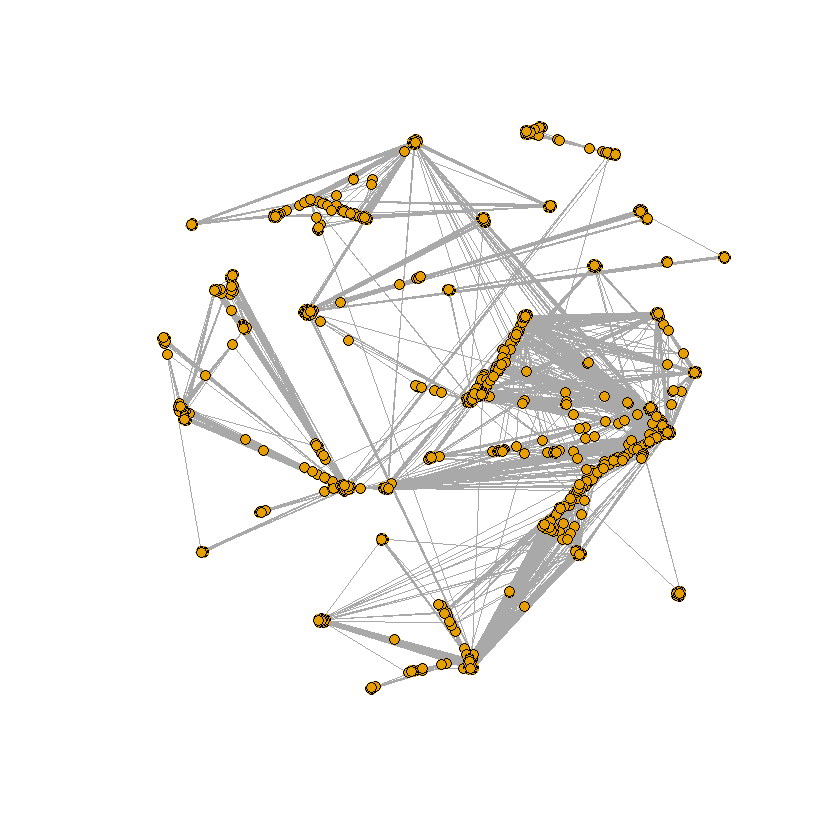

In [7]:
plot(fbGraph, vertex.label=NA, vertex.size = 4)

In [8]:
V(fbGraph)$vid <- seq(1, vcount(fbGraph),1)

In [9]:
distMatrix = shortest.paths(fbGraph, mode = 'all') 

In [10]:
#1
is.connected(fbGraph)

[1] TRUE

In [11]:
#2
diameter(fbGraph)

[1] 8

In [12]:
ecount(fbGraph)
vcount(fbGraph)

[1] 88234

[1] 4039

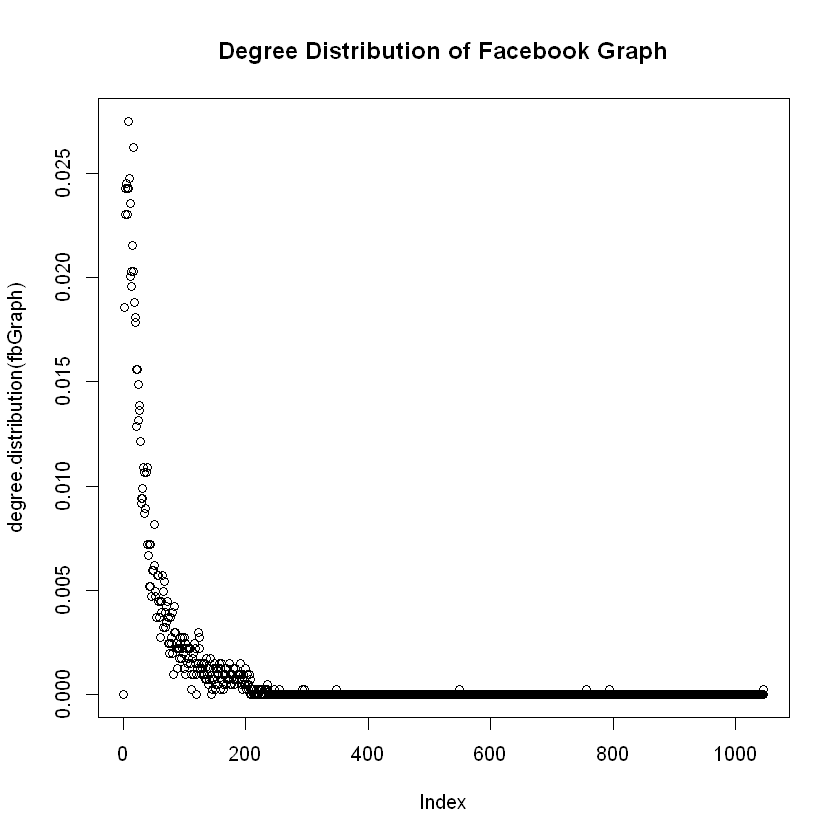

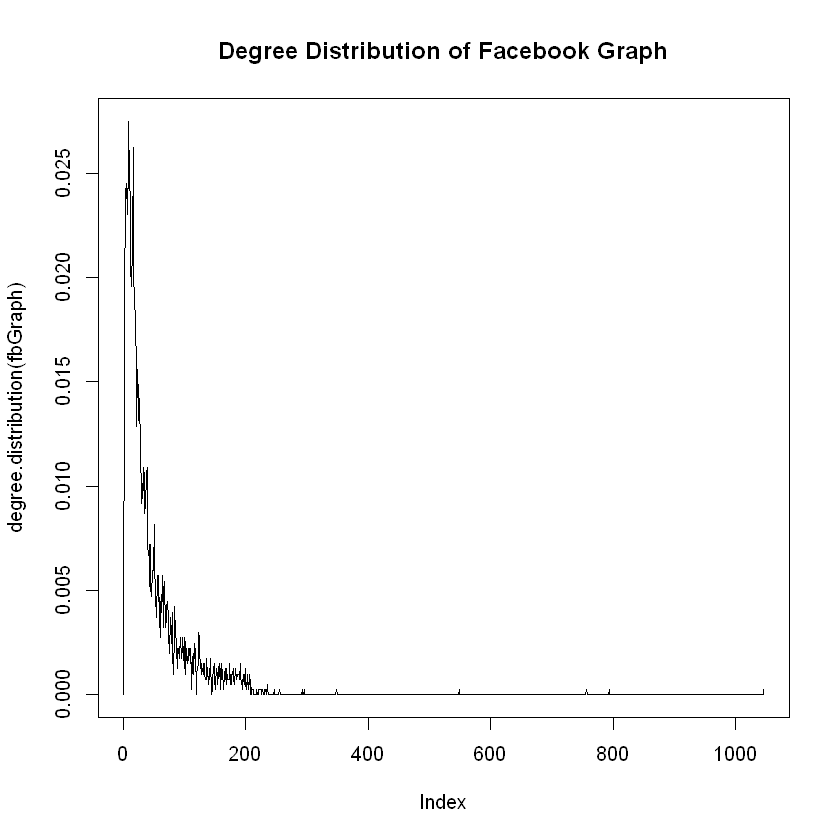

[1] 43.69101

[1] 1


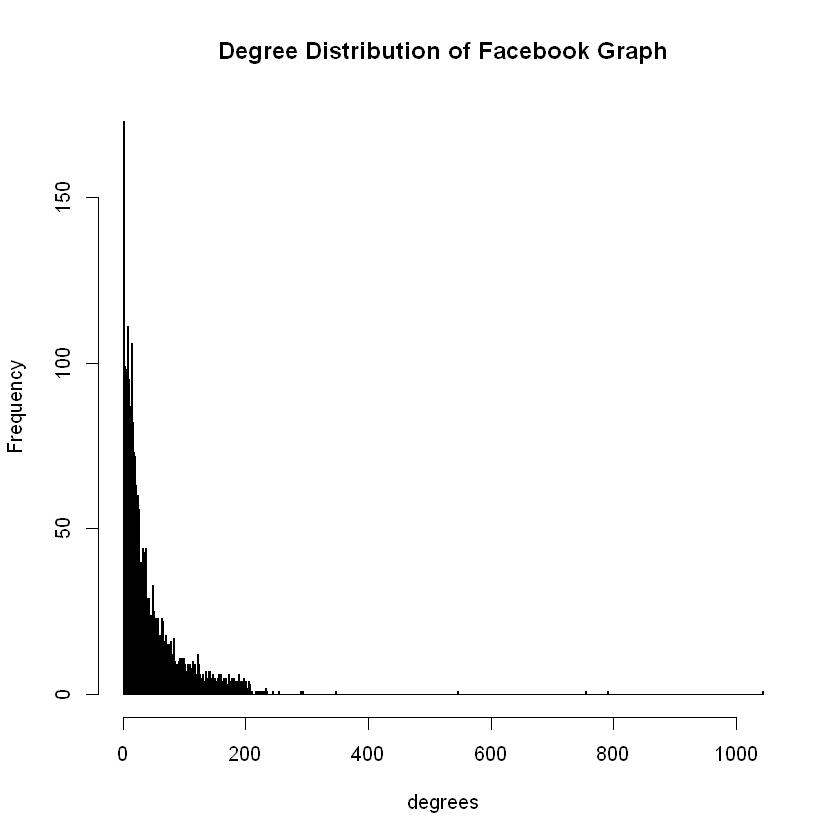

In [13]:
#3
plot(degree.distribution(fbGraph), main="Degree Distribution of Facebook Graph")
plot(degree.distribution(fbGraph), main="Degree Distribution of Facebook Graph", type = 'l')
degrees = degree(fbGraph)
hist(degrees, breaks = max(degrees) - min(degrees), main = "Degree Distribution of Facebook Graph")
avgDegree = mean(degree(fbGraph))
avgDegree
print(min(degrees))

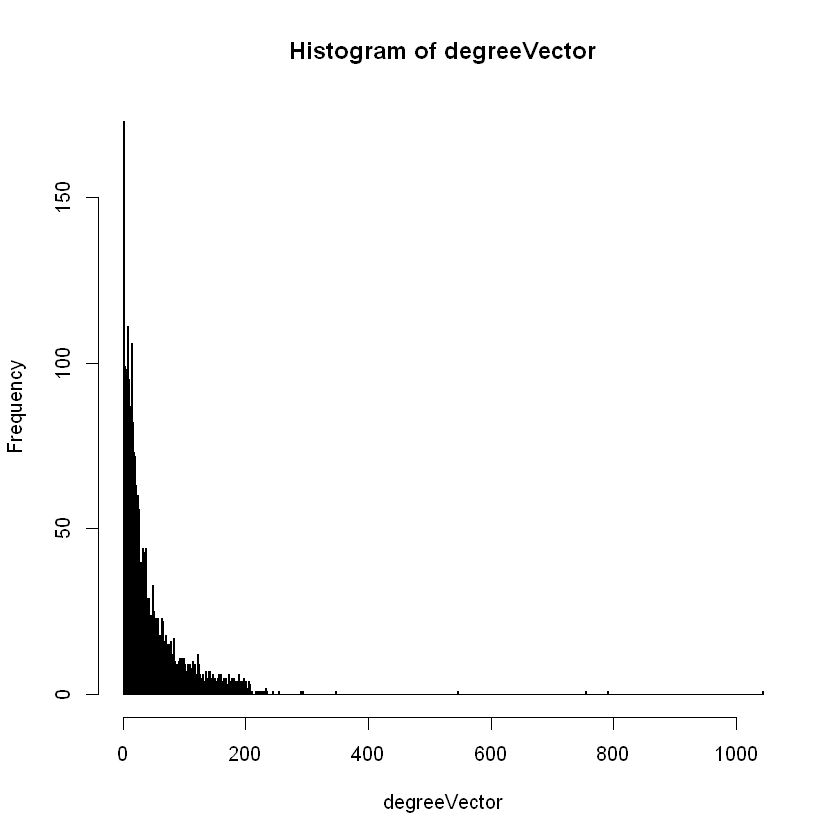


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      3.188       -1.189  



[1] 2.510175

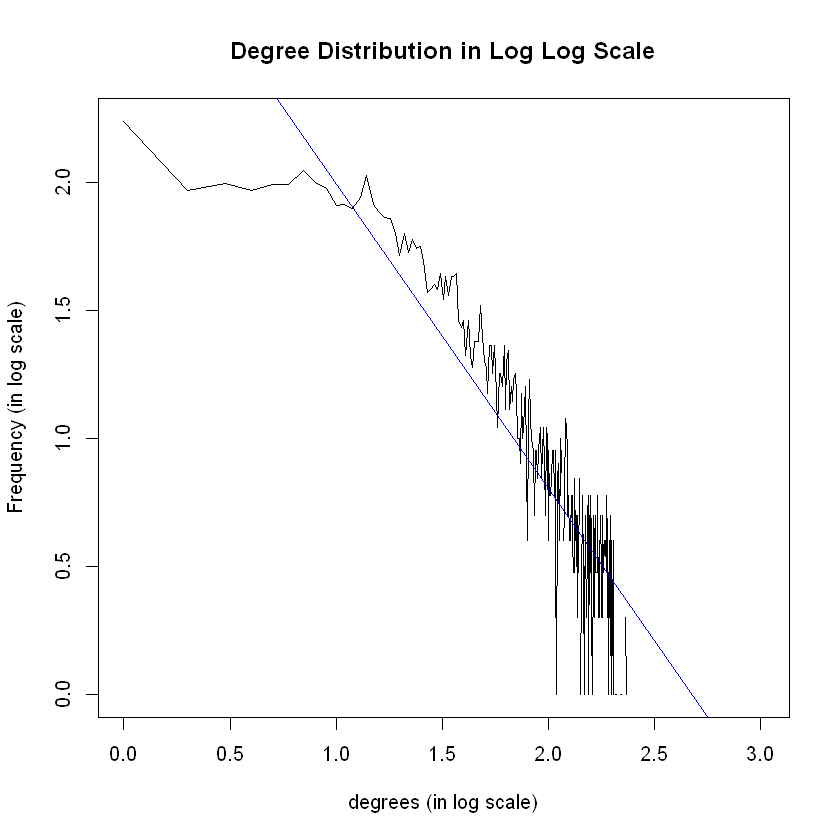

In [14]:
#3
degreeVector = degree(fbGraph)
res <- hist(degreeVector,breaks = max(degreeVector) - min(degreeVector))
    
x <- seq(from = 1, to = length(res$counts))

logX <- log10(x)
logY <- log10(res$counts)

indices = which(!is.finite(logY))
logY[indices]= NA

plot(logX, logY, type='l', xlab="degrees (in log scale)", ylab="Frequency (in log scale)", main = "Degree Distribution in Log Log Scale")
abline(lm(logY ~ logX, na.action=na.exclude), col='blue')

print(lm(logY ~ logX, na.action=na.exclude))

gamma = fit_power_law(degreeVector)
gamma$alpha

In [10]:
fbAdList = as_adj_list(fbGraph)

In [16]:
#5
vertices_1 = fbAdList[[1]]
vertices_1 = as.list(vertices_1)
vertices_1 = c(vertices_1, 1)
length(vertices_1)
typeof(vertices_1)
#vertices_1
personalized_1 = induced.subgraph(fbGraph, vertices_1)

[1] 348

[1] "list"

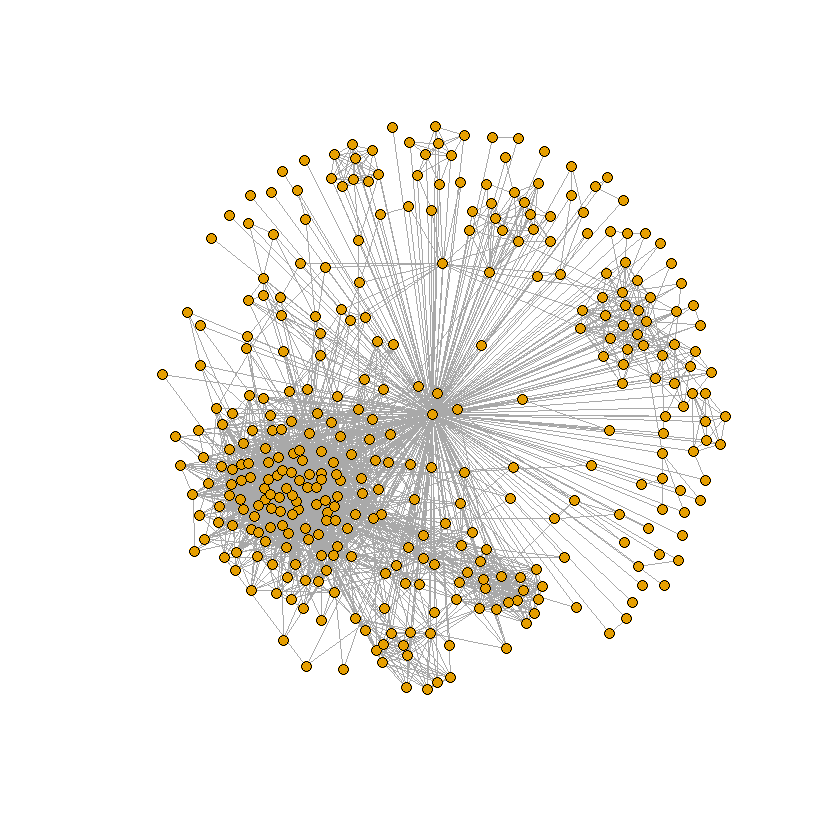

In [17]:
plot(personalized_1, vertex.label=NA, vertex.size=4)

In [18]:
ecount(personalized_1)
vcount(personalized_1)

[1] 2866

[1] 348

In [19]:
#6
diameter(personalized_1)

[1] 2

In [20]:
#7
#theoretical

In [11]:
#8
coreNodes = c()
degreeOfCoreNodes = c()
for(node in 1:vcount(fbGraph)){
    if(length(fbAdList[[node]]) > 200){
        coreNodes = c(coreNodes, node)
        degreeOfCoreNodes = c(degreeOfCoreNodes, length(fbAdList[[node]]))
    }
}

In [12]:
coreNodes

[1]    1  108  349  484 1087 1200 1353 1432 1585 1590 1664 1685 1731 1747 1769
[16] 1801 1828 1889 1913 1942 1986 1994 2048 2079 2124 2143 2207 2219 2230 2234
[31] 2241 2267 2348 2411 2465 2508 2544 2561 2612 3438

In [13]:
length(coreNodes)

[1] 40

In [24]:
degreeOfCoreNodes

[1]  347 1045  229  231  205  217  234  220  211  205  235  792  226  202  209
[16]  245  201  254  755  223  224  203  205  204  203  221  210  205  207  222
[31]  201  234  291  207  202  201  294  201  207  547

In [25]:
mean(degreeOfCoreNodes)

[1] 279.375

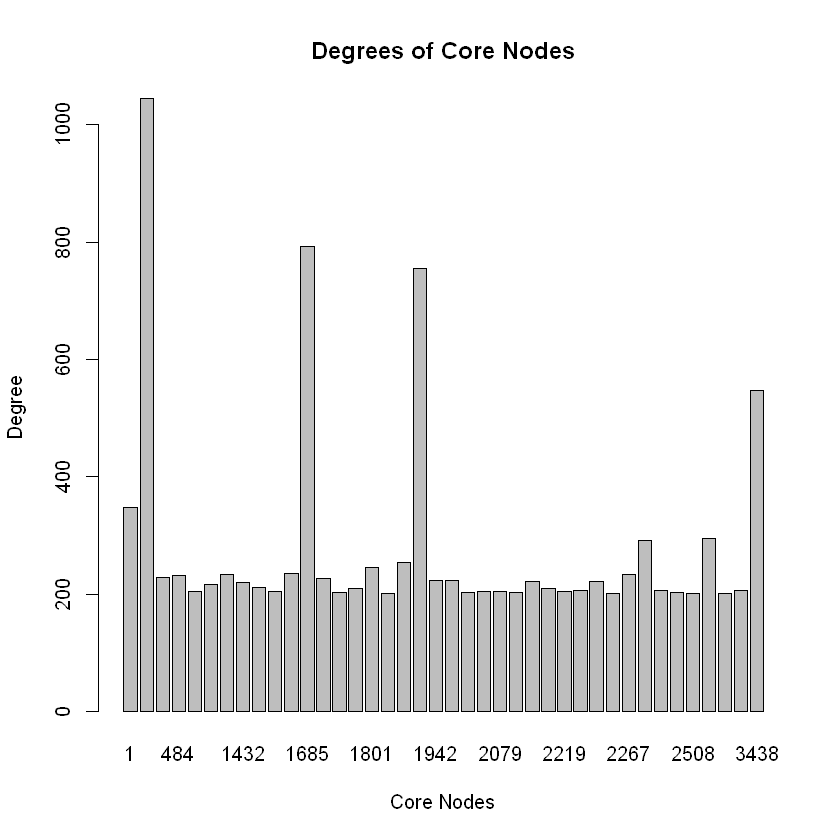

In [26]:
barplot(degreeOfCoreNodes, main="Degrees of Core Nodes", names.arg=coreNodes, xlab = "Core Nodes", ylab = "Degree")

In [27]:
communityGraphs = function(personalizedGraph, communityType, coreNode){
    
    startTime = Sys.time()
    if(communityType == "FastGreedy"){
        commGraph = fastgreedy.community(personalizedGraph)
    }
    if(communityType == "EdgeBetweenness"){
        commGraph = edge.betweenness.community(personalizedGraph)
    }
    if(communityType == "Infomap"){
        commGraph = infomap.community(personalizedGraph)
    }
    
    endTime = Sys.time()
    
    print(paste(communityType,"for Core Node: ", coreNode))
    print(paste("Elapsed Time:", (endTime - startTime)))
    print(sizes(commGraph))
    print("Modularity:")
    print(modularity(commGraph))
    
    colors = rainbow(max(membership(commGraph))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalizedGraph)$color = nodes_colors[membership(commGraph)] 
    V(personalizedGraph)$size= 5
    
    coreNodeIndex = -1
    for(i in 1:vcount(personalizedGraph)){
        if(V(personalizedGraph)[i]$vid == coreNode){
            coreNodeIndex = i
            break
        }
    }
    
    if(coreNodeIndex != -1){
        print(paste("Core Node Index", coreNodeIndex))
        V(personalizedGraph)[coreNodeIndex]$color = colors[length(colors)] 
        V(personalizedGraph)[coreNodeIndex]$size = 15
    }
    
    
    plot(personalizedGraph, main=paste(communityType, coreNode), vertex.label=NA)
}

[1] "Number of Vertices: 348"
[1] "Number of Edges: 2866"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 348"
[1] "Diameter: 2"
[1] "Average of degrees: 16.4712643678161"
[1] "Variance of degrees: 555.535194938554"
[1] "FastGreedy for Core Node:  1"
[1] "Elapsed Time: 0.054732084274292"
Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 
[1] "Modularity:"
[1] 0.4131014
[1] "Core Node Index 1"
[1] "EdgeBetweenness for Core Node:  1"
[1] "Elapsed Time: 12.275447845459"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
155  28  34  10   8   9   1   1   1   1   5   6   2   5  16  13   1   1   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   9   7   1   2   3   1   2   3   1   1   1   1   1   2   2   2   1   1   1 
 41 
  1 
[1] "Modularity:"
[1] 0.3533022
[1] "Core Node Index 1"


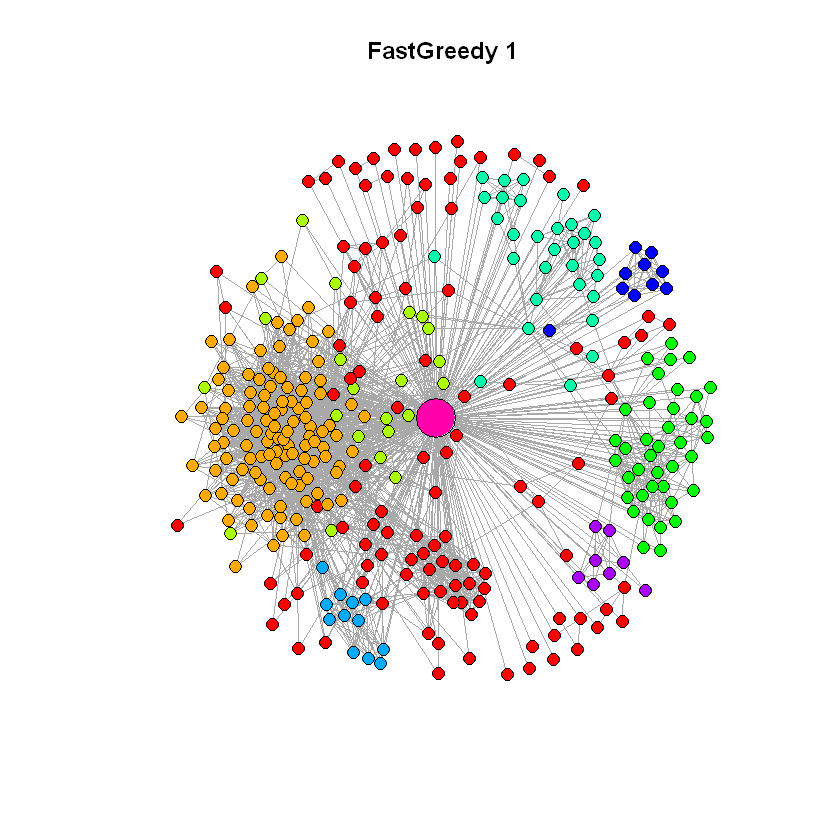

[1] "Infomap for Core Node:  1"
[1] "Elapsed Time: 0.175649166107178"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
142  32  21  21  16  13  10  10  11  10   9   8   7   5   6   5   3   3   2   2 
 21  22  23  24  25  26 
  2   2   2   2   2   2 
[1] "Modularity:"
[1] 0.3891185
[1] "Core Node Index 1"


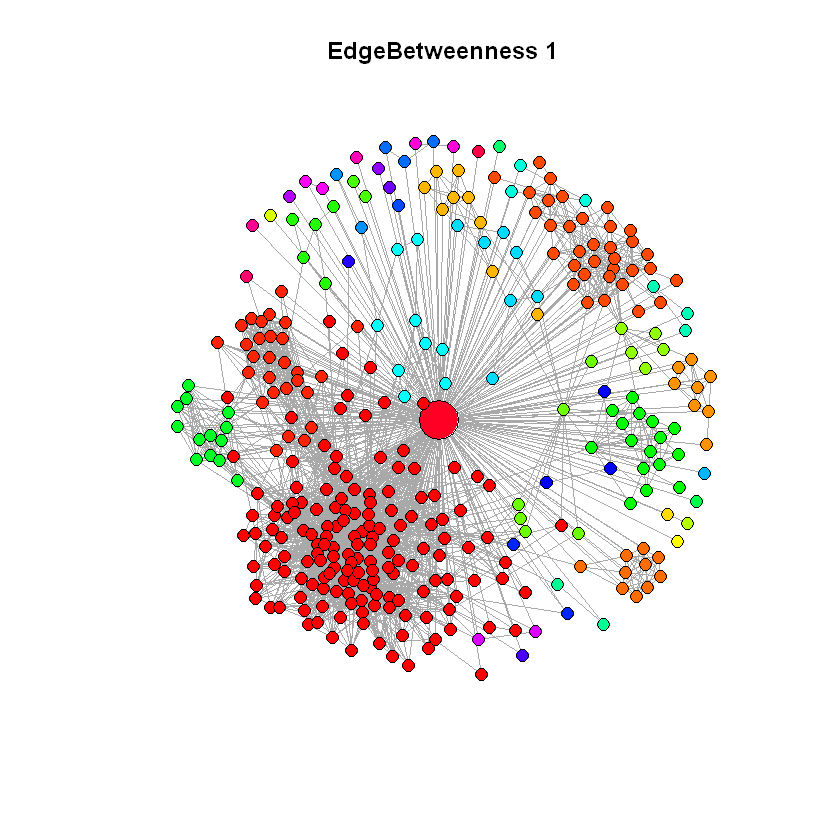

[1] "Number of Vertices: 1046"
[1] "Number of Edges: 27795"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 1046"
[1] "Diameter: 2"
[1] "Average of degrees: 53.1453154875717"
[1] "Variance of degrees: 3156.15111200564"
[1] "FastGreedy for Core Node:  108"
[1] "Elapsed Time: 0.140186071395874"
Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 
[1] "Modularity:"
[1] 0.4359294
[1] "Core Node Index 3"


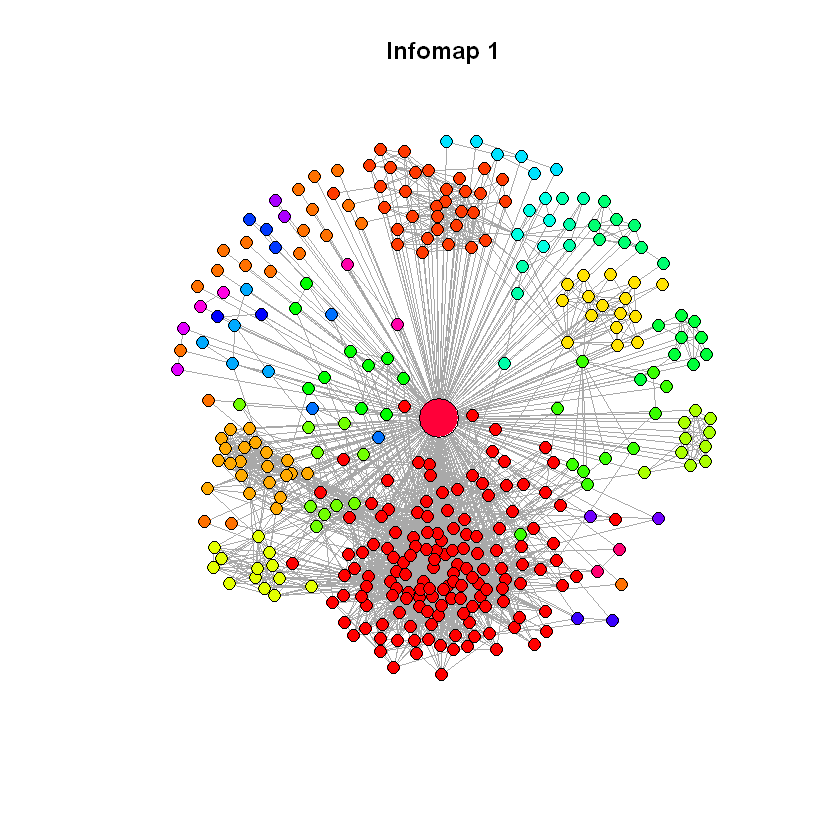

[1] "EdgeBetweenness for Core Node:  108"
[1] "Elapsed Time: 54.2141760508219"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  7 173 127 139 366   3  71  38   2  12   7   1   1  13   6  23   6   1   3   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   1   1   1   1   2   6   1   1   1   1   2   2   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52 
  1   2   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5067549
[1] "Core Node Index 3"


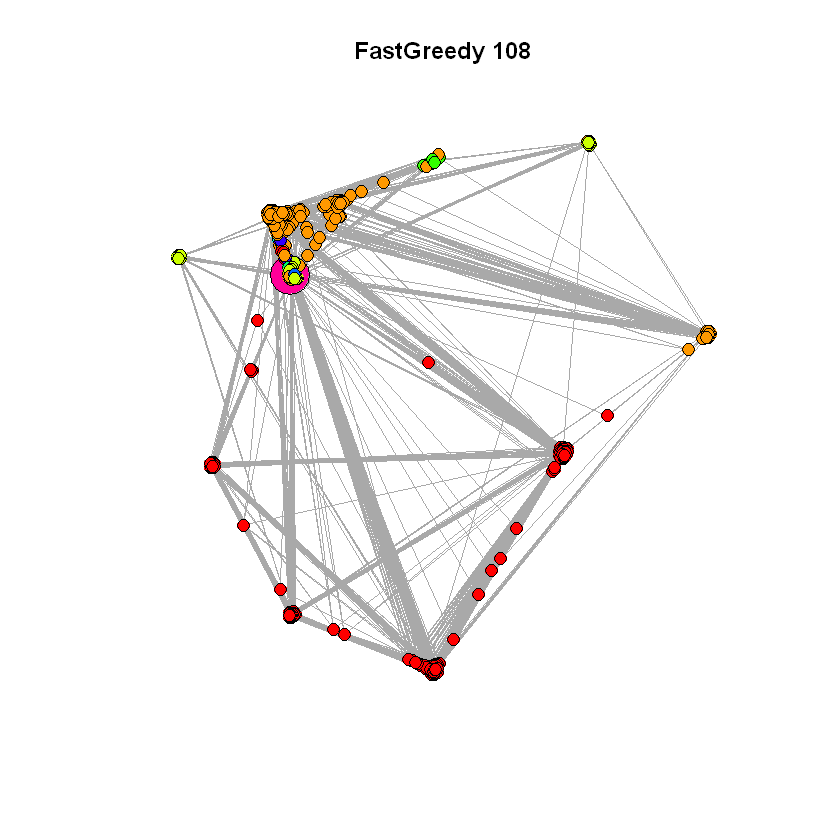

[1] "Infomap for Core Node:  108"
[1] "Elapsed Time: 0.680245161056519"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
323 127  93 102  71  72  48  38  28  29  18  16  12  11  10   6   6   5   6   6 
 21  22  23  24  25  26  27 
  3   3   3   3   3   2   2 
[1] "Modularity:"
[1] 0.5082233
[1] "Core Node Index 3"


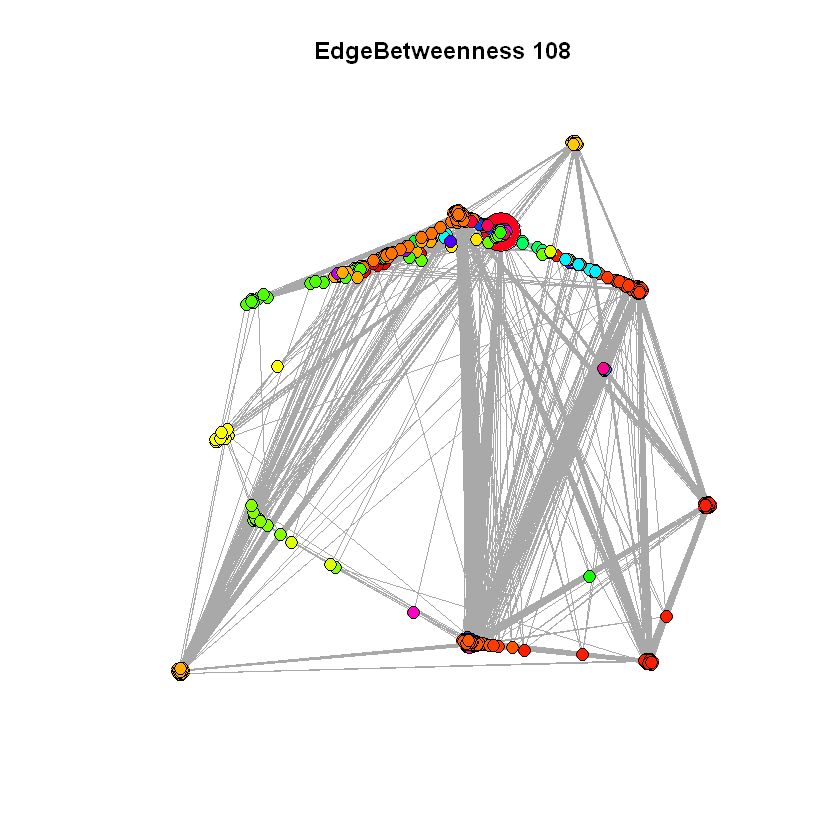

[1] "Number of Vertices: 230"
[1] "Number of Edges: 3441"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 230"
[1] "Diameter: 2"
[1] "Average of degrees: 29.9217391304348"
[1] "Variance of degrees: 681.827909625973"
[1] "FastGreedy for Core Node:  349"
[1] "Elapsed Time: 0"
Community sizes
  1   2   3   4   5 
107  11  98   4  10 
[1] "Modularity:"
[1] 0.2517149
[1] "Core Node Index 5"


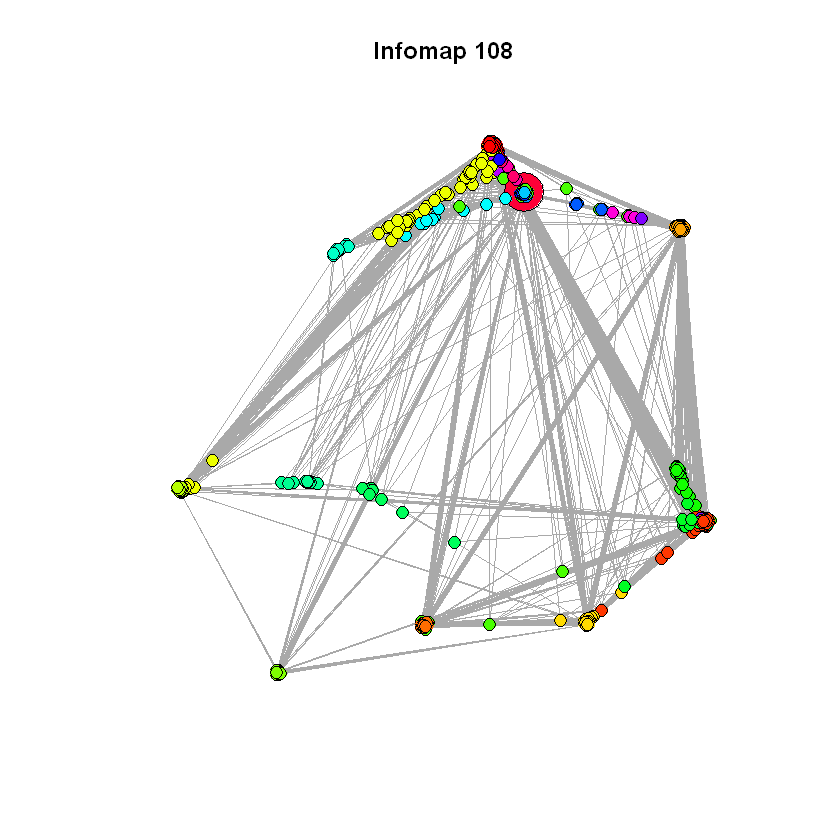

[1] "EdgeBetweenness for Core Node:  349"
[1] "Elapsed Time: 14.5799379348755"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10  86   1   1   1   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 104 
  1   1   1   1 
[1] "Modularity:"
[1] 0.133528
[1] "Core Node Index 5"


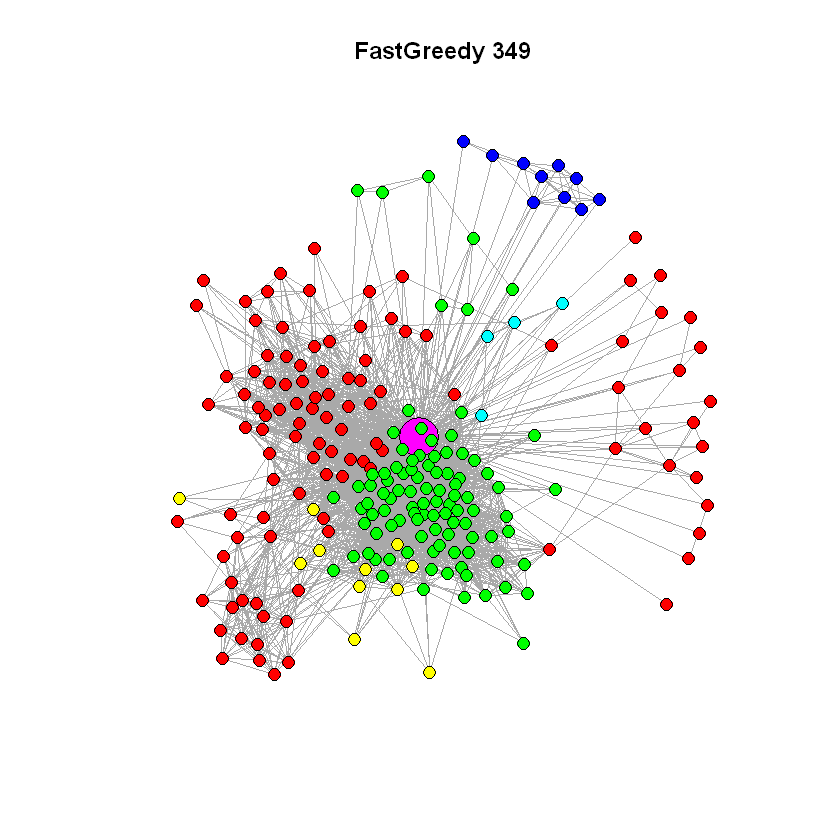

[1] "Infomap for Core Node:  349"
[1] "Elapsed Time: 0.0658900737762451"
Community sizes
  1   2   3   4   5   6   7   8   9 
176  19  10   8   7   3   3   2   2 
[1] "Modularity:"
[1] 0.0954642
[1] "Core Node Index 5"


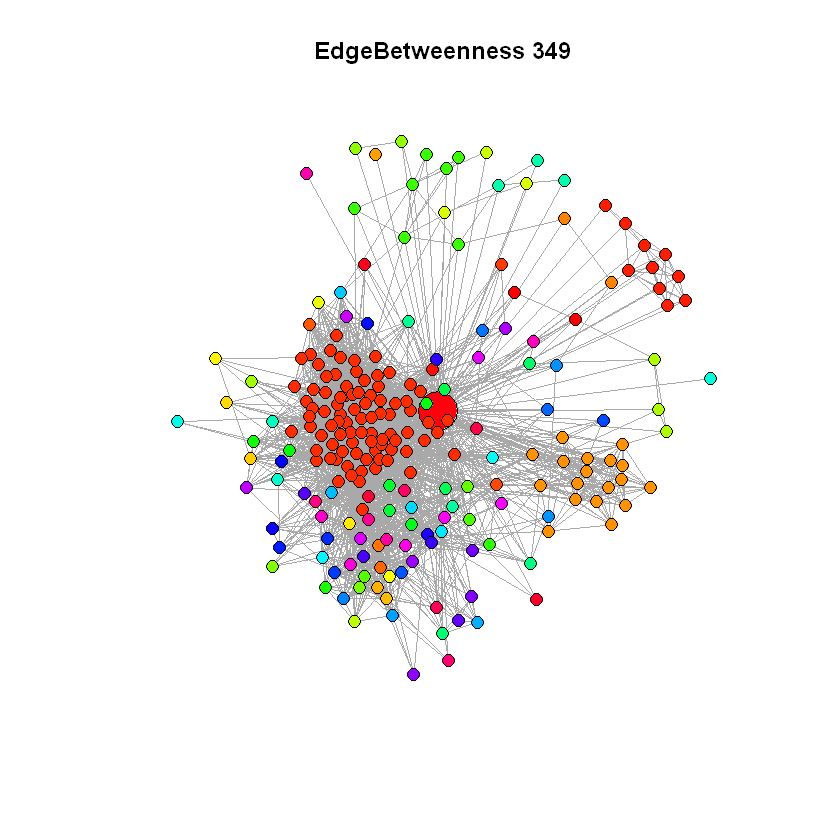

[1] "Number of Vertices: 232"
[1] "Number of Edges: 4525"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 232"
[1] "Diameter: 2"
[1] "Average of degrees: 39.0086206896552"
[1] "Variance of degrees: 532.302955665025"
[1] "FastGreedy for Core Node:  484"
[1] "Elapsed Time: 0.00501394271850586"
Community sizes
 1  2  3 
71 72 89 
[1] "Modularity:"
[1] 0.5070016
[1] "Core Node Index 41"


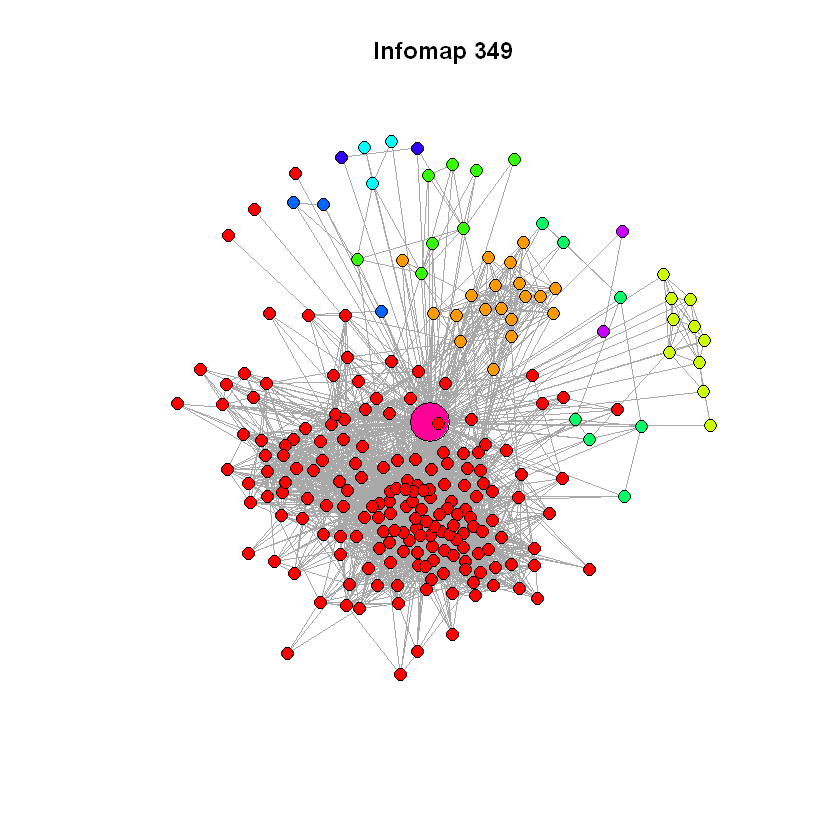

[1] "EdgeBetweenness for Core Node:  484"
[1] "Elapsed Time: 22.2686319351196"
Community sizes
 1  2  3  4  5  6  7  8  9 10 
77 79  1  1  1 69  1  1  1  1 
[1] "Modularity:"
[1] 0.4890952
[1] "Core Node Index 41"


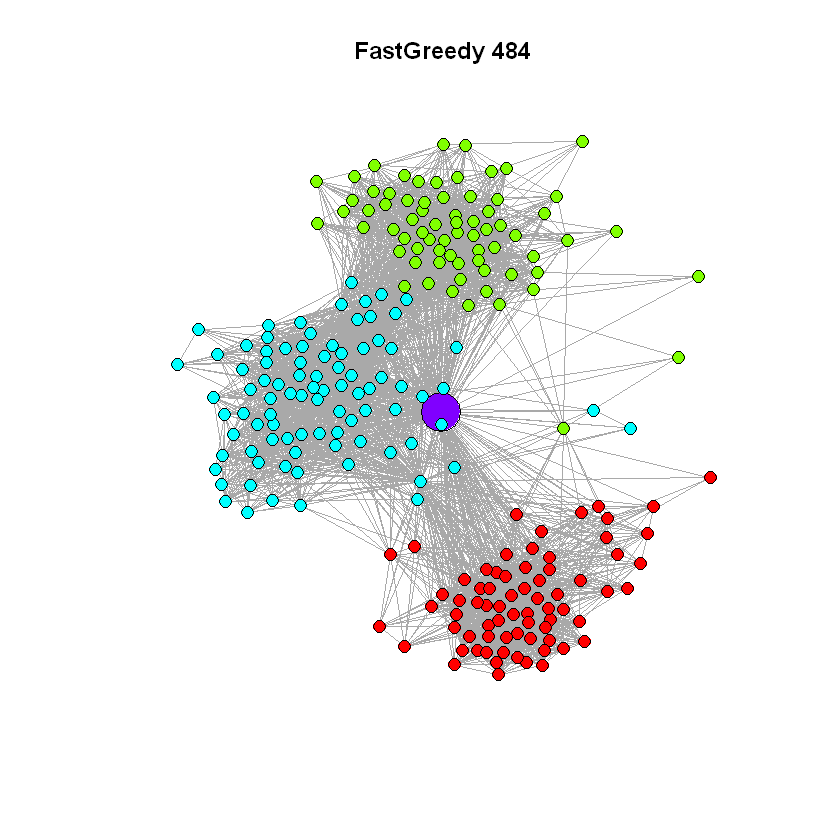

[1] "Infomap for Core Node:  484"
[1] "Elapsed Time: 0.0625078678131104"
Community sizes
 1  2  3  4 
85 73 70  4 
[1] "Modularity:"
[1] 0.5152788
[1] "Core Node Index 41"


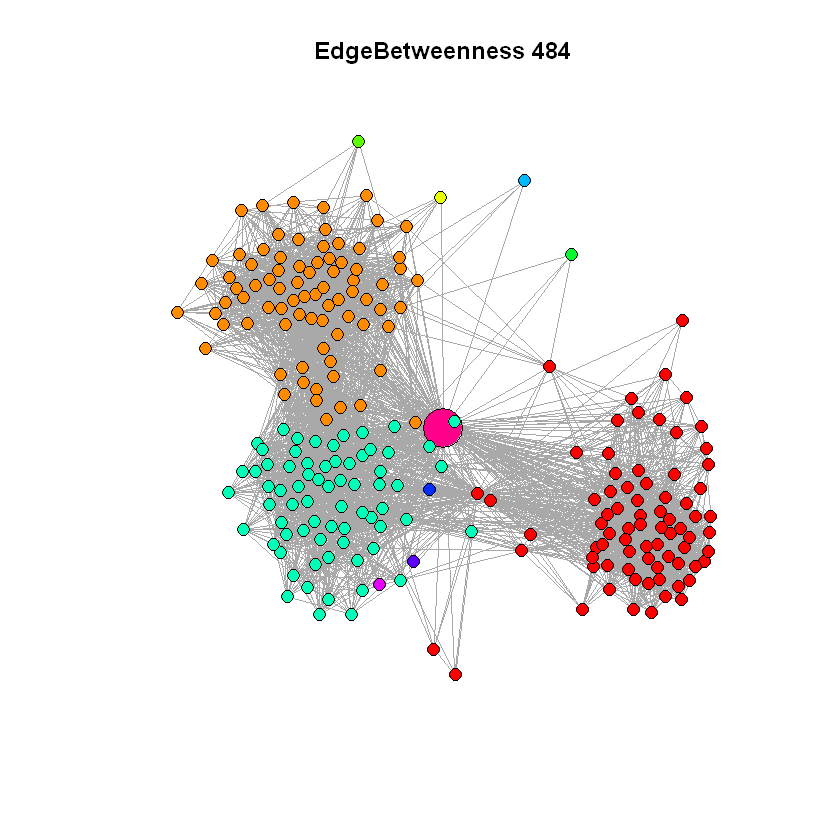

[1] "Number of Vertices: 206"
[1] "Number of Edges: 7409"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 206"
[1] "Diameter: 2"
[1] "Average of degrees: 71.9320388349515"
[1] "Variance of degrees: 1628.05389533507"
[1] "FastGreedy for Core Node:  1087"
[1] "Elapsed Time: 0"
Community sizes
  1   2 
 81 125 
[1] "Modularity:"
[1] 0.1455315
[1] "Core Node Index 38"


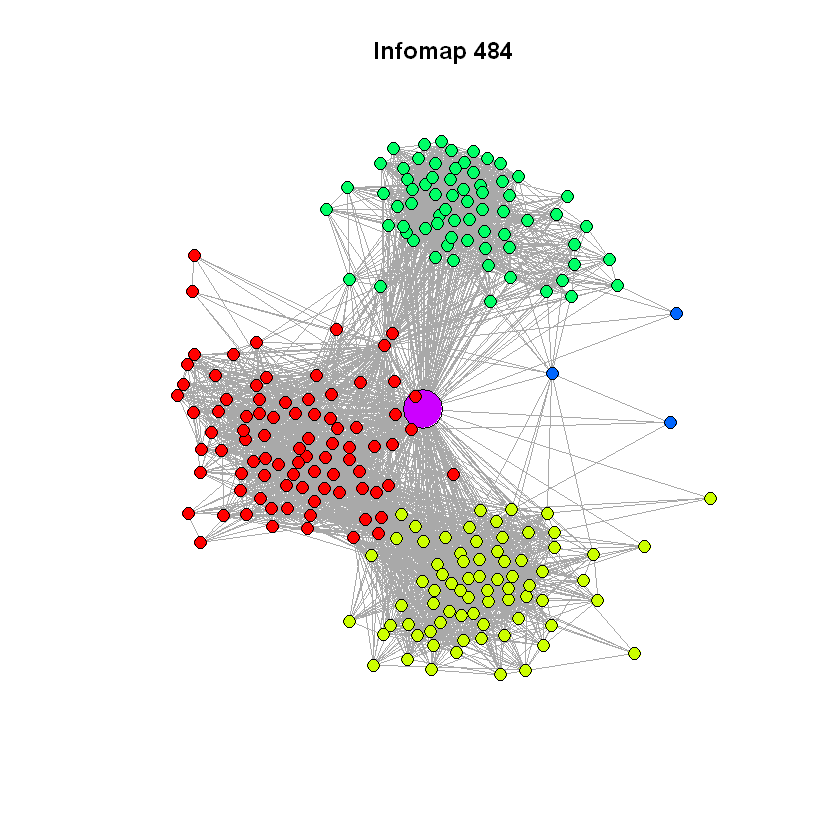

[1] "EdgeBetweenness for Core Node:  1087"
[1] "Elapsed Time: 1.26418151458104"
Community sizes
  1   2   3   4   5   6   7   8   9 
173  18   8   1   1   2   1   1   1 
[1] "Modularity:"
[1] 0.02762377
[1] "Core Node Index 38"


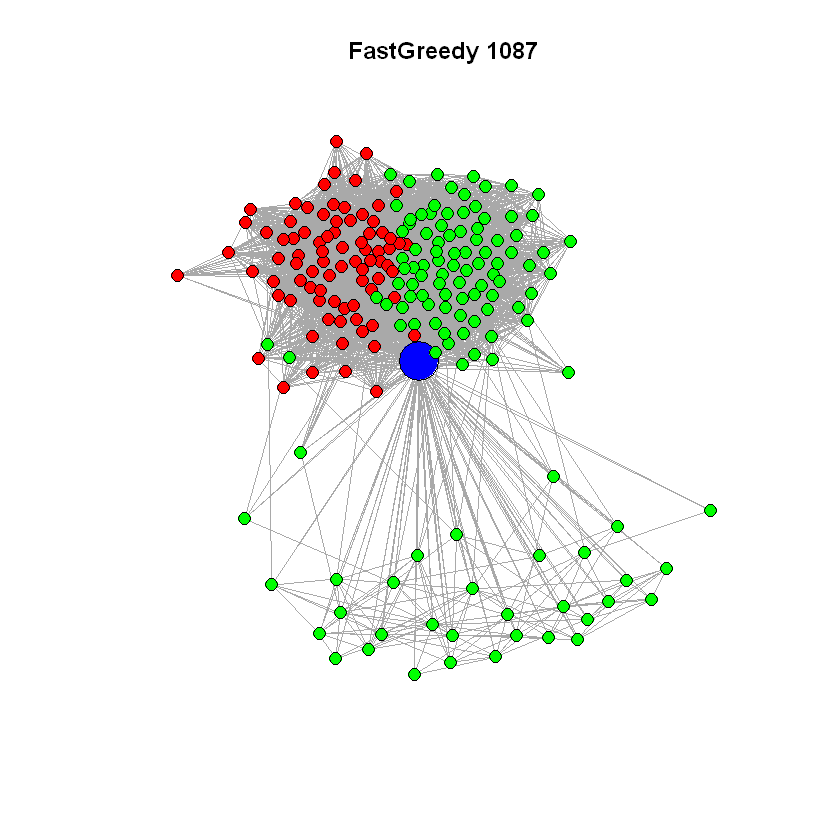

[1] "Infomap for Core Node:  1087"
[1] "Elapsed Time: 0.084658145904541"
Community sizes
  1   2   3   4 
175  13  11   7 
[1] "Modularity:"
[1] 0.02690662
[1] "Core Node Index 38"


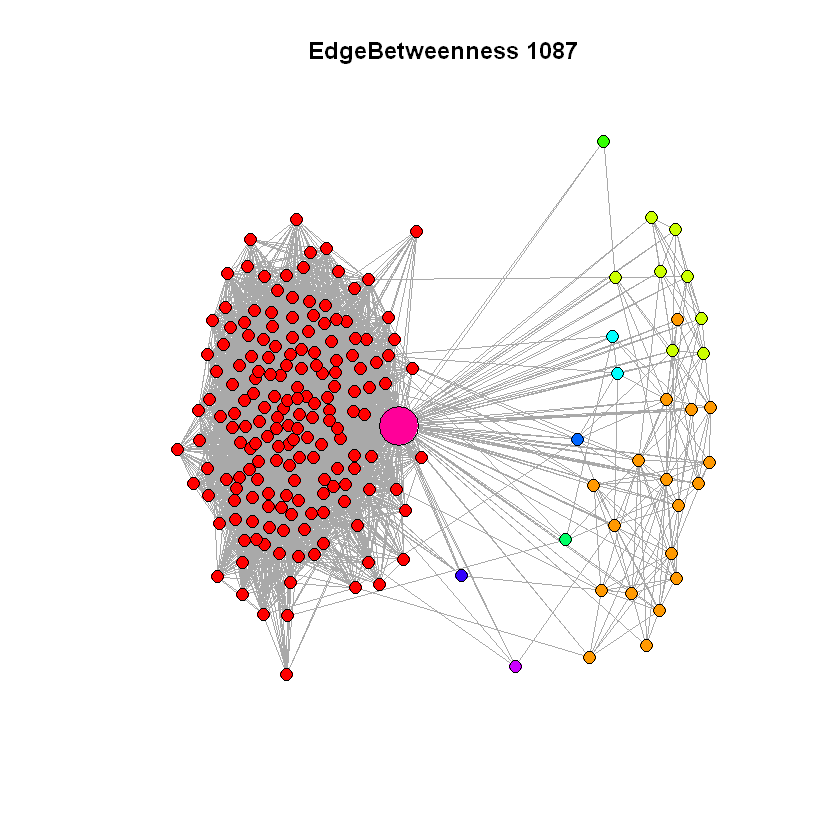

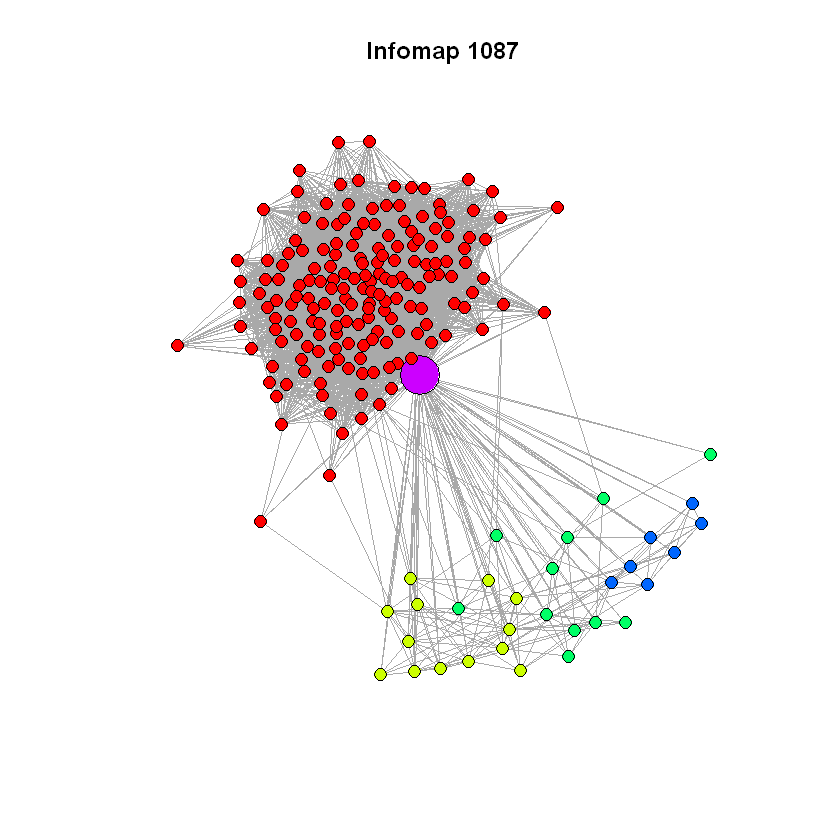

In [31]:
#9
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1087)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    vertices = c(coreNode, vertices)
    #print(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    getGraphInfo(personalizedGraph)
    layout = layout.fruchterman.reingold(personalizedGraph)
    #print(V(personalizedGraph)$vid)
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

In [2]:
getGraphInfo = function(graph){
    print(paste("Number of Vertices:", vcount(graph)))
    print(paste("Number of Edges:", ecount(graph)))
    print(paste("Is the Graph Connected:", is.connected(graph)))
    if(is.connected(graph)){
        print(paste("GCC Size:", vcount(graph)))
    }
    else{
        graph.components <- clusters(graph) 
        ix <- which.max(graph.components$csize)
        graph.giant <- induced.subgraph(graph, which(graph.components$membership == ix))
        gcc <- vcount(graph.giant)
        print(paste("GCC Size:", gcc))
    }
    
    print(paste("Diameter:", diameter(graph)))
    degrees = degree(graph)
    print(paste("Average of degrees:", mean(degrees)))
    print(paste("Variance of degrees:", var(degrees)))
    
}

[1] "FastGreedy for Core Node:  1"
[1] "Elapsed Time: 0.016254186630249"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 52  39 121  18  52  24  10   8   3   2   2   2   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26 
  1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4418533
[1] "EdgeBetweenness for Core Node:  1"
[1] "Elapsed Time: 6.4185779094696"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 27  39 140  10   8   9   1   1   1   1  22   1   2   5  13   1   1   2   6   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   7   7   1   2   3   1   2   1   1   1   1   1   2   1   1   1   1   2 
 41  42  43  44  45  46  47  48  49  50 
  2   1   2   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4161461


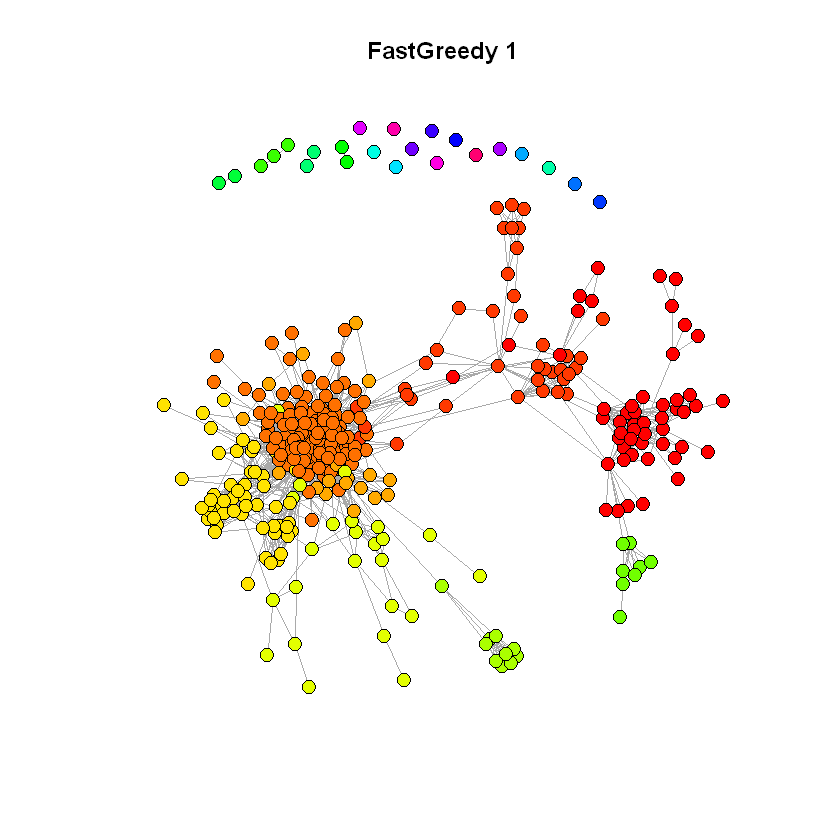

[1] "Infomap for Core Node:  1"
[1] "Elapsed Time: 0.091001033782959"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143  34  21  16  13  10   9   8  11  10   9   7   6   5   5   3   2   2   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   3   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4180077


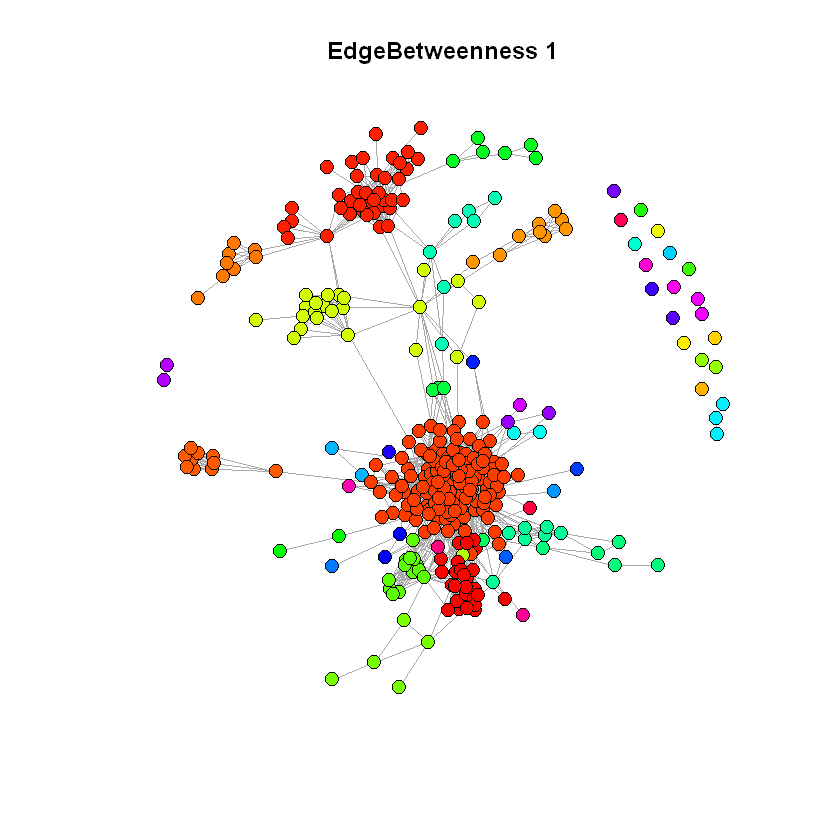

[1] "FastGreedy for Core Node:  108"
[1] "Elapsed Time: 0.0644848346710205"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
458 465  70  19   4   3   6   2   2   3   2   1   1   1   1   1   1   1   1   1 
 21  22 
  1   1 
[1] "Modularity:"
[1] 0.4581271


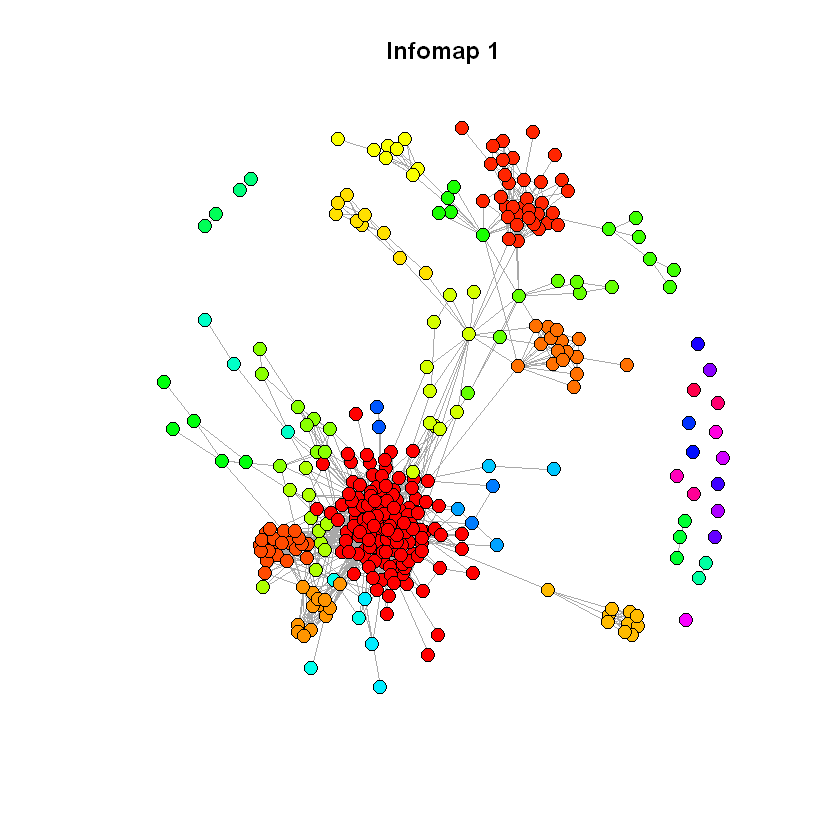

[1] "EdgeBetweenness for Core Node:  108"
[1] "Elapsed Time: 32.1848378658295"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  9 137 138 360 171   3  64  38   2  12   7   1   1  13   4   3  10   6   3  14 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   5   4   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5213216


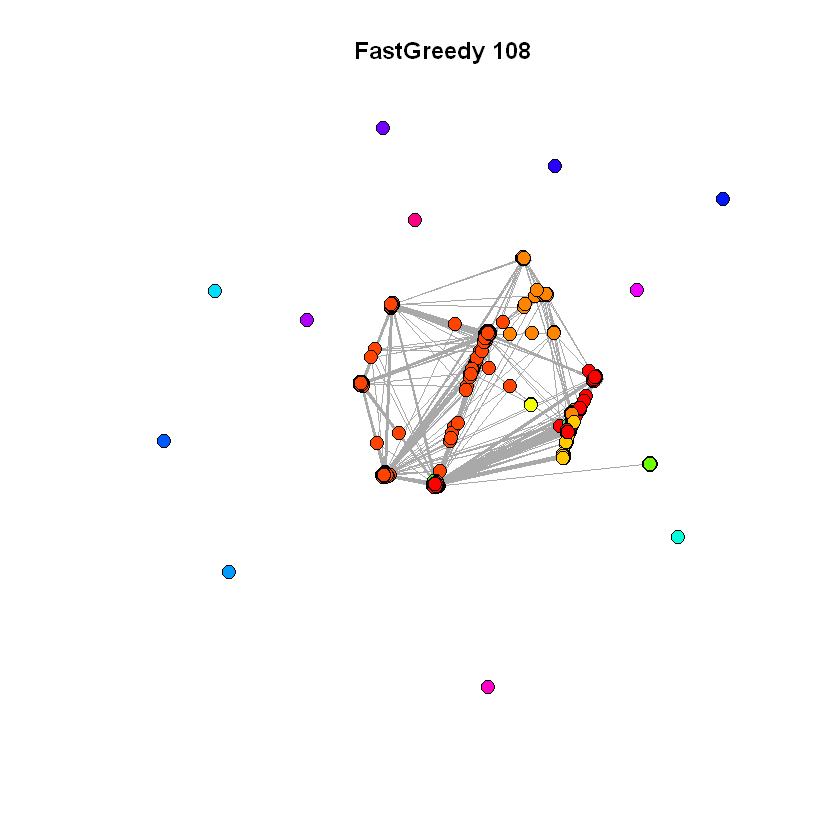

[1] "Infomap for Core Node:  108"
[1] "Elapsed Time: 0.684314012527466"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
325 128  95 103  71  70  47  38  29  18  16  12  11   9   6   6   6   5   6   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  4   6   4   3   3   3   2   2   2   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5205459


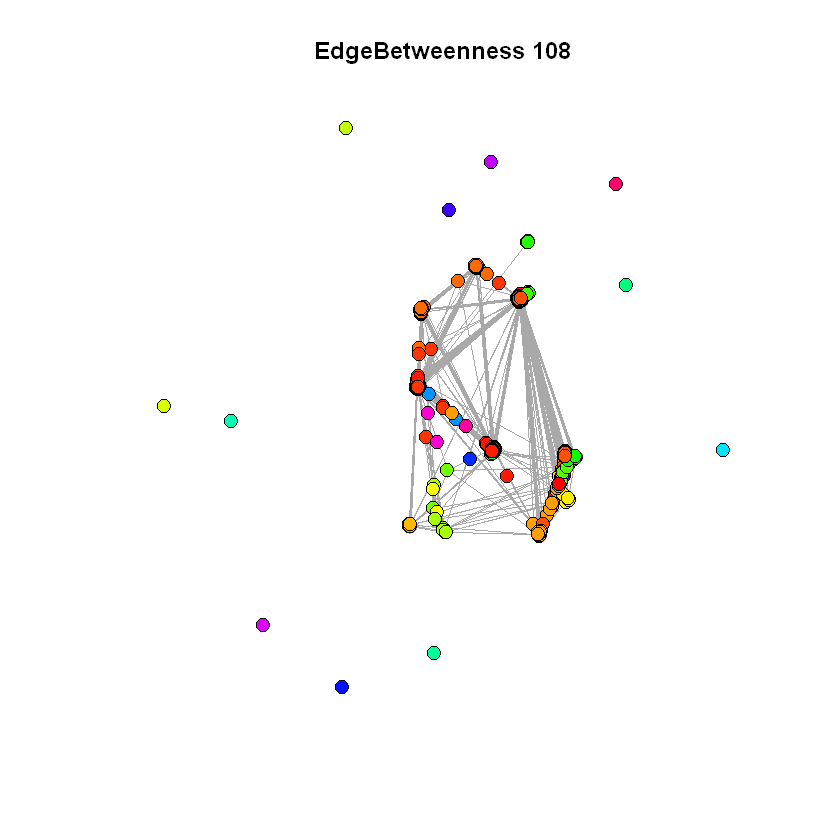

[1] "FastGreedy for Core Node:  349"
[1] "Elapsed Time: 0.00300812721252441"
Community sizes
  1   2   3   4   5   6   7   8 
 27  80 107  10   2   1   1   1 
[1] "Modularity:"
[1] 0.2456918


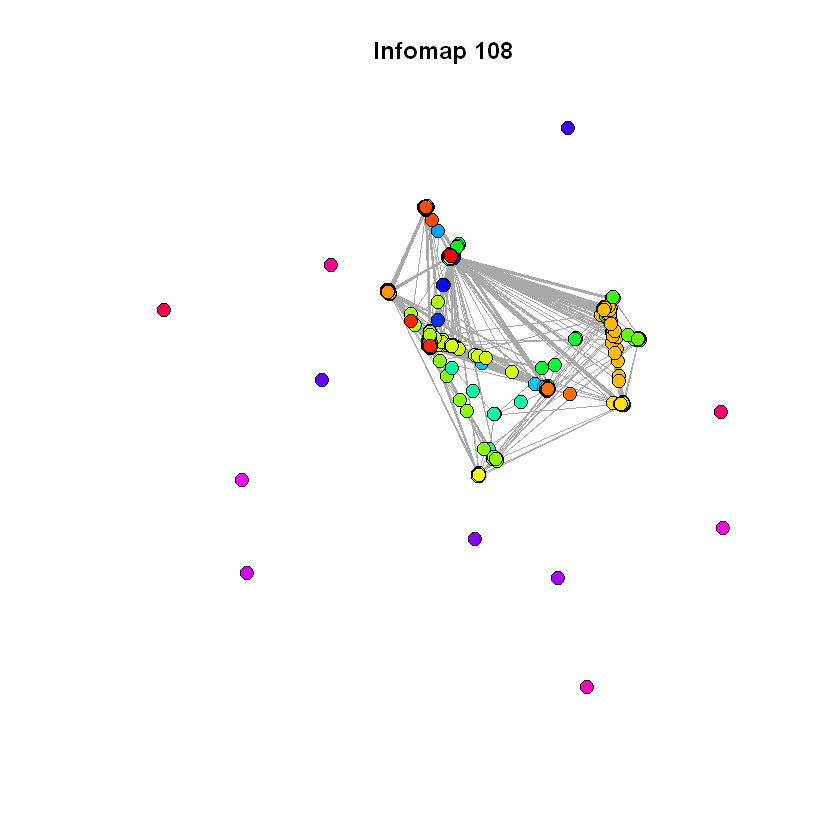

[1] "EdgeBetweenness for Core Node:  349"
[1] "Elapsed Time: 12.2838361263275"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10   2   1   1  85   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 
  1   1   1 
[1] "Modularity:"
[1] 0.1505663


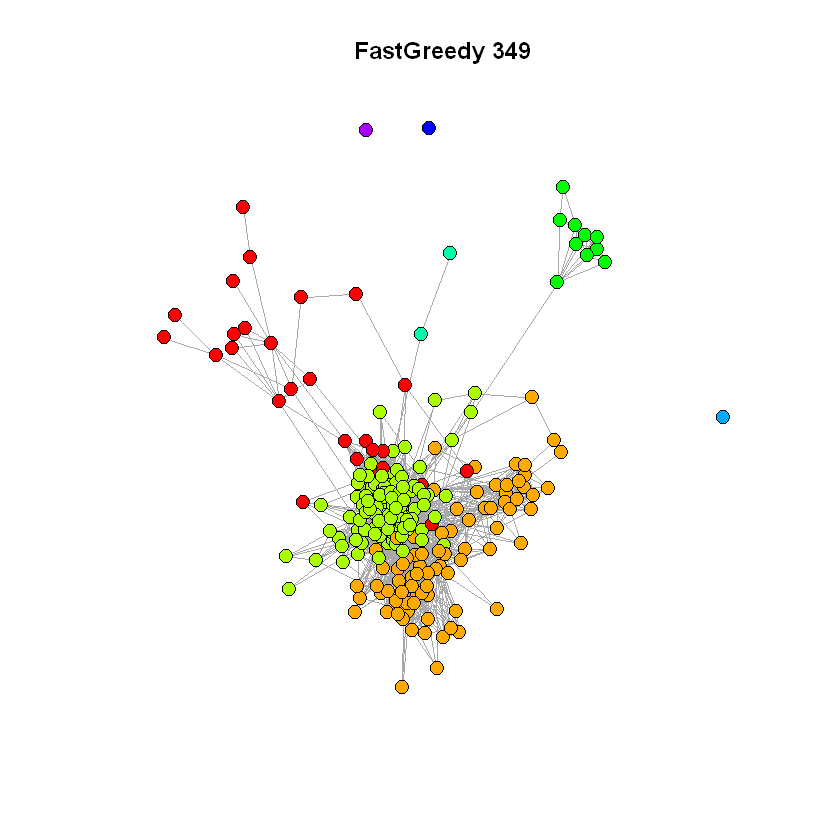

[1] "Infomap for Core Node:  349"
[1] "Elapsed Time: 0.091825008392334"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14 
118  29  20  20  10  11   7   4   3   2   2   1   1   1 
[1] "Modularity:"
[1] 0.2465785


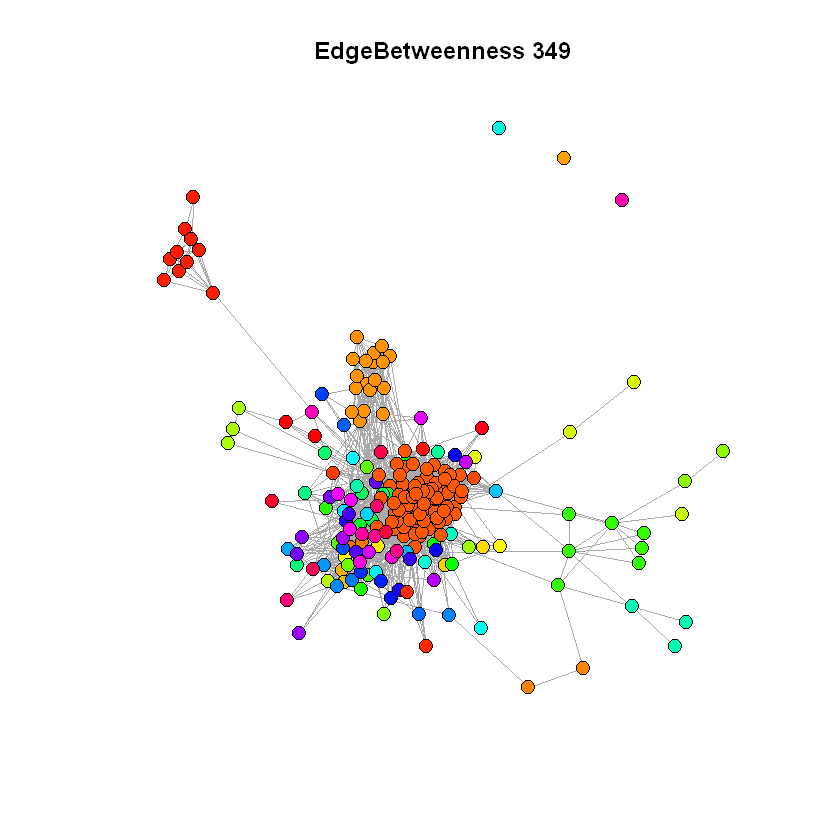

[1] "FastGreedy for Core Node:  484"
[1] "Elapsed Time: 0"
Community sizes
 1  2  3 
71 71 89 
[1] "Modularity:"
[1] 0.5342142


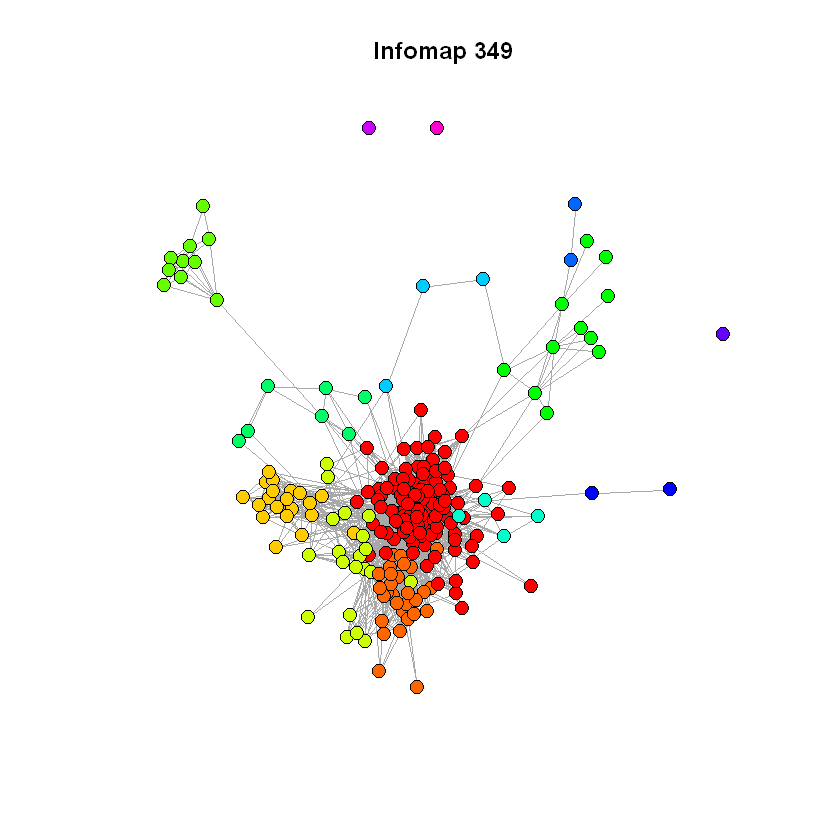

[1] "EdgeBetweenness for Core Node:  484"
[1] "Elapsed Time: 16.9196698665619"
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 
74 79  1  1  1 69  1  1  2  1  1 
[1] "Modularity:"
[1] 0.5154413


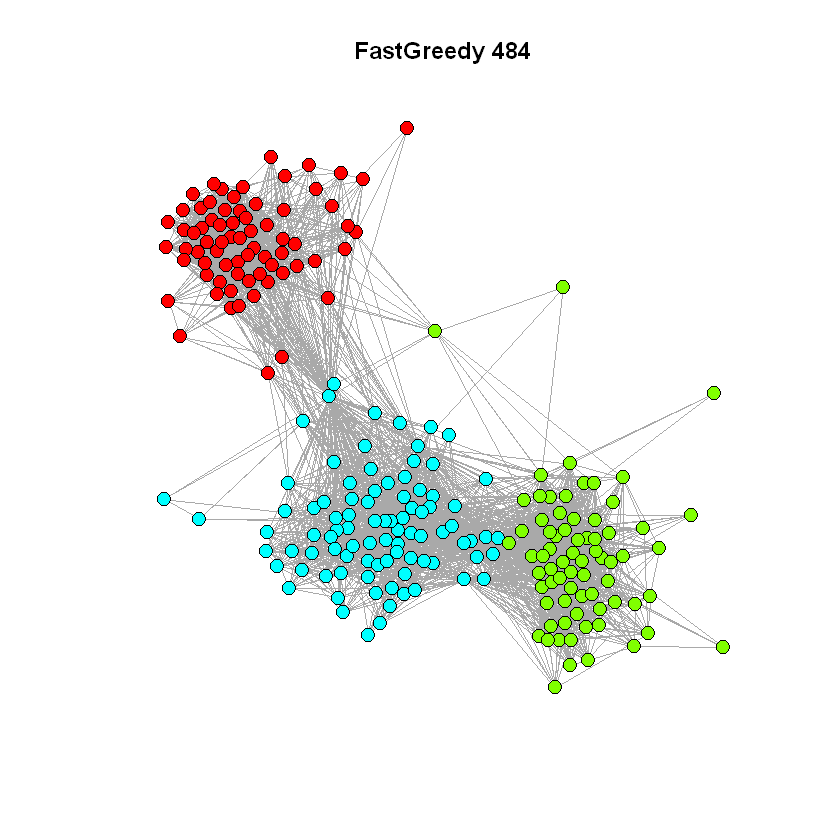

[1] "Infomap for Core Node:  484"
[1] "Elapsed Time: 0.0468800067901611"
Community sizes
 1  2  3  4 
85 73 71  2 
[1] "Modularity:"
[1] 0.5434437


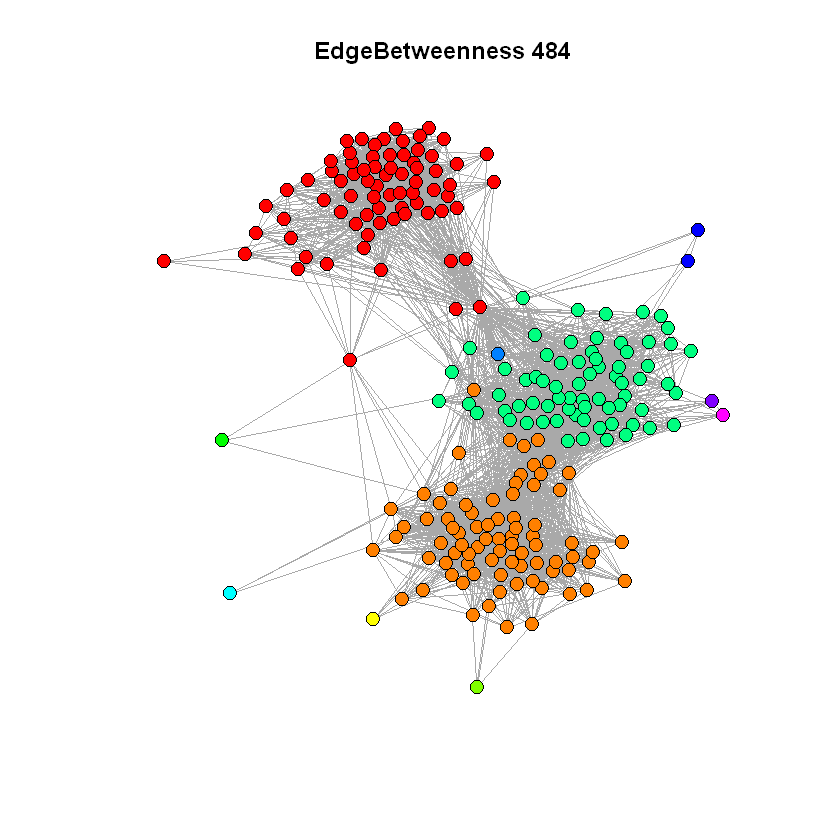

[1] "FastGreedy for Core Node:  1087"
[1] "Elapsed Time: 0.015657901763916"
Community sizes
  1   2 
 80 125 
[1] "Modularity:"
[1] 0.1481956


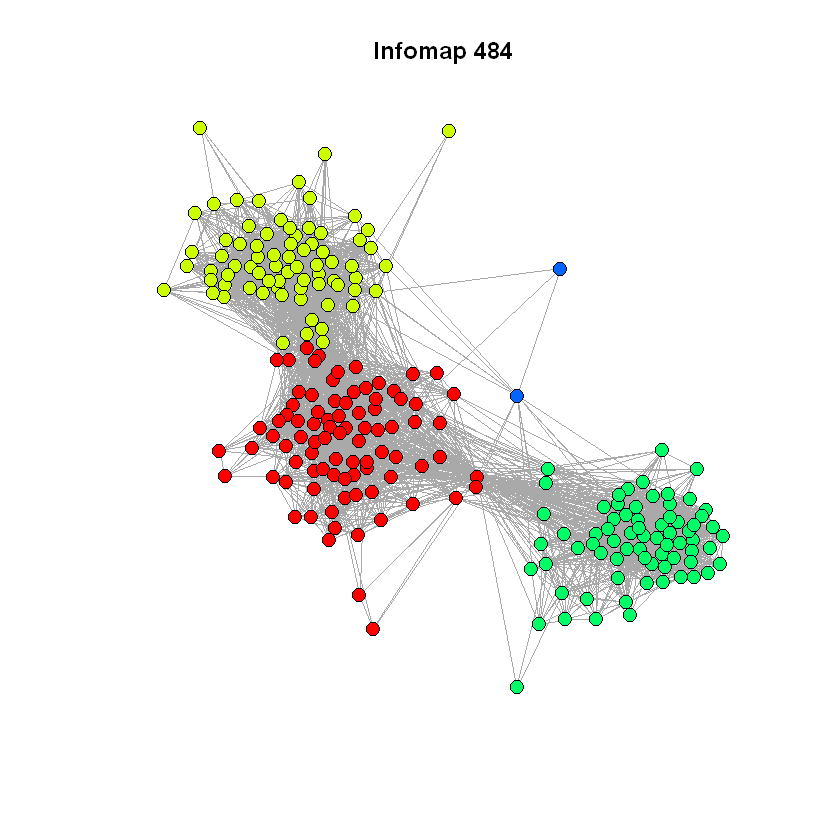

[1] "EdgeBetweenness for Core Node:  1087"
[1] "Elapsed Time: 1.16650160153707"
Community sizes
  1   2   3   4 
172  31   1   1 
[1] "Modularity:"
[1] 0.0324953


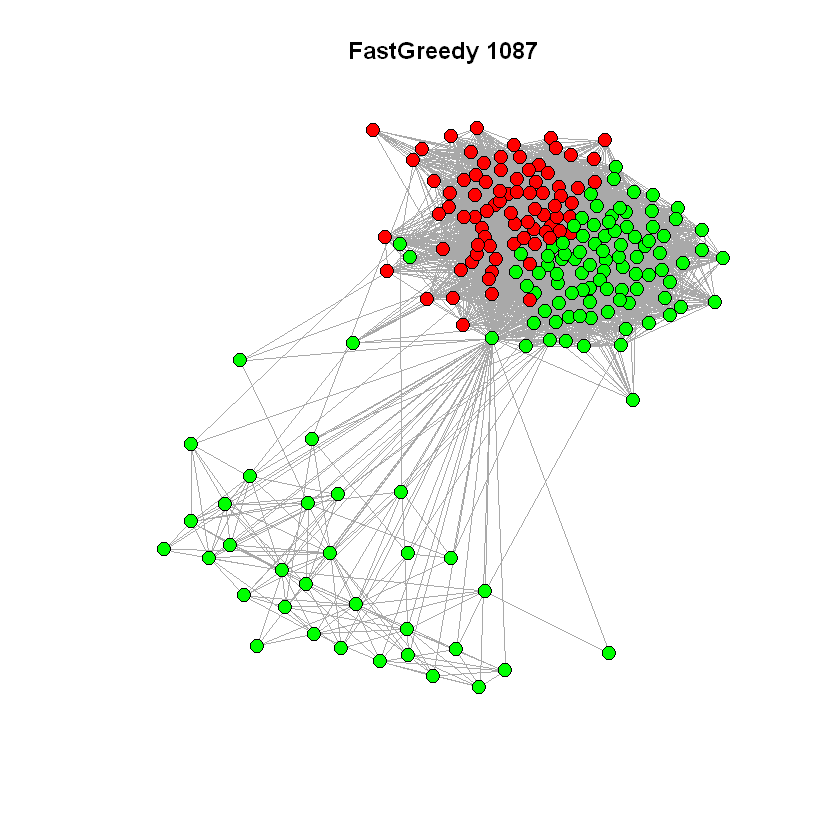

[1] "Infomap for Core Node:  1087"
[1] "Elapsed Time: 0.046360969543457"
Community sizes
  1   2   3   4   5 
174  12  10   7   2 
[1] "Modularity:"
[1] 0.02737159


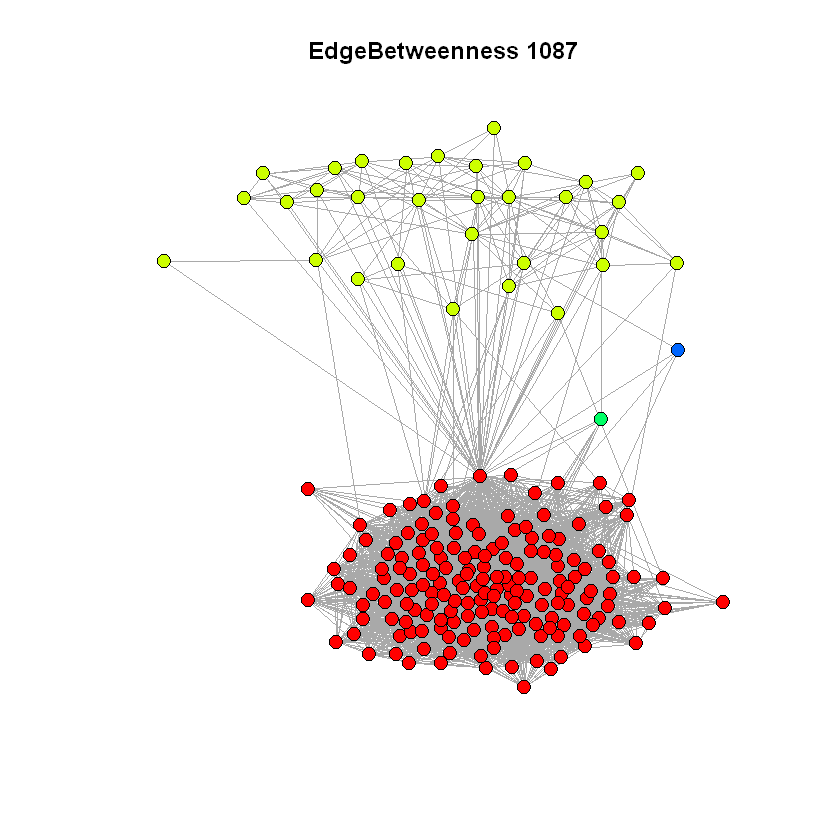

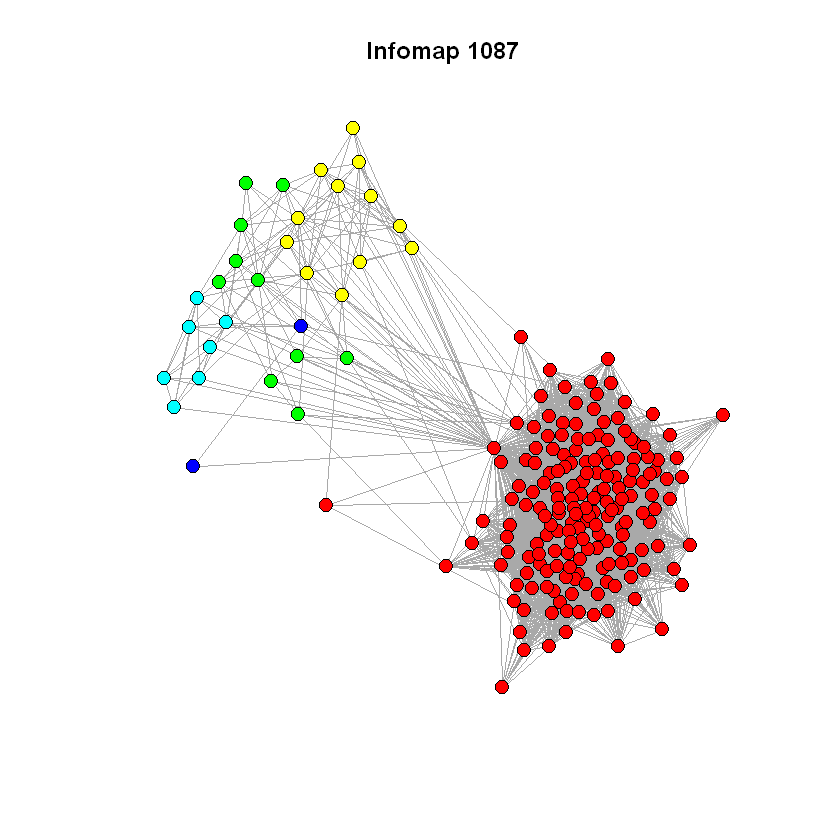

In [32]:
#10
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    #vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    getGraphInfo
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

In [35]:
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    #vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    print(coreNode)
    getGraphInfo(personalizedGraph)
}

[1] 1
[1] "Number of Vertices: 347"
[1] "Number of Edges: 2519"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 324"
[1] "Diameter: 11"
[1] "Average of degrees: 14.5187319884726"
[1] "Variance of degrees: 240.481584514667"
[1] 108
[1] "Number of Vertices: 1045"
[1] "Number of Edges: 26750"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 1034"
[1] "Diameter: 9"
[1] "Average of degrees: 51.1961722488038"
[1] "Variance of degrees: 2215.95860602394"
[1] 349
[1] "Number of Vertices: 229"
[1] "Number of Edges: 3212"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 226"
[1] "Diameter: 9"
[1] "Average of degrees: 28.0524017467249"
[1] "Variance of degrees: 510.234084118593"
[1] 484
[1] "Number of Vertices: 231"
[1] "Number of Edges: 4294"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 231"
[1] "Diameter: 3"
[1] "Average of degrees: 37.1774891774892"
[1] "Variance of degrees: 373.659664972708"
[1] 1087
[1] "Number of Vertices: 205"
[1] "Number of Edges: 7204"
[1] "Is the Graph Connec

[1] "FastGreedy for Core Node:  1"
[1] "Elapsed Time: 0"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 52  39 121  18  52  24  10   8   3   2   2   2   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26 
  1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4418533
[1] "EdgeBetweenness for Core Node:  1"
[1] "Elapsed Time: 6.3549599647522"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 27  39 140  10   8   9   1   1   1   1  22   1   2   5  13   1   1   2   6   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   7   7   1   2   3   1   2   1   1   1   1   1   2   1   1   1   1   2 
 41  42  43  44  45  46  47  48  49  50 
  2   1   2   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4161461


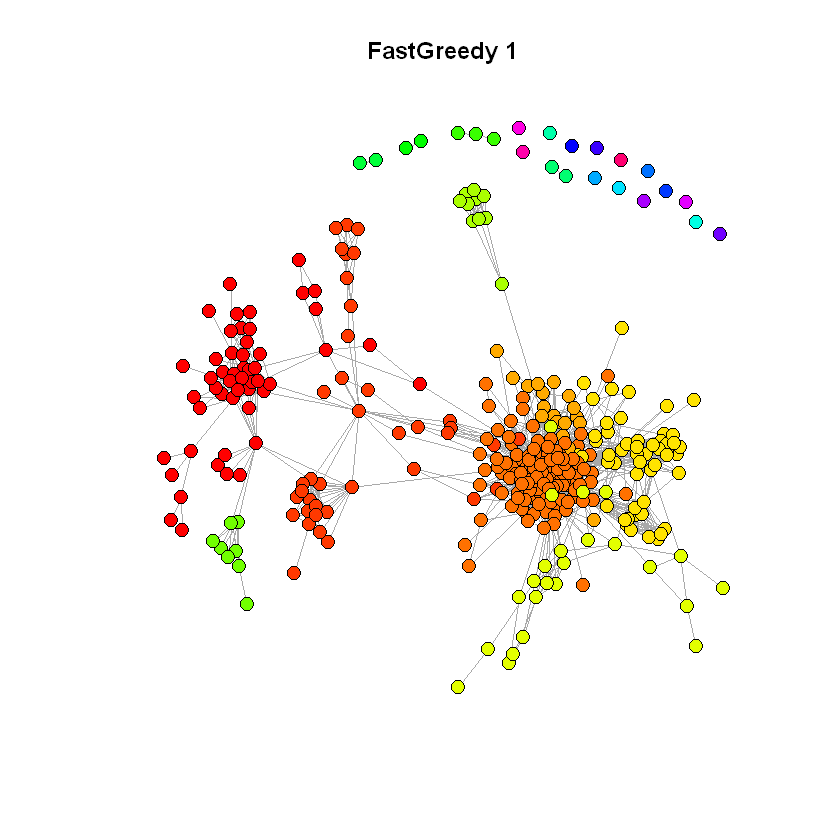

[1] "Infomap for Core Node:  1"
[1] "Elapsed Time: 0.0945069789886475"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143  34  21  16  13  10   9   8  11  10   9   7   6   5   5   3   2   2   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   3   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4180077


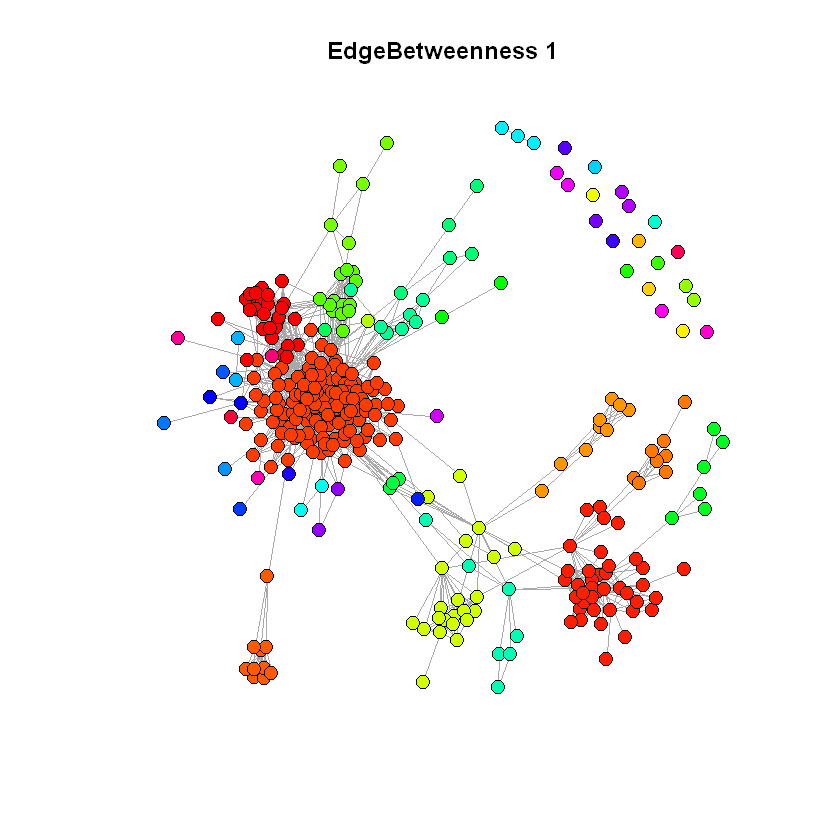

[1] "FastGreedy for Core Node:  108"
[1] "Elapsed Time: 0.049393892288208"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
458 465  70  19   4   3   6   2   2   3   2   1   1   1   1   1   1   1   1   1 
 21  22 
  1   1 
[1] "Modularity:"
[1] 0.4581271


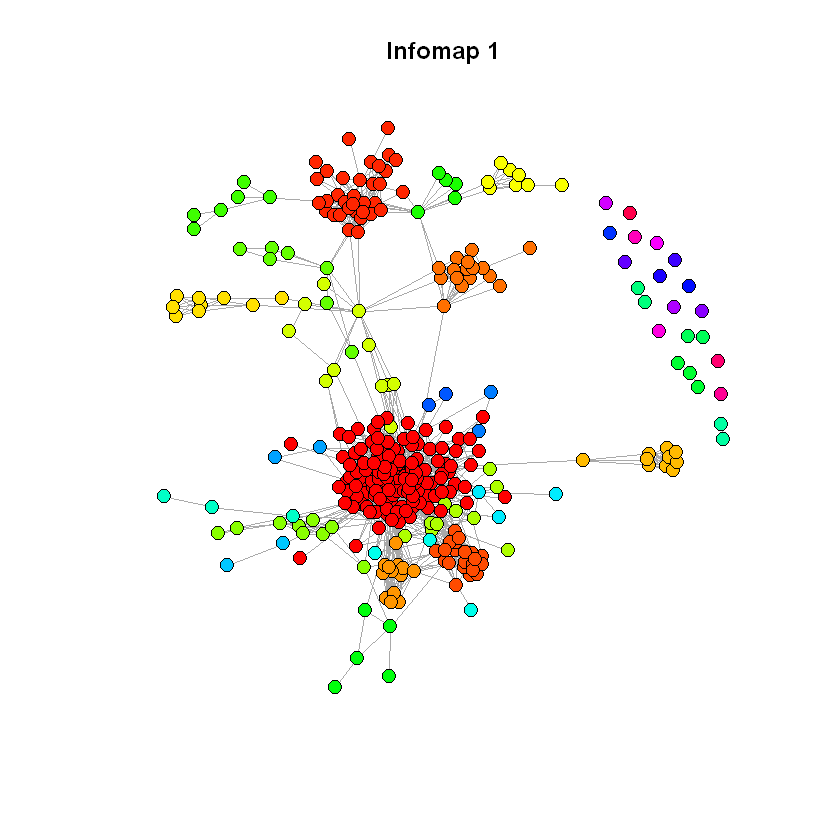

[1] "EdgeBetweenness for Core Node:  108"
[1] "Elapsed Time: 31.4770482182503"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  9 137 138 360 171   3  64  38   2  12   7   1   1  13   4   3  10   6   3  14 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   5   4   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5213216


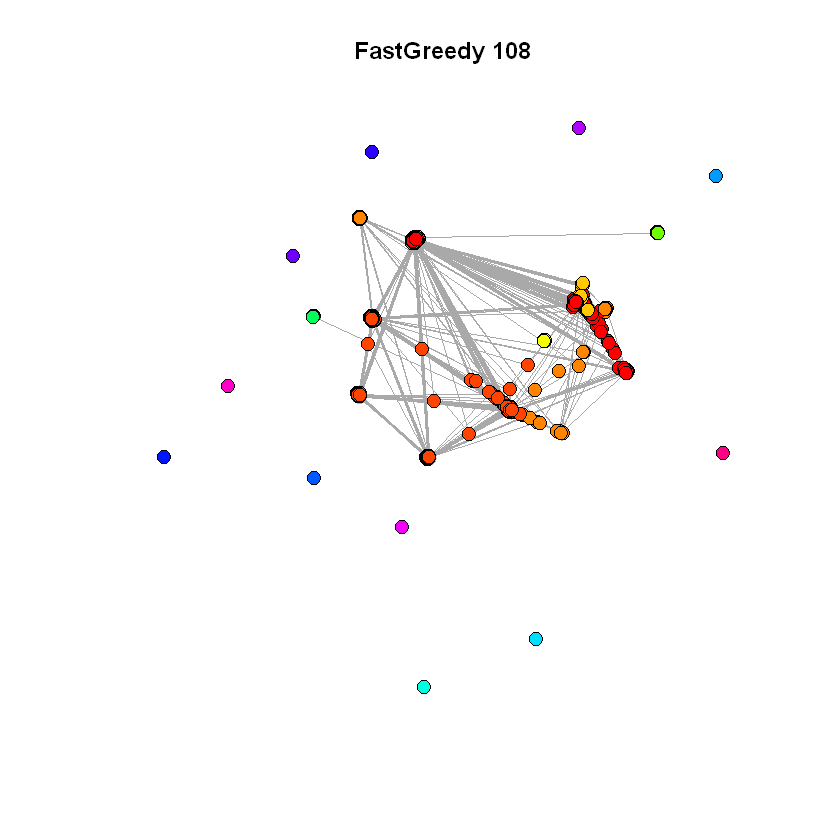

[1] "Infomap for Core Node:  108"
[1] "Elapsed Time: 0.564295768737793"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
325 128  96 103  71  74  48  38  29  19  16  12  11  10   6   6   5   6   4   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38 
  6   4   3   3   3   2   2   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5211271


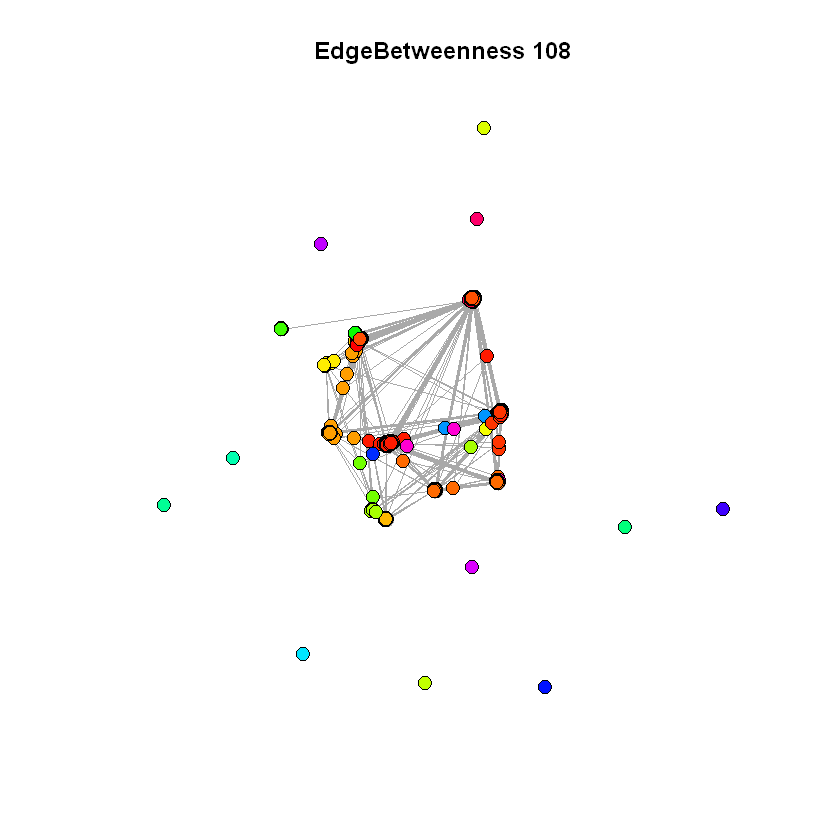

[1] "FastGreedy for Core Node:  349"
[1] "Elapsed Time: 0.00351285934448242"
Community sizes
  1   2   3   4   5   6   7   8 
 27  80 107  10   2   1   1   1 
[1] "Modularity:"
[1] 0.2456918


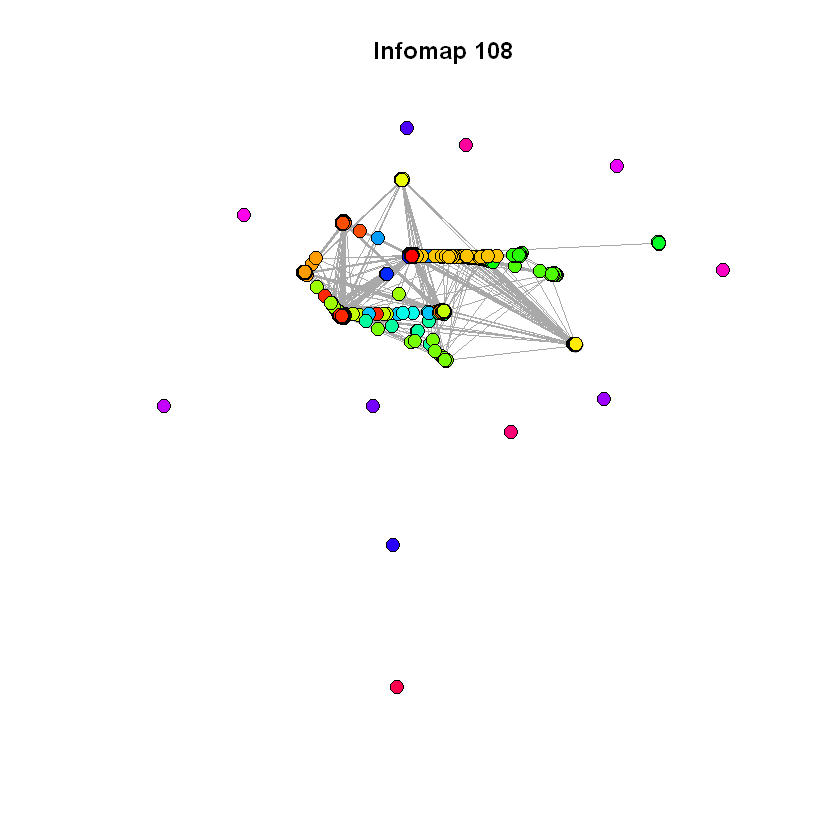

[1] "EdgeBetweenness for Core Node:  349"
[1] "Elapsed Time: 12.2614281177521"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10   2   1   1  85   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 
  1   1   1 
[1] "Modularity:"
[1] 0.1505663


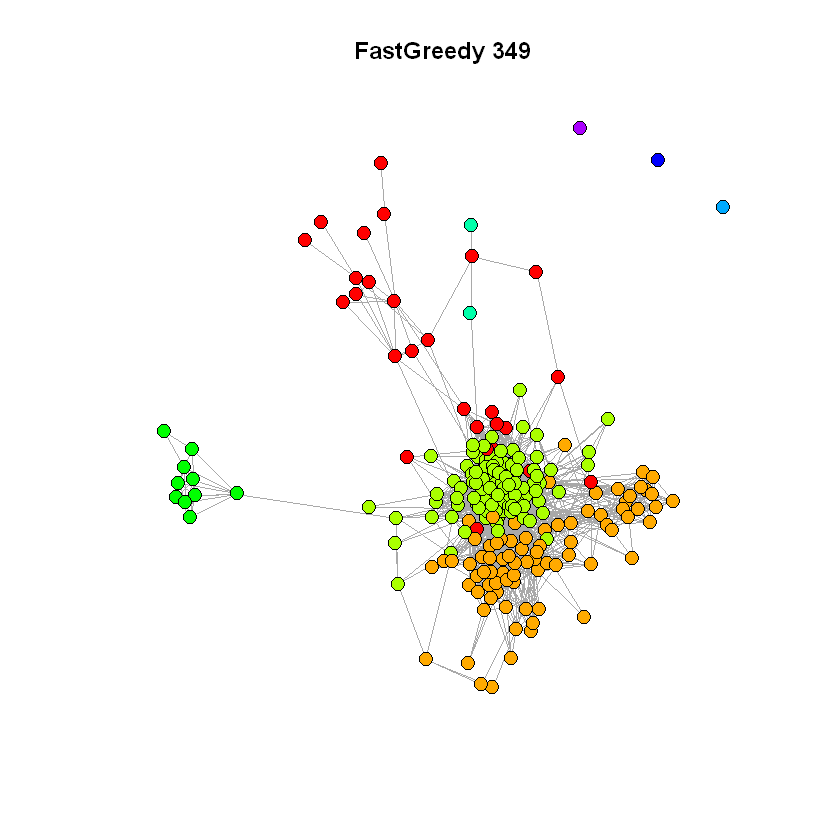

[1] "Infomap for Core Node:  349"
[1] "Elapsed Time: 0.0617518424987793"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
117  29  20  15  10  11   7   6   4   3   2   2   1   1   1 
[1] "Modularity:"
[1] 0.2448156


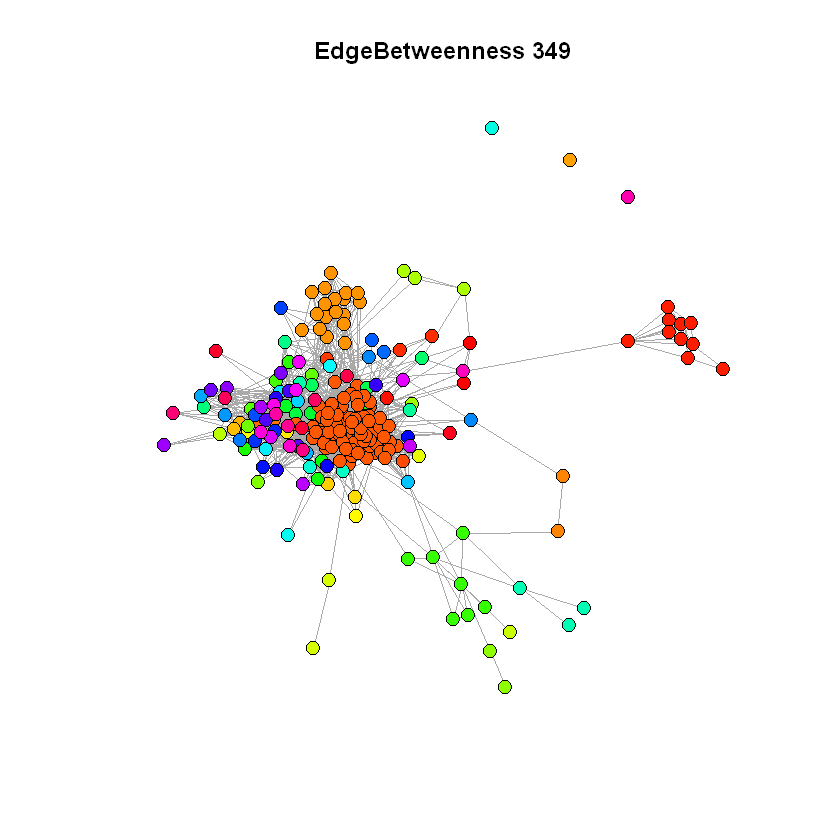

[1] "FastGreedy for Core Node:  484"
[1] "Elapsed Time: 0.0156269073486328"
Community sizes
 1  2  3 
71 71 89 
[1] "Modularity:"
[1] 0.5342142


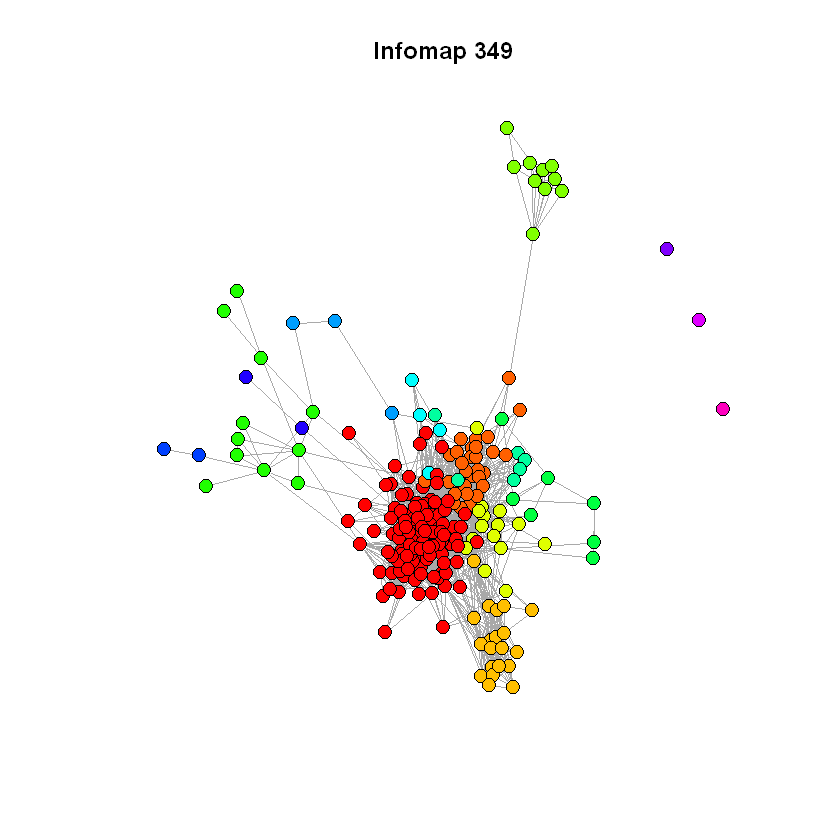

[1] "EdgeBetweenness for Core Node:  484"
[1] "Elapsed Time: 17.3417208194733"
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 
74 79  1  1  1 69  1  1  2  1  1 
[1] "Modularity:"
[1] 0.5154413


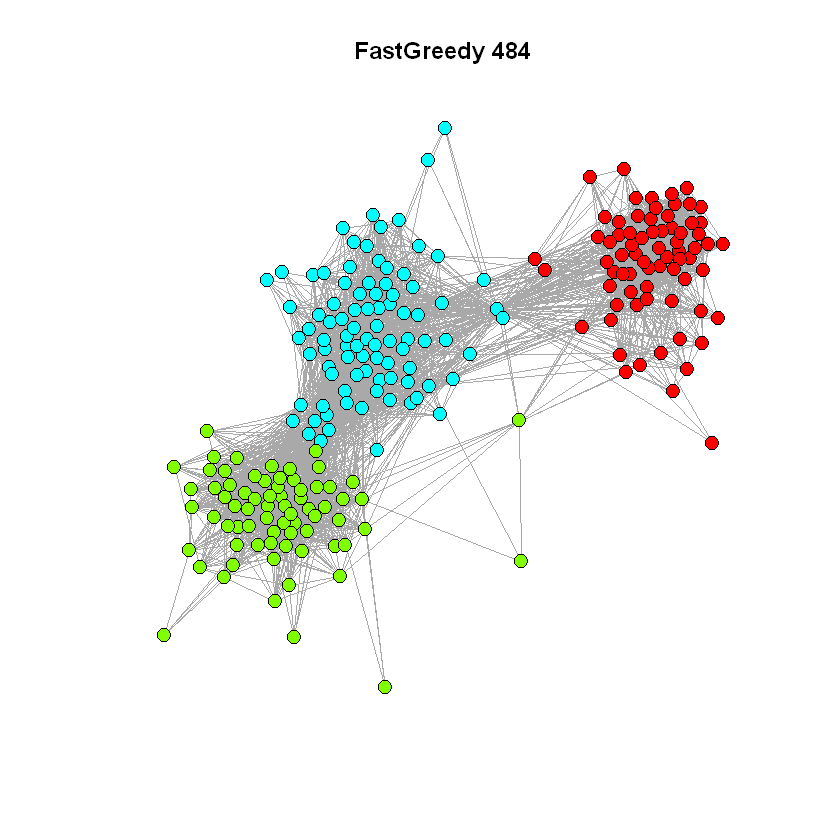

[1] "Infomap for Core Node:  484"
[1] "Elapsed Time: 0.0552041530609131"
Community sizes
 1  2  3  4 
85 73 71  2 
[1] "Modularity:"
[1] 0.5434437


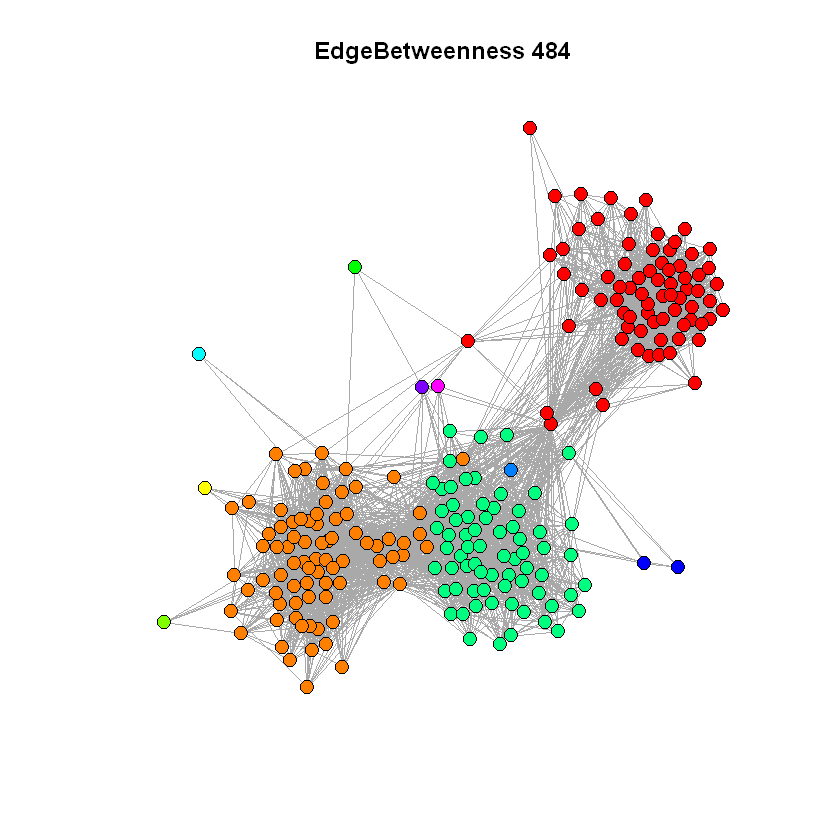

[1] "FastGreedy for Core Node:  1087"
[1] "Elapsed Time: 0"
Community sizes
  1   2 
 80 125 
[1] "Modularity:"
[1] 0.1481956


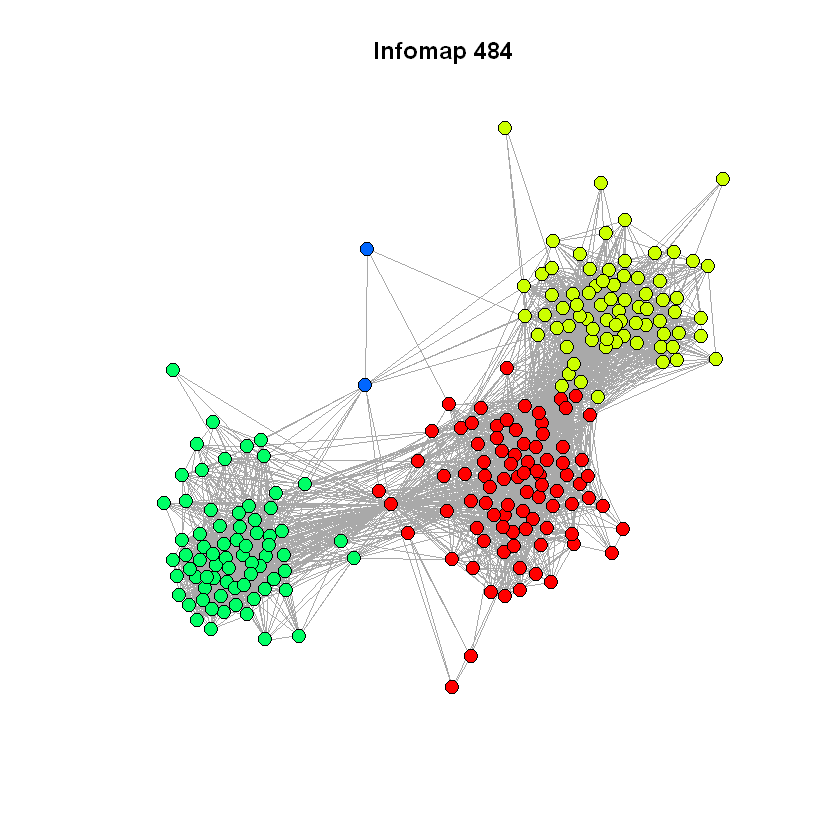

[1] "EdgeBetweenness for Core Node:  1087"
[1] "Elapsed Time: 1.15575953324636"
Community sizes
  1   2   3   4 
172  31   1   1 
[1] "Modularity:"
[1] 0.0324953


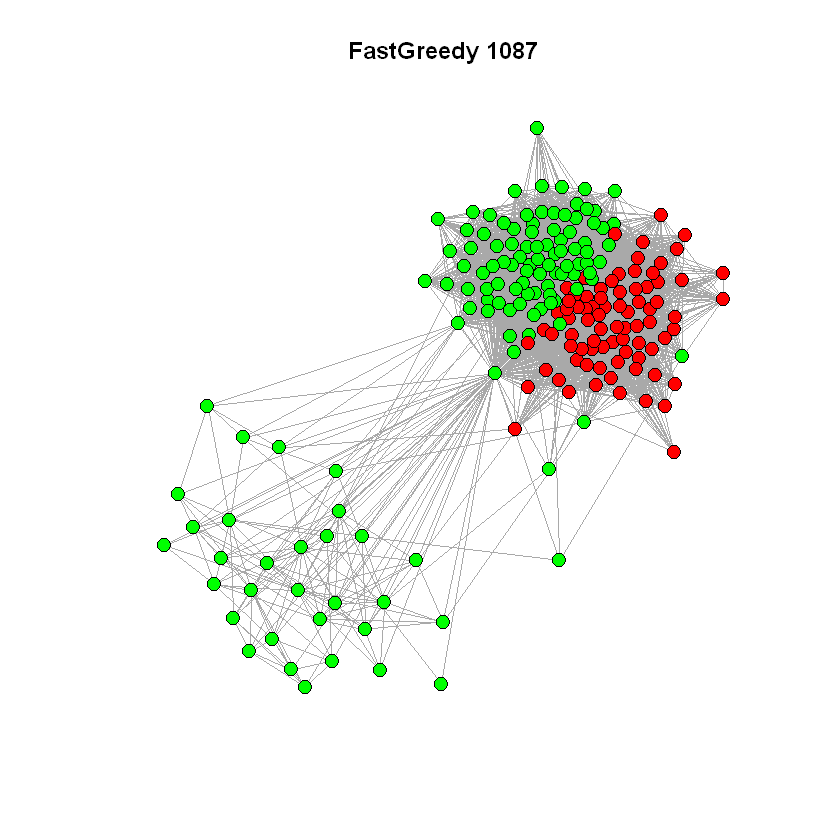

[1] "Infomap for Core Node:  1087"
[1] "Elapsed Time: 0.0625081062316895"
Community sizes
  1   2   3   4   5 
174  12  10   7   2 
[1] "Modularity:"
[1] 0.02737159


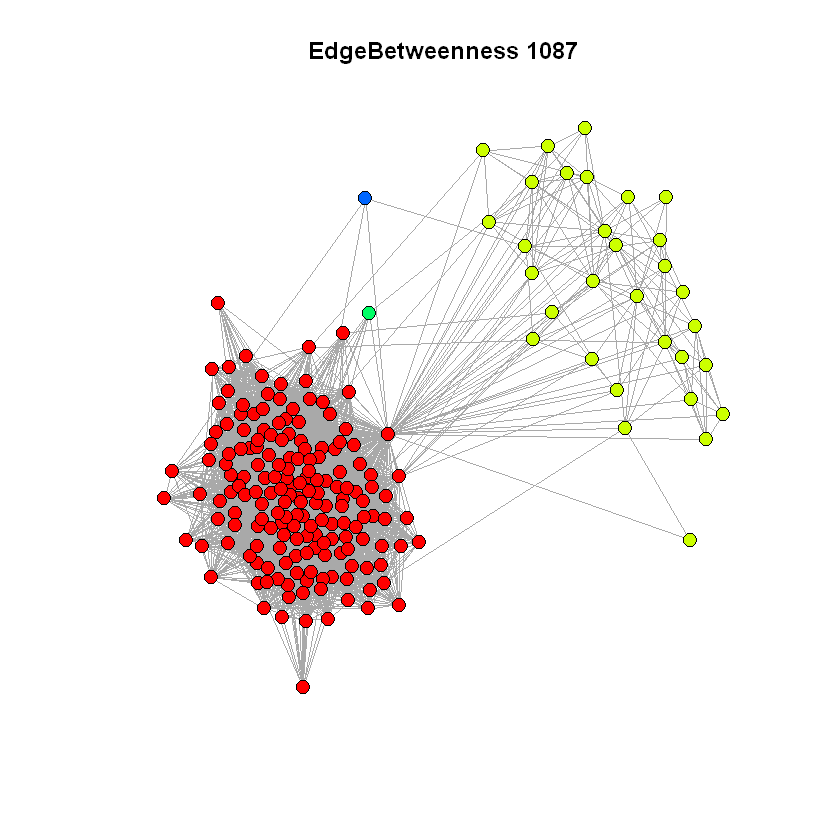

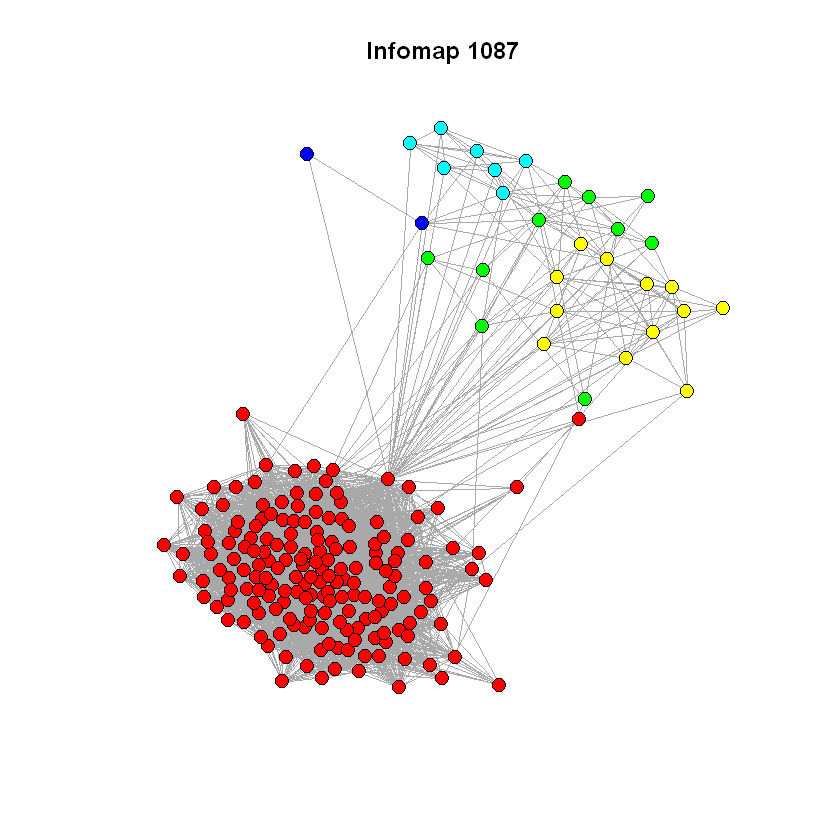

In [33]:
#alternate 10

coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    
    coreNodeIndex = -1
    for(i in 1:vcount(personalizedGraph)){
        if(V(personalizedGraph)[i]$vid == coreNode){
            coreNodeIndex = i
            break
        }
    }
    
    personalizedGraph = delete_vertices(personalizedGraph, coreNodeIndex)
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

In [36]:
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    
    coreNodeIndex = -1
    for(i in 1:vcount(personalizedGraph)){
        if(V(personalizedGraph)[i]$vid == coreNode){
            coreNodeIndex = i
            break
        }
    }
    
    personalizedGraph = delete_vertices(personalizedGraph, coreNodeIndex)
    layout = layout.fruchterman.reingold(personalizedGraph)
    print(coreNode)
    getGraphInfo(personalizedGraph)
    }

[1] 1
[1] "Number of Vertices: 347"
[1] "Number of Edges: 2519"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 324"
[1] "Diameter: 11"
[1] "Average of degrees: 14.5187319884726"
[1] "Variance of degrees: 240.481584514667"
[1] 108
[1] "Number of Vertices: 1045"
[1] "Number of Edges: 26750"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 1034"
[1] "Diameter: 9"
[1] "Average of degrees: 51.1961722488038"
[1] "Variance of degrees: 2215.95860602394"
[1] 349
[1] "Number of Vertices: 229"
[1] "Number of Edges: 3212"
[1] "Is the Graph Connected: FALSE"
[1] "GCC Size: 226"
[1] "Diameter: 9"
[1] "Average of degrees: 28.0524017467249"
[1] "Variance of degrees: 510.234084118593"
[1] 484
[1] "Number of Vertices: 231"
[1] "Number of Edges: 4294"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 231"
[1] "Diameter: 3"
[1] "Average of degrees: 37.1774891774892"
[1] "Variance of degrees: 373.659664972708"
[1] 1087
[1] "Number of Vertices: 205"
[1] "Number of Edges: 7204"
[1] "Is the Graph Connec

In [72]:
#11
#theoretical

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



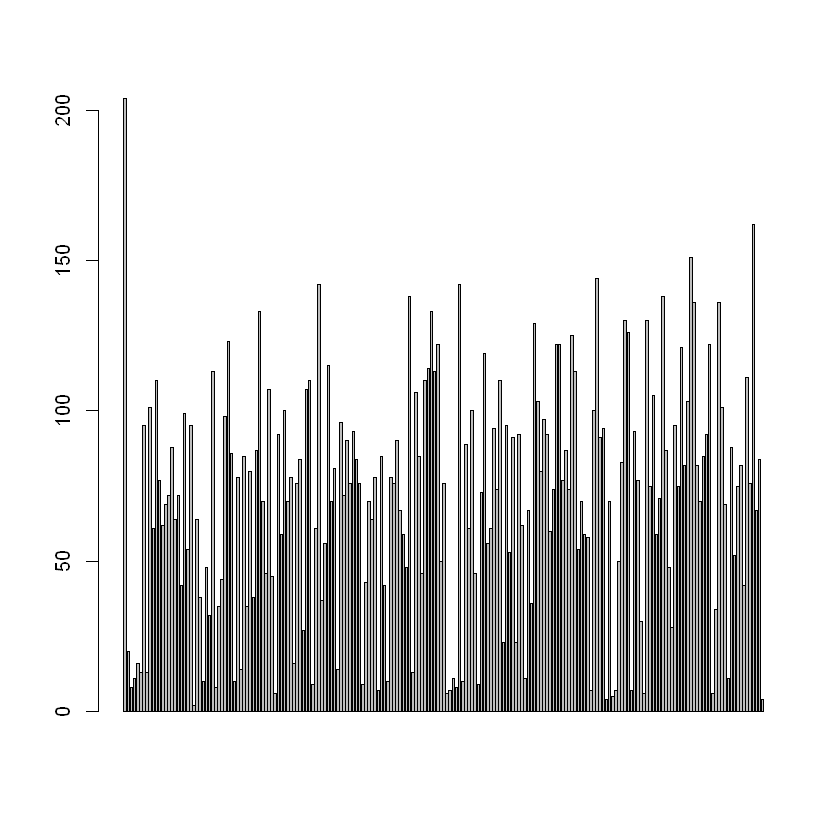

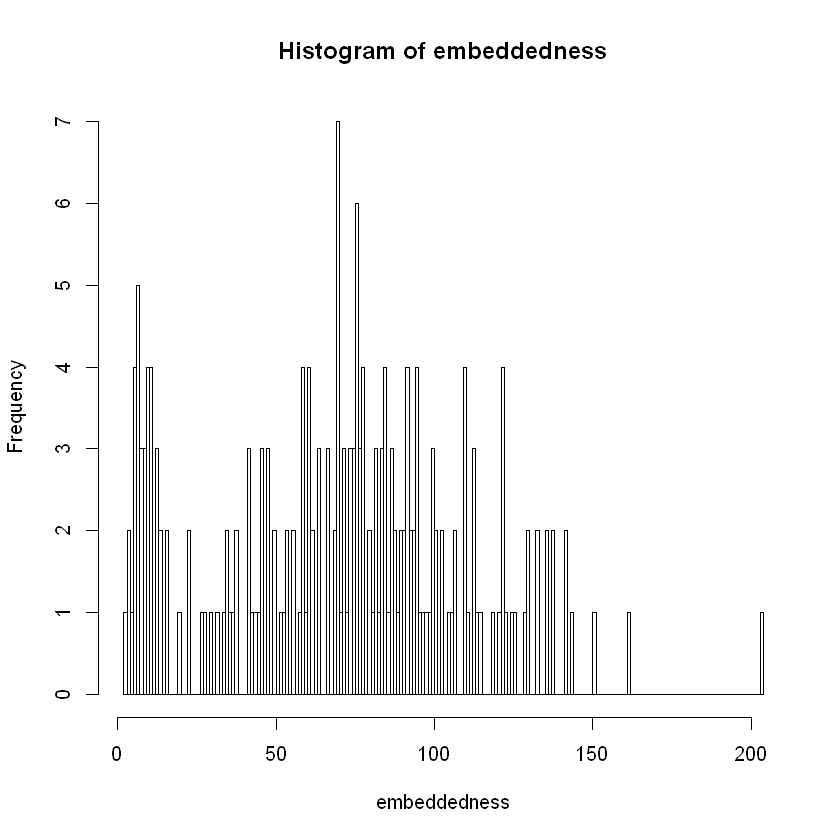

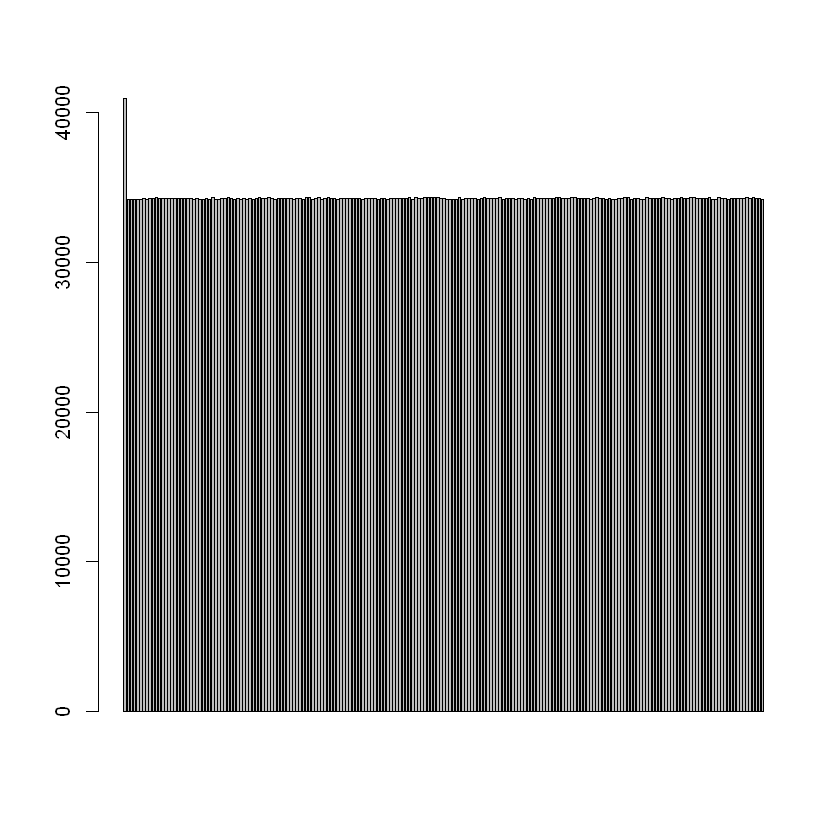

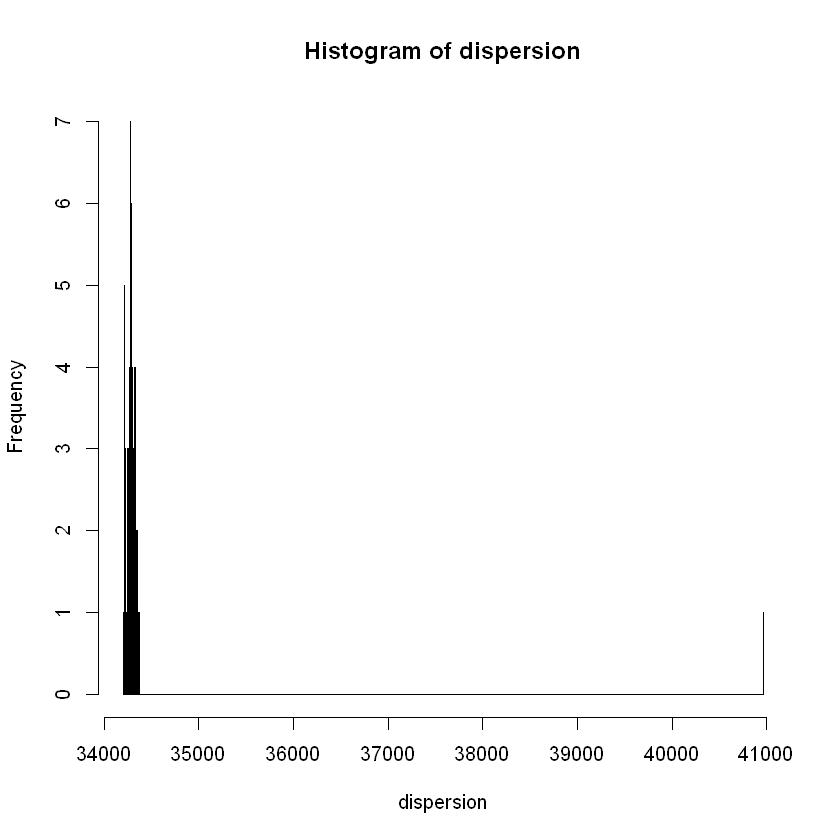

In [45]:
#12, 13, 14
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1087)
for(coreNode in coreNodeList1){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    #vertices = c(vertices, coreNode)
    #length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    personalizedAdList = as_adj_list(personalizedGraph)
    
    embeddedness = c()
    dispersion = c()
    for(node in 1:vcount(personalizedGraph)){
        embeddedness = c(embeddedness, length(personalizedAdList[[node]]))
        
        newGraph = delete_vertices(personalizedGraph, node)
        distMatrix = shortest.paths(newGraph, mode = 'all') 
        print(distMatrix)
        
        distance = 0
        for(i in 1:vcount(newGraph)){
            for(j in i:vcount(newGraph)){
                distance = distance + distMatrix[i, j]
            }
        }
        
        dispersion = c(dispersion, distance)
        
    }
    barplot(embeddedness)
    hist(embeddedness, breaks = max(embeddedness))
    barplot(dispersion)
    hist(dispersion, breaks = max(dispersion))
}

In [15]:
findIndex = function(graph, nodeIndex){
    index = -1
    for(i in 1:vcount(graph)){
        if(V(graph)[i]$vid == nodeIndex){
            index = i
            break
        }
    }
    
    return(index)
}

[1] "Core Node: 1"
[1] "Max Embeddedness: 77"
[1] "Max Dispersion: 4882"
[1] "Max Ratio: 63.4025974025974"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


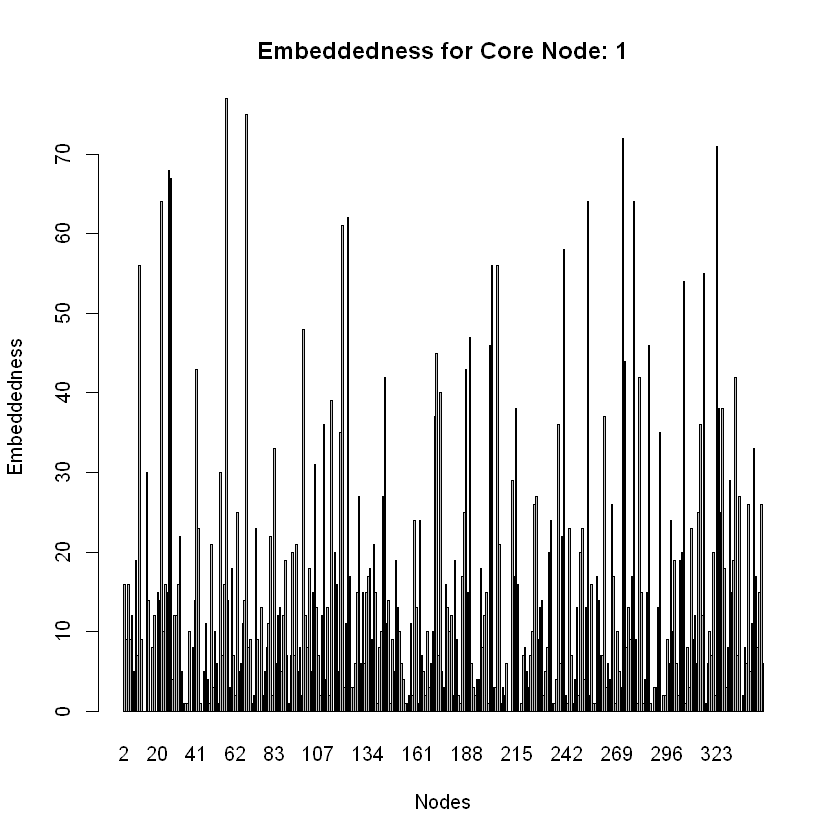

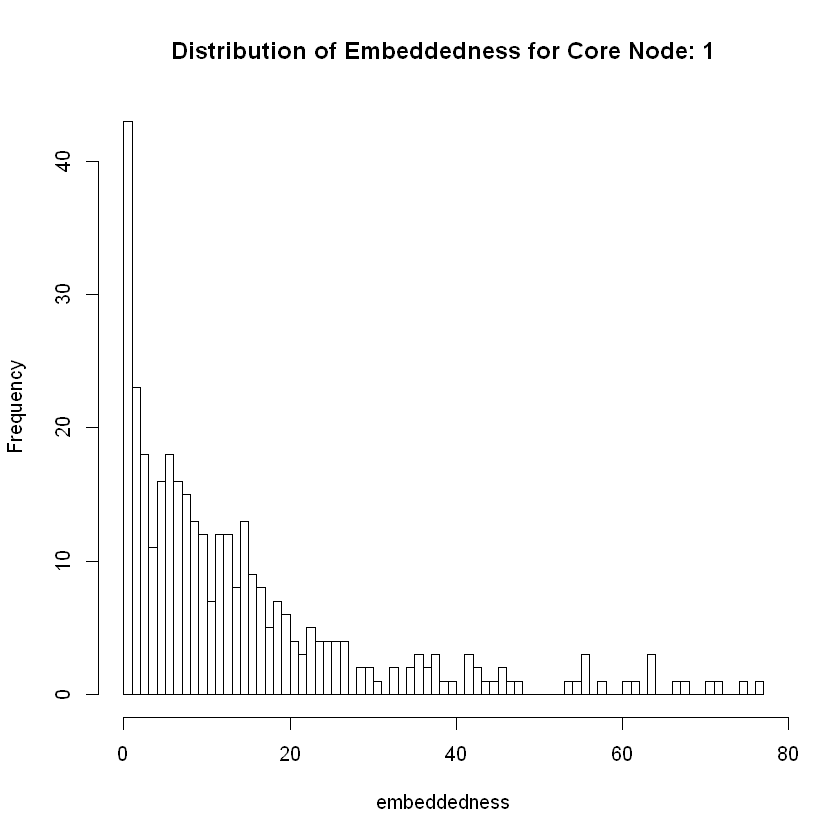

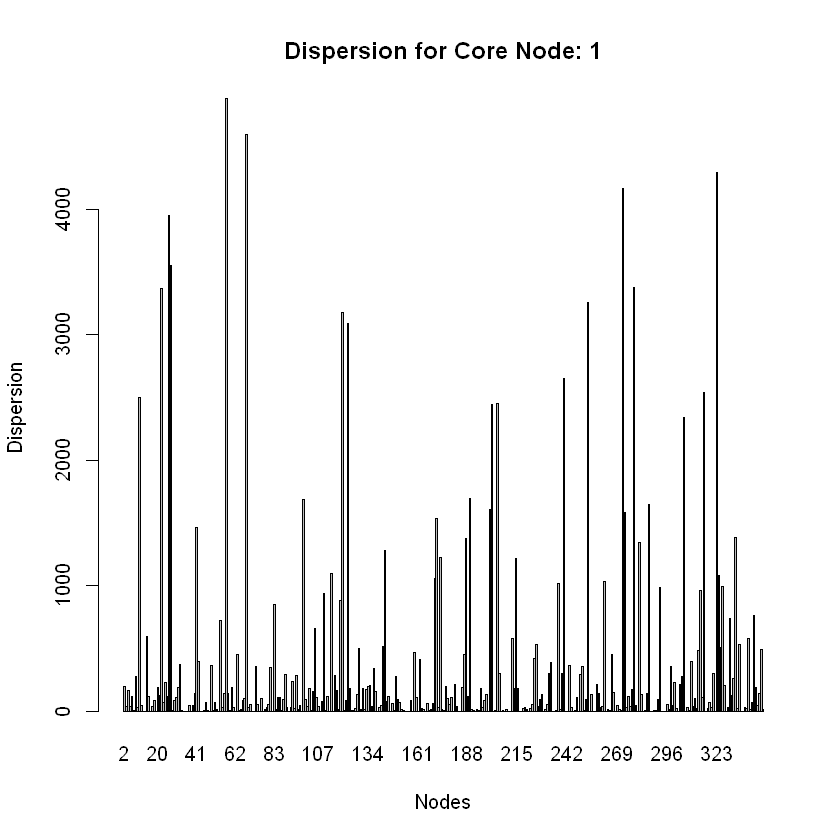

[1] "Fast Greedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 
[1] "Modularity:"
[1] 0.4131014
[1] "Max Embeddedness Node wrt Personalized Graph: 57"
[1] "Max Embeddedness Node wrt Facebook Graph: 57"
[1] "Degree of Max Embeddedness Node: 78"


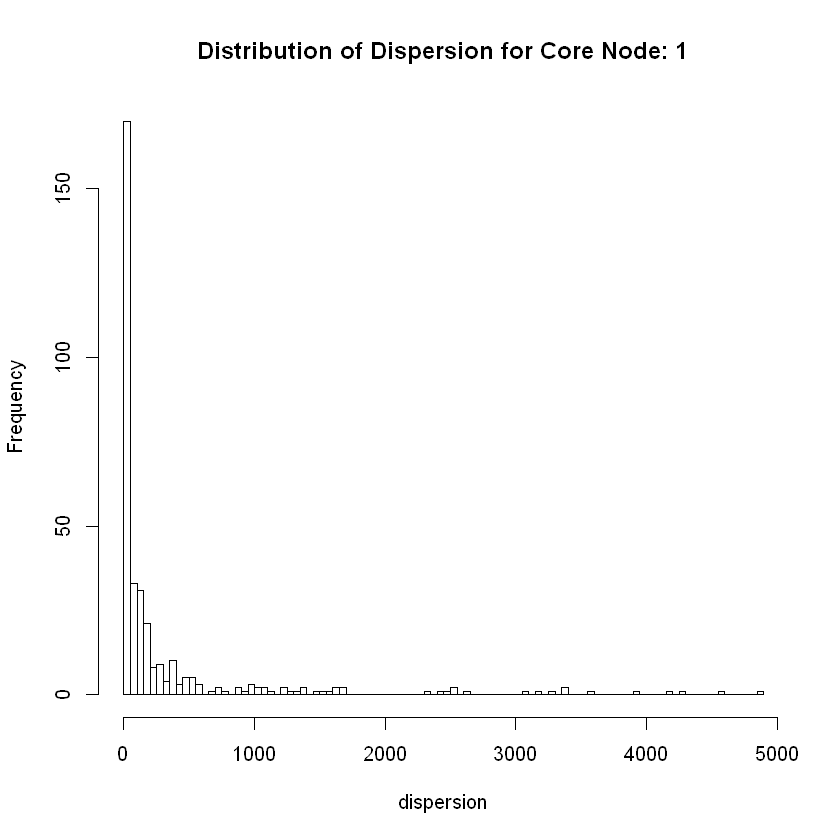

[1] "Max Dispersion Node wrt Personalized Graph: 57"
[1] "Max Dispersion Node wrt Facebook Graph: 57"
[1] "Degree of Max Dispersion Node: 78"


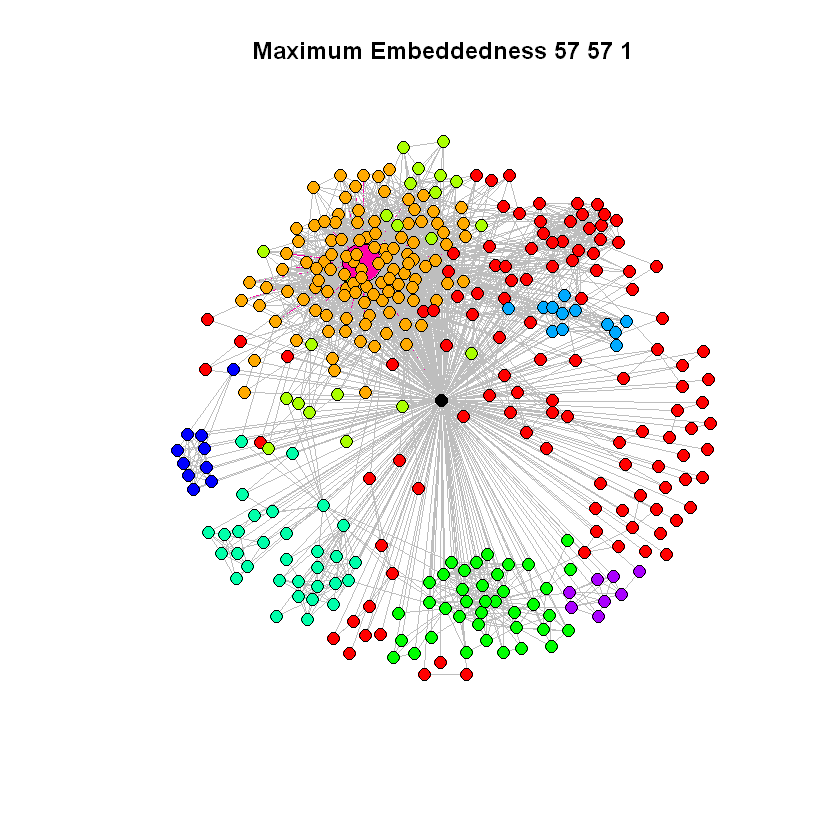

[1] "Max Ratio Node wrt Personalized Graph: 57"
[1] "Max Ratio Node wrt Facebook Graph: 57"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 78"


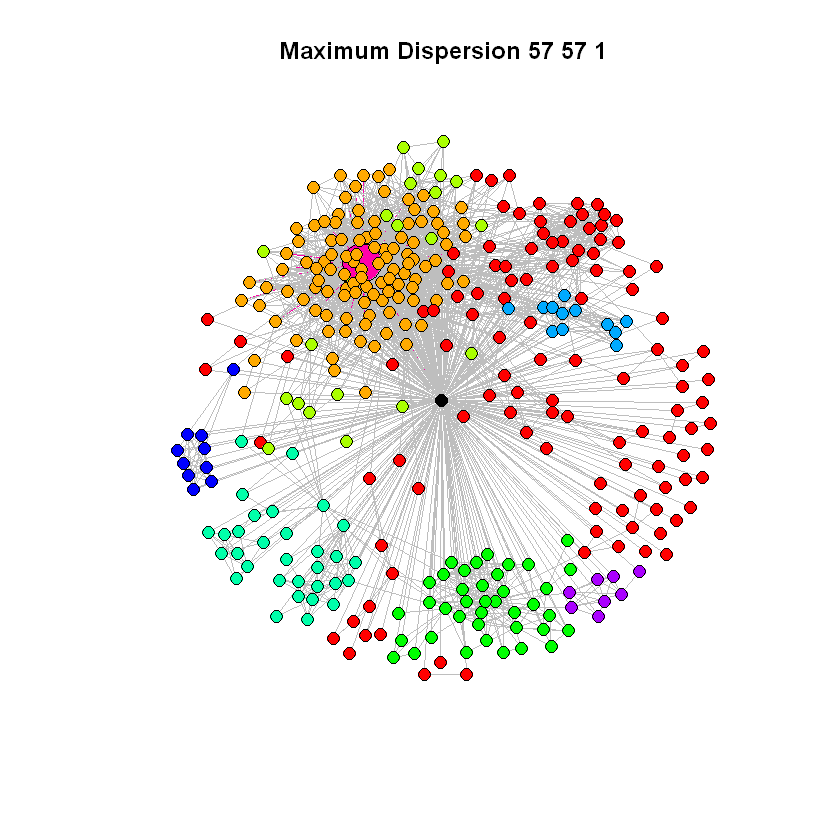

[1] "Core Node: 108"
[1] "Max Embeddedness: 253"
[1] "Max Dispersion: 51167"
[1] "Max Ratio: 202.241106719368"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


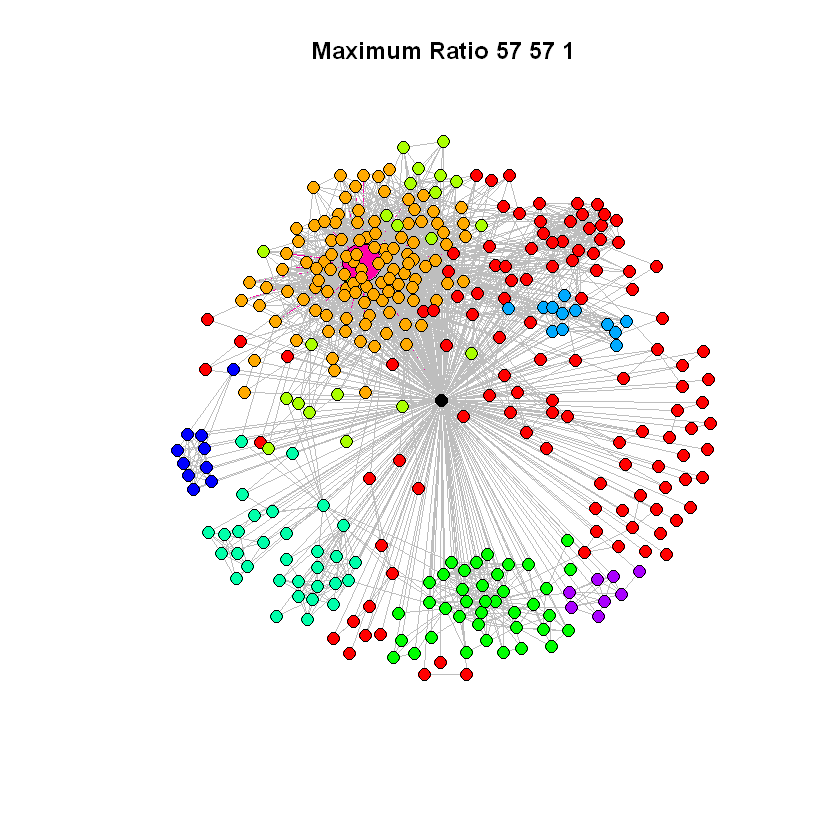

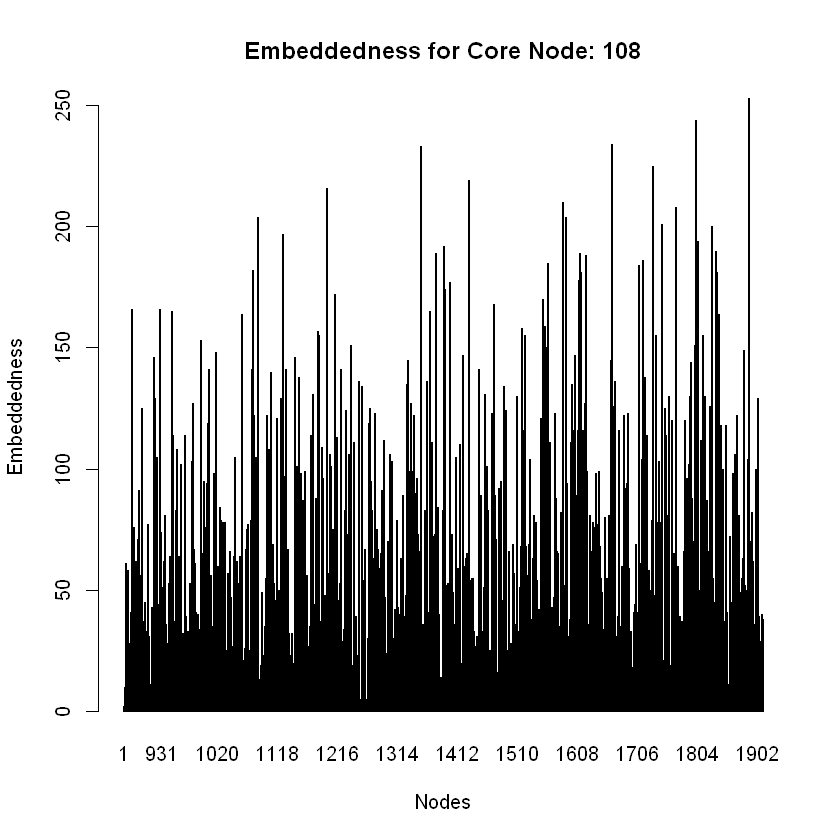

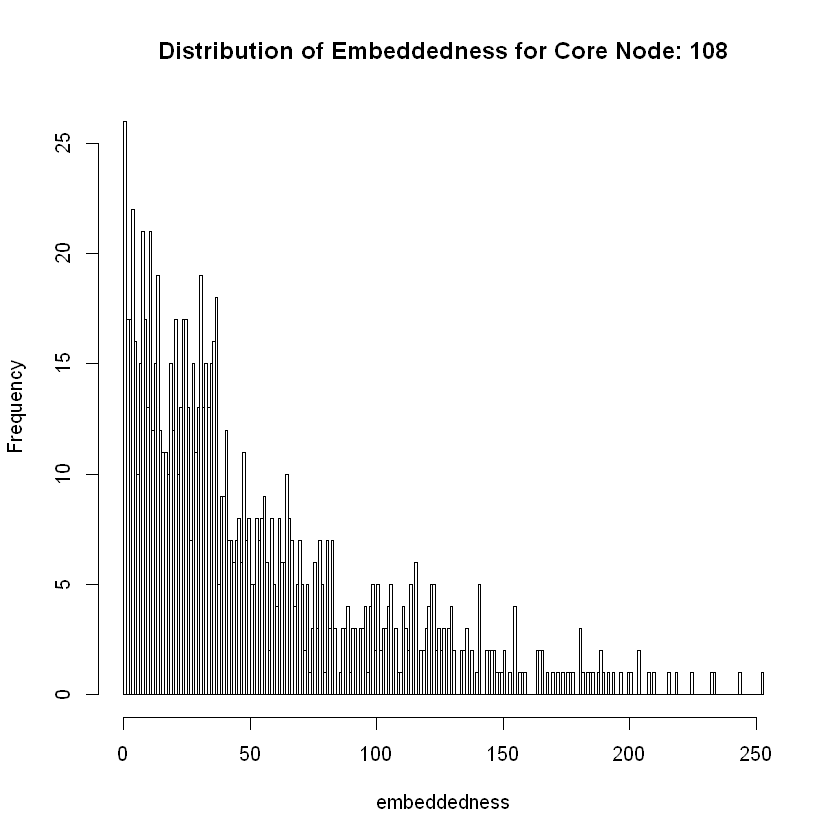

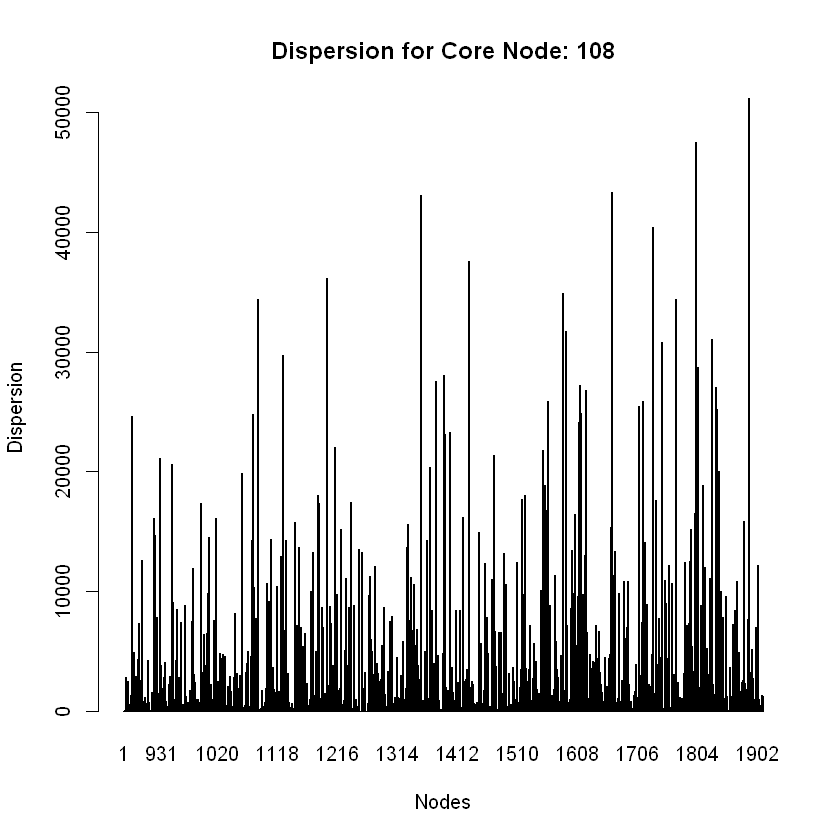

[1] "Fast Greedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 
[1] "Modularity:"
[1] 0.4359294
[1] "Max Embeddedness Node wrt Personalized Graph: 1023"
[1] "Max Embeddedness Node wrt Facebook Graph: 1889"
[1] "Degree of Max Embeddedness Node: 254"


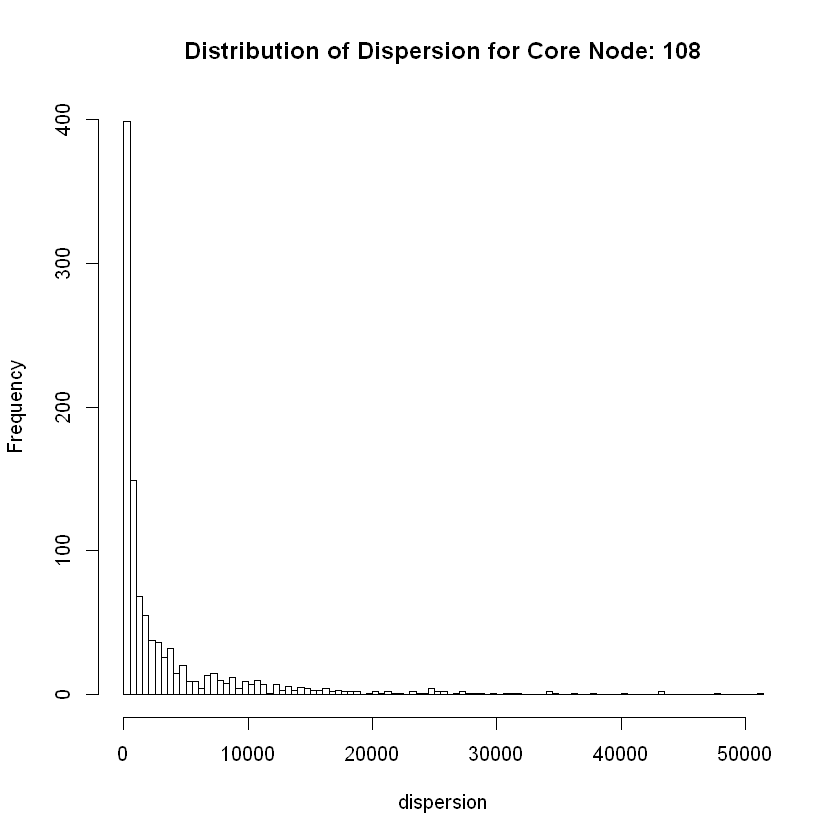

[1] "Max Dispersion Node wrt Personalized Graph: 1023"
[1] "Max Dispersion Node wrt Facebook Graph: 1889"
[1] "Degree of Max Dispersion Node: 254"


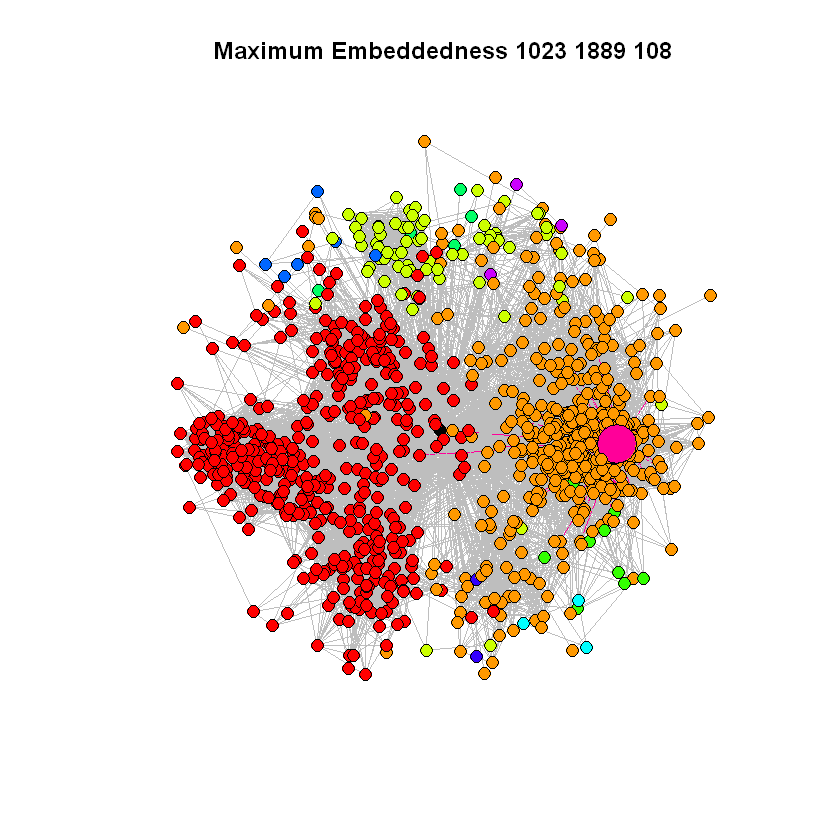

[1] "Max Ratio Node wrt Personalized Graph: 1023"
[1] "Max Ratio Node wrt Facebook Graph: 1889"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 254"


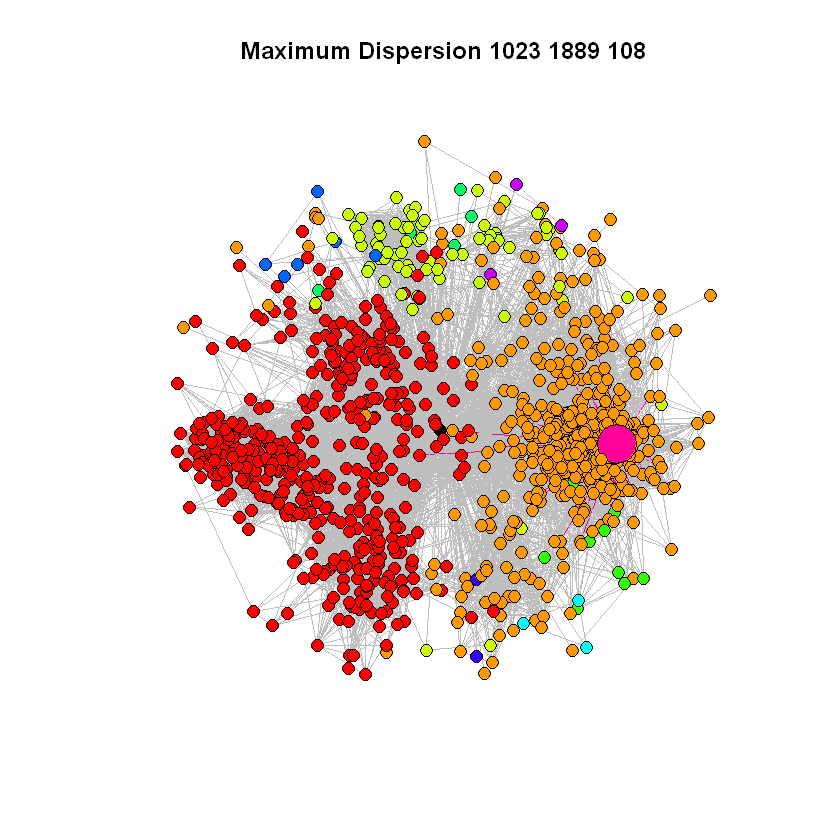

[1] "Core Node: 349"
[1] "Max Embeddedness: 100"
[1] "Max Dispersion: 8174"
[1] "Max Ratio: 81.74"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


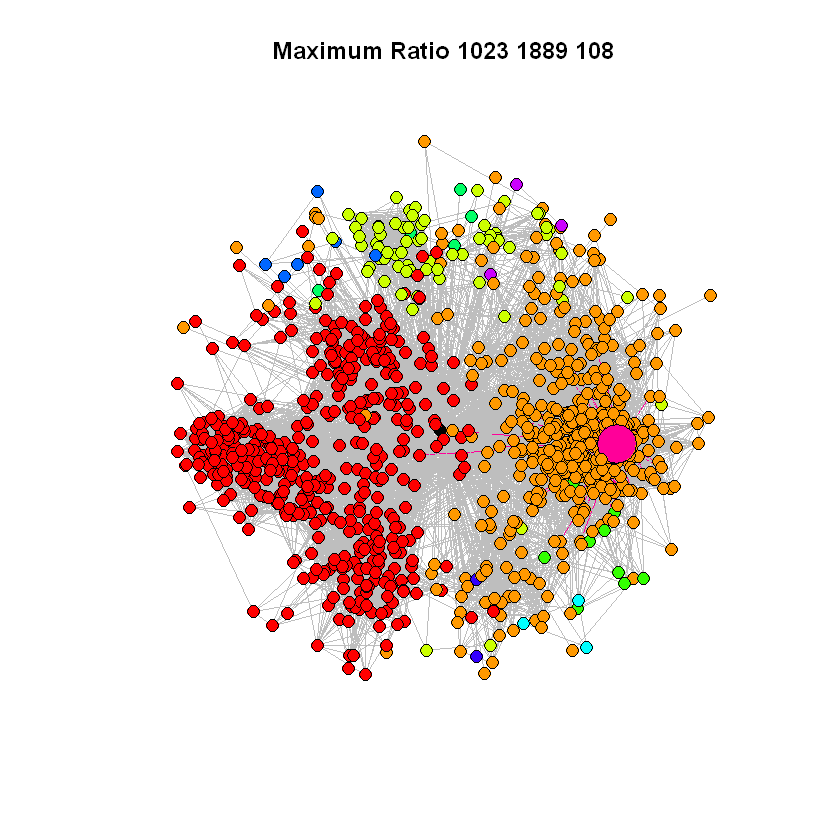

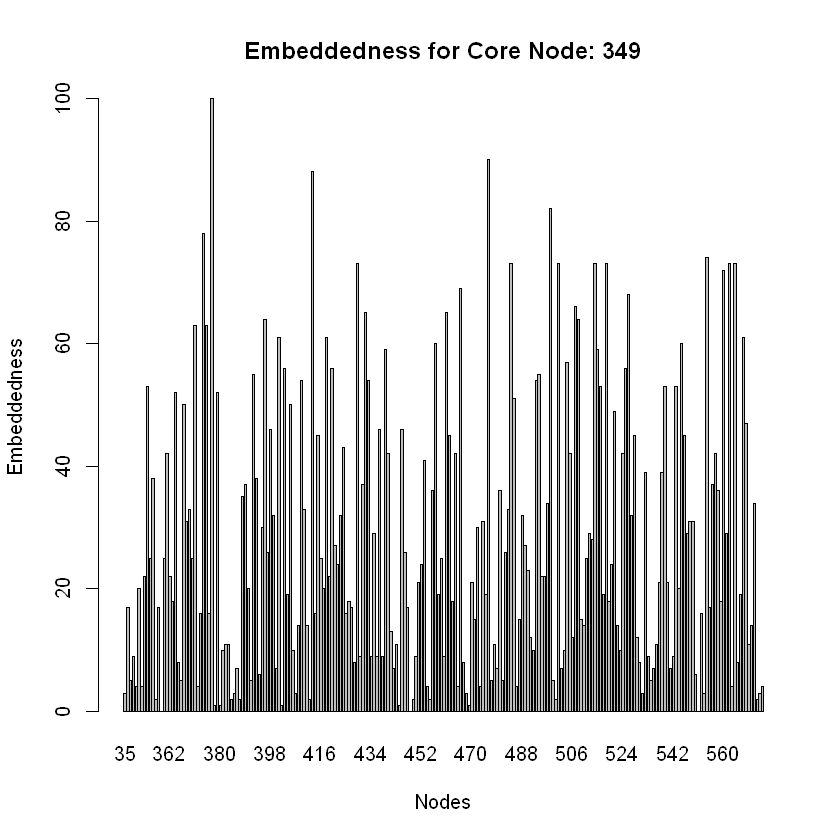

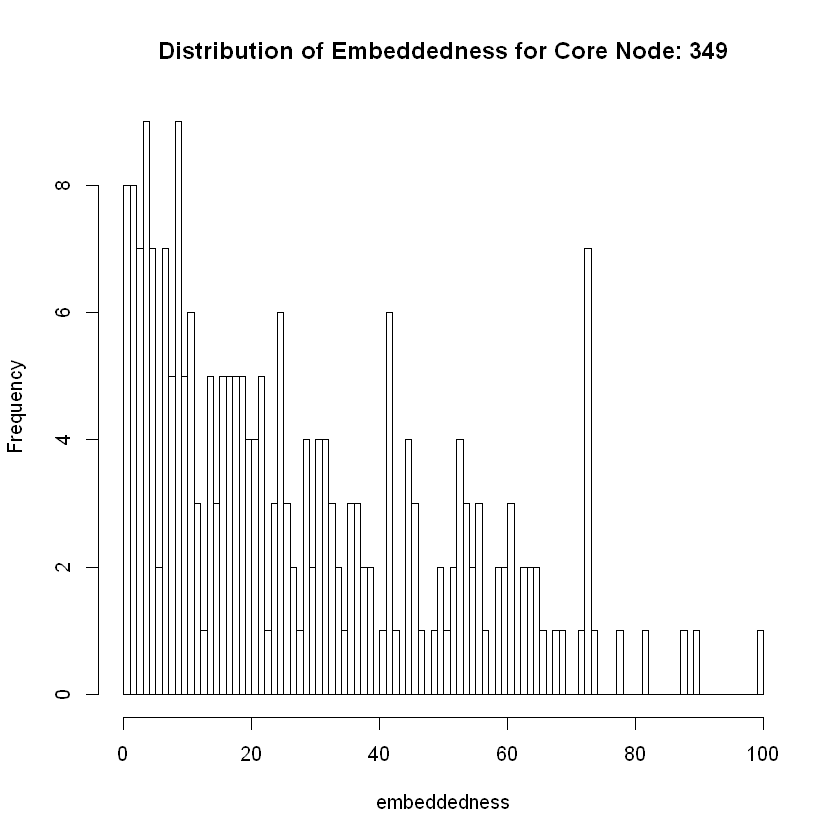

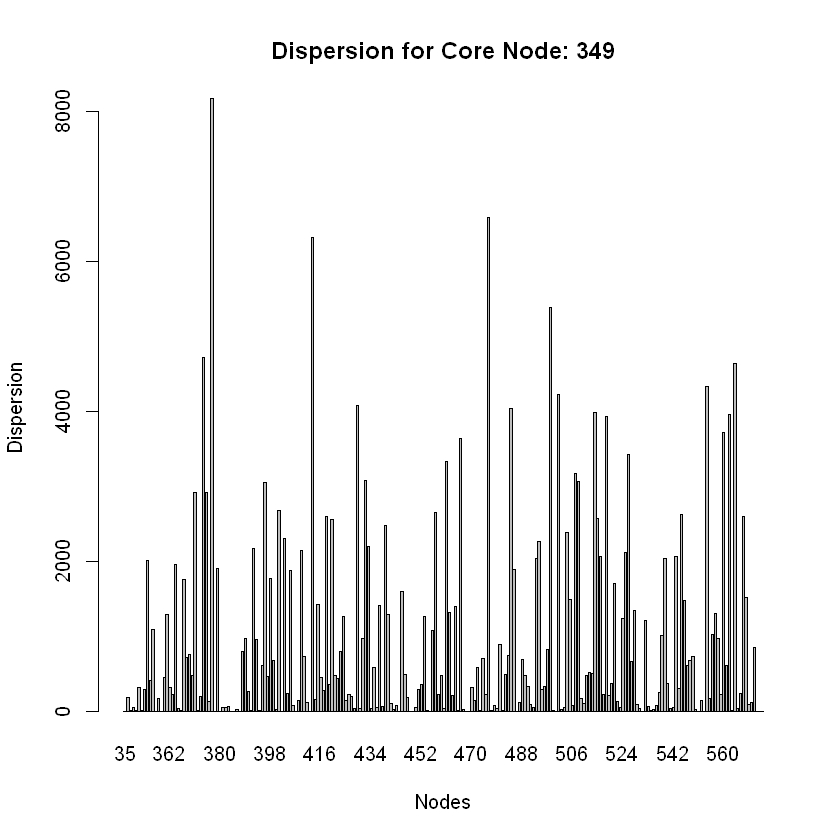

[1] "Fast Greedy for Core Node:  349"
Community sizes
  1   2   3   4   5 
107  11  98   4  10 
[1] "Modularity:"
[1] 0.2517149
[1] "Max Embeddedness Node wrt Personalized Graph: 33"
[1] "Max Embeddedness Node wrt Facebook Graph: 377"
[1] "Degree of Max Embeddedness Node: 133"


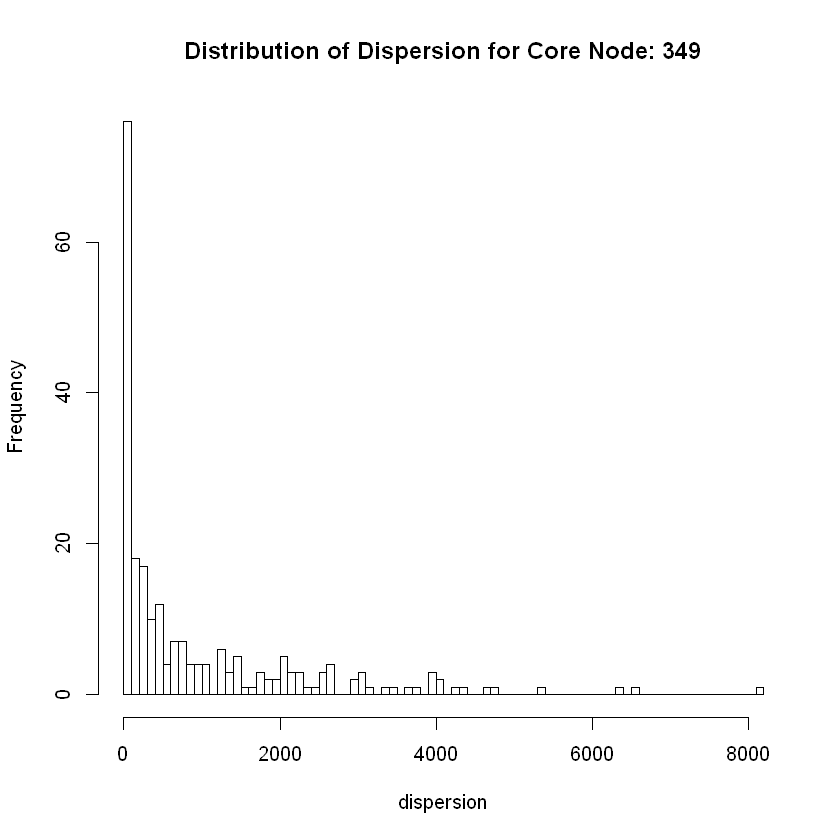

[1] "Max Dispersion Node wrt Personalized Graph: 33"
[1] "Max Dispersion Node wrt Facebook Graph: 377"
[1] "Degree of Max Dispersion Node: 133"


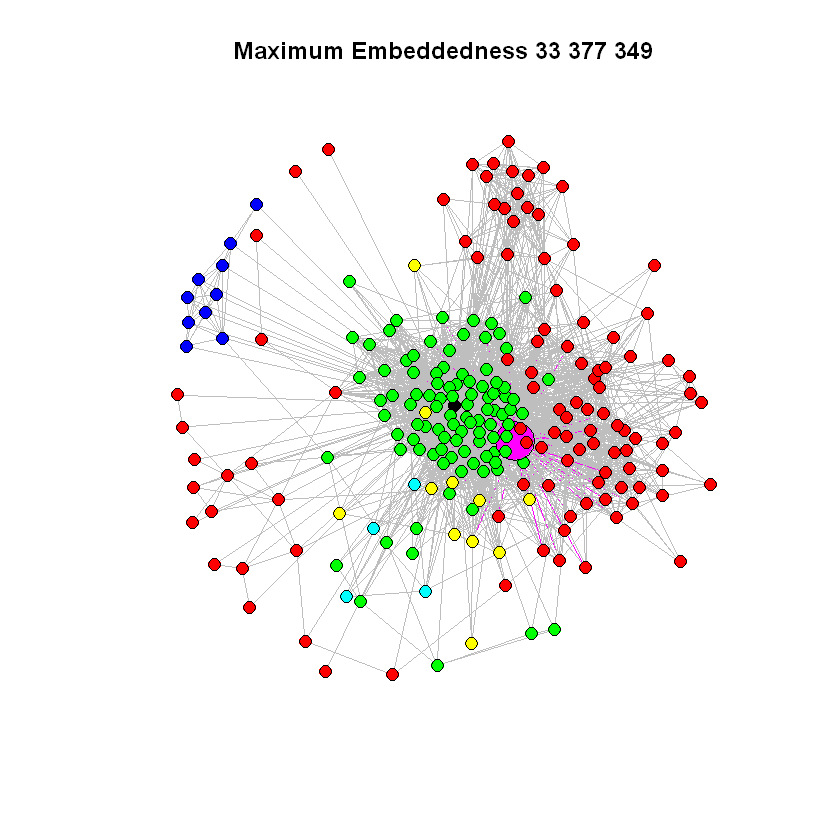

[1] "Max Ratio Node wrt Personalized Graph: 33"
[1] "Max Ratio Node wrt Facebook Graph: 377"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 133"


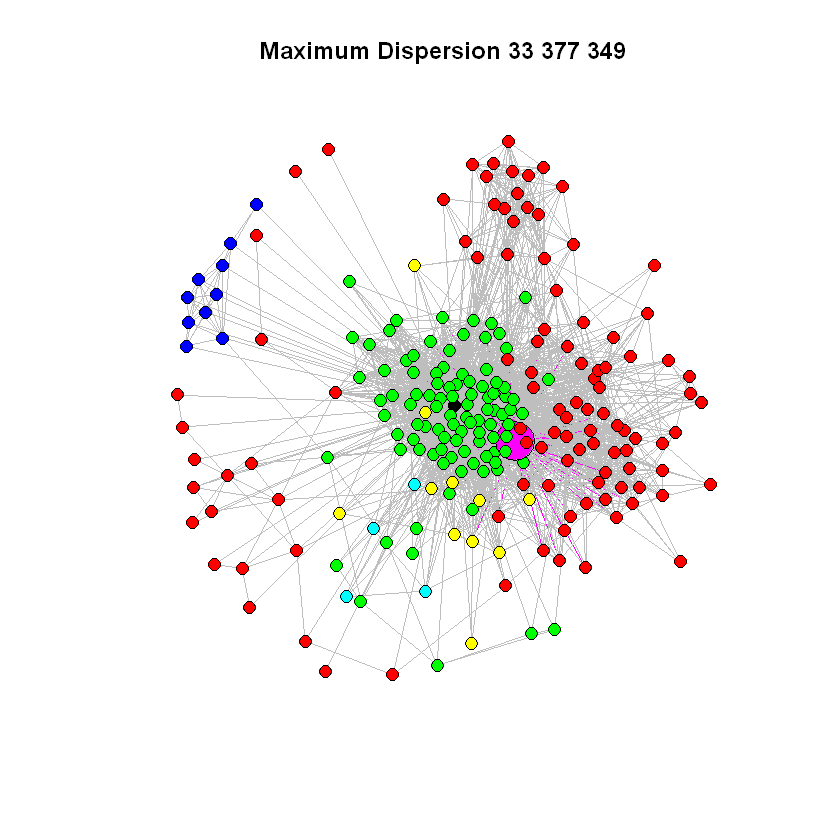

[1] "Core Node: 484"
[1] "Max Embeddedness: 166"
[1] "Max Dispersion: 24644"
[1] "Max Ratio: 148.457831325301"
[1] "Min Embeddedness: 3"
[1] "Min Dispersion: 3"


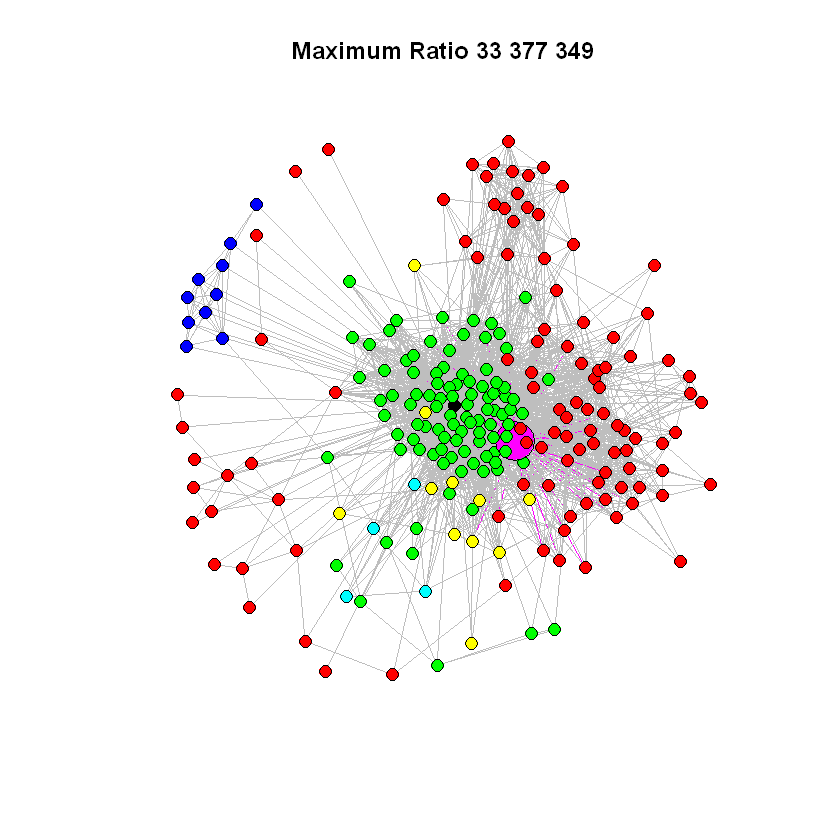

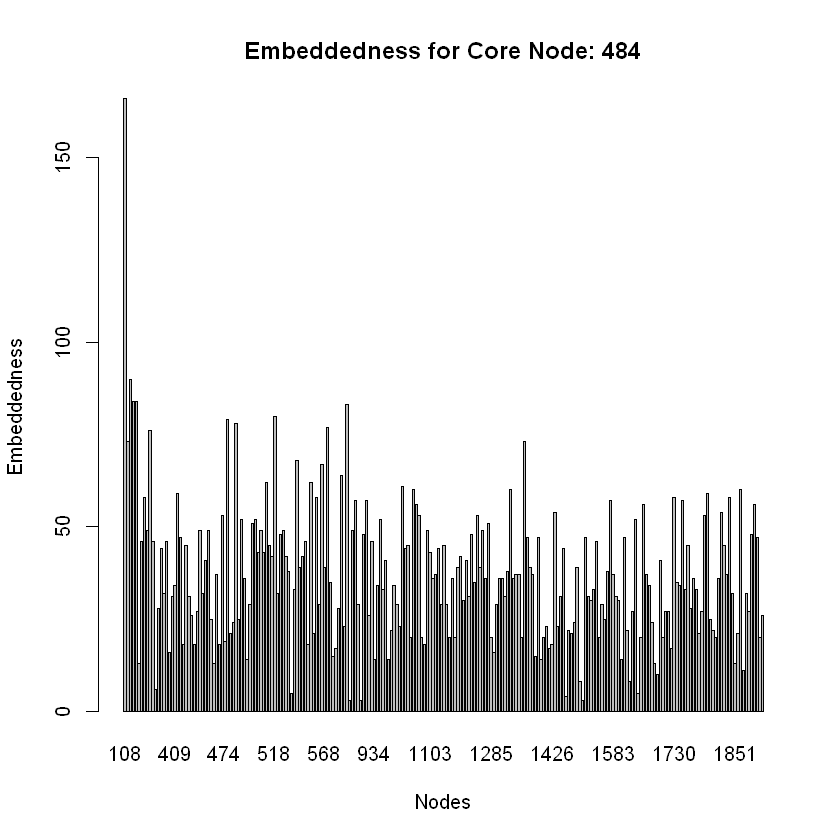

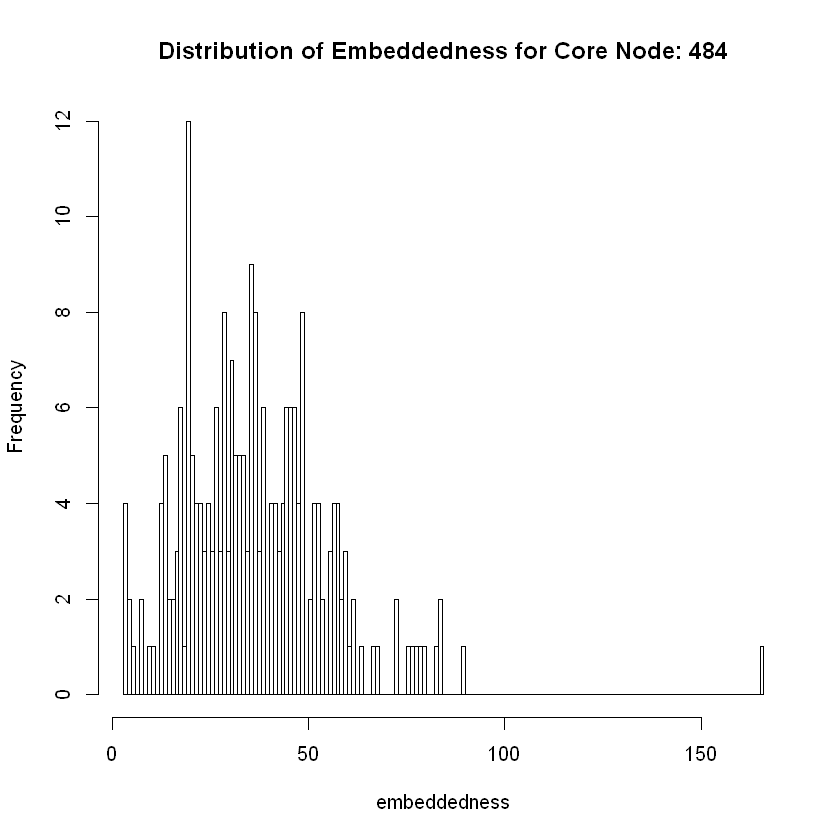

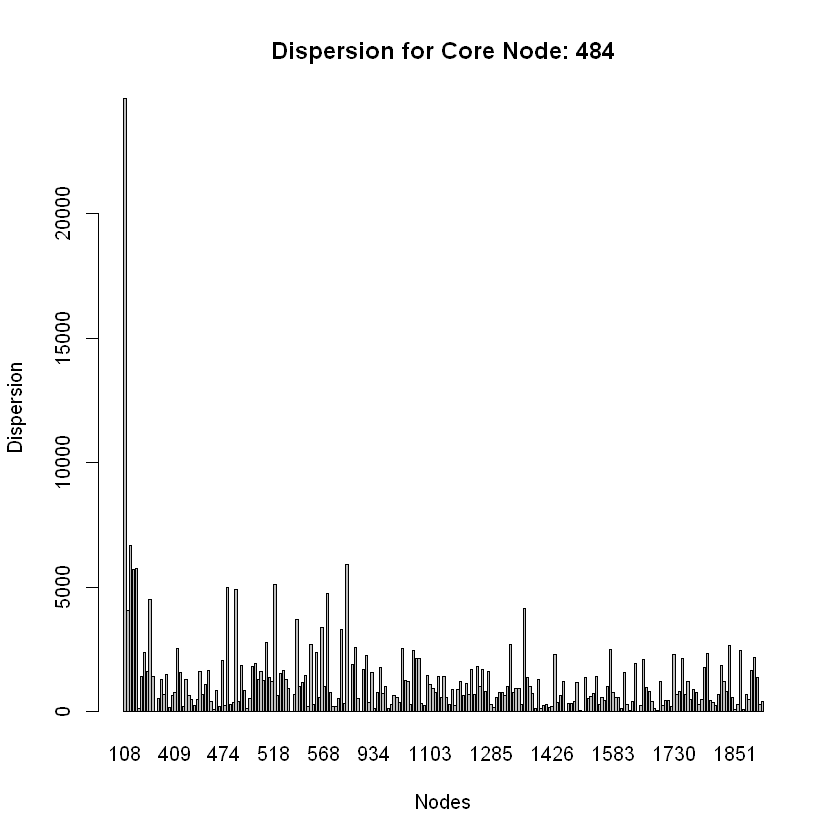

[1] "Fast Greedy for Core Node:  484"
Community sizes
 1  2  3 
71 72 89 
[1] "Modularity:"
[1] 0.5070016
[1] "Max Embeddedness Node wrt Personalized Graph: 1"
[1] "Max Embeddedness Node wrt Facebook Graph: 108"
[1] "Degree of Max Embeddedness Node: 1045"


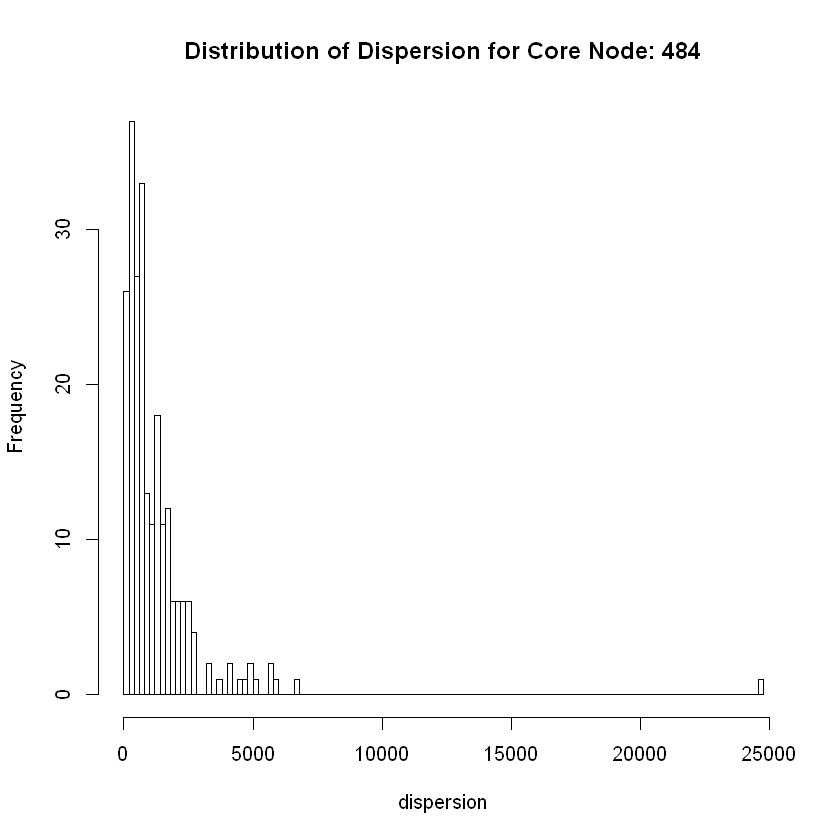

[1] "Max Dispersion Node wrt Personalized Graph: 1"
[1] "Max Dispersion Node wrt Facebook Graph: 108"
[1] "Degree of Max Dispersion Node: 1045"


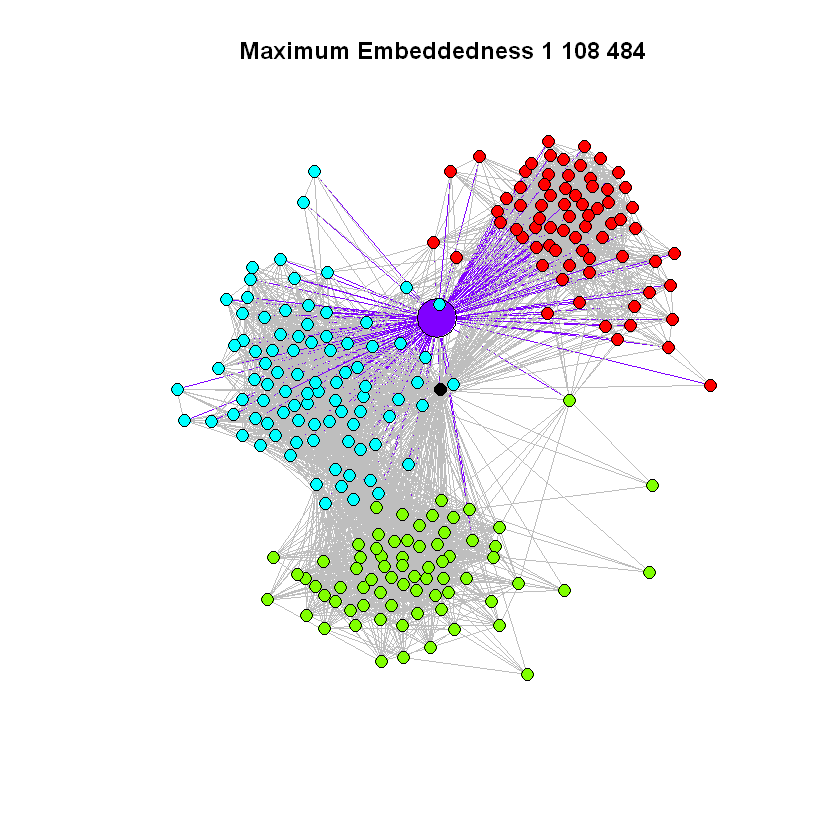

[1] "Max Ratio Node wrt Personalized Graph: 1"
[1] "Max Ratio Node wrt Facebook Graph: 108"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 1045"


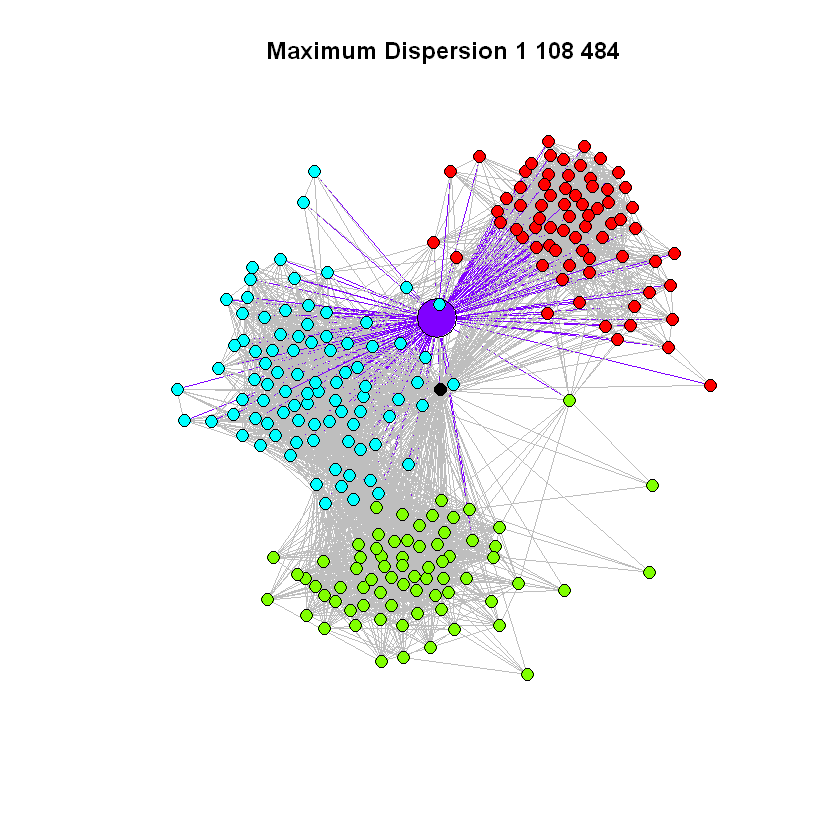

[1] "Core Node: 1087"
[1] "Max Embeddedness: 204"
[1] "Max Dispersion: 34412"
[1] "Max Ratio: 168.686274509804"
[1] "Min Embeddedness: 2"
[1] "Min Dispersion: 1"


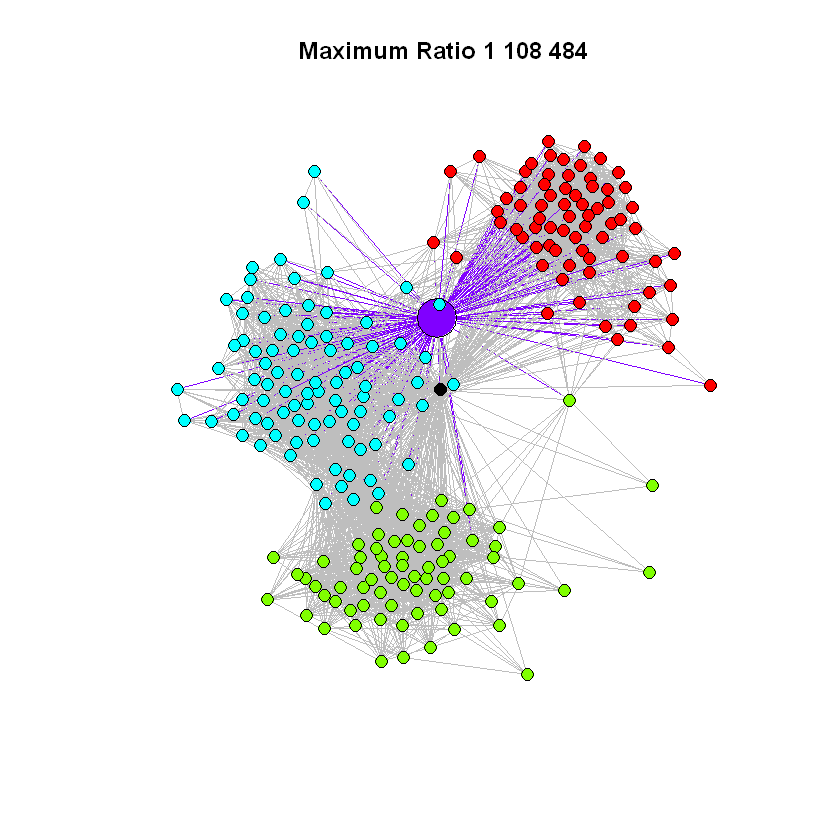

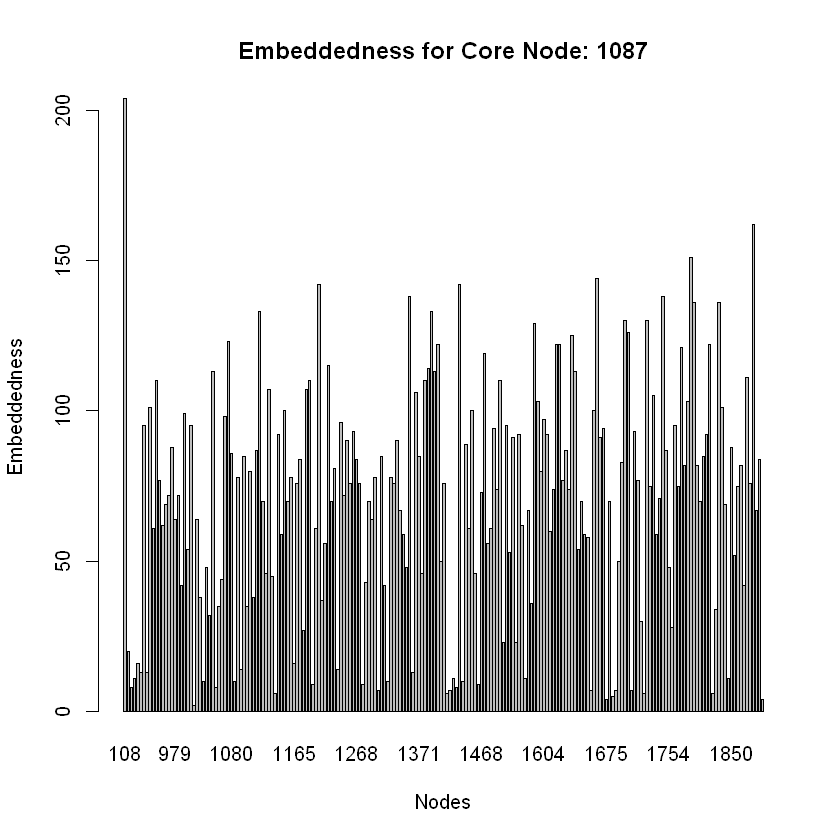

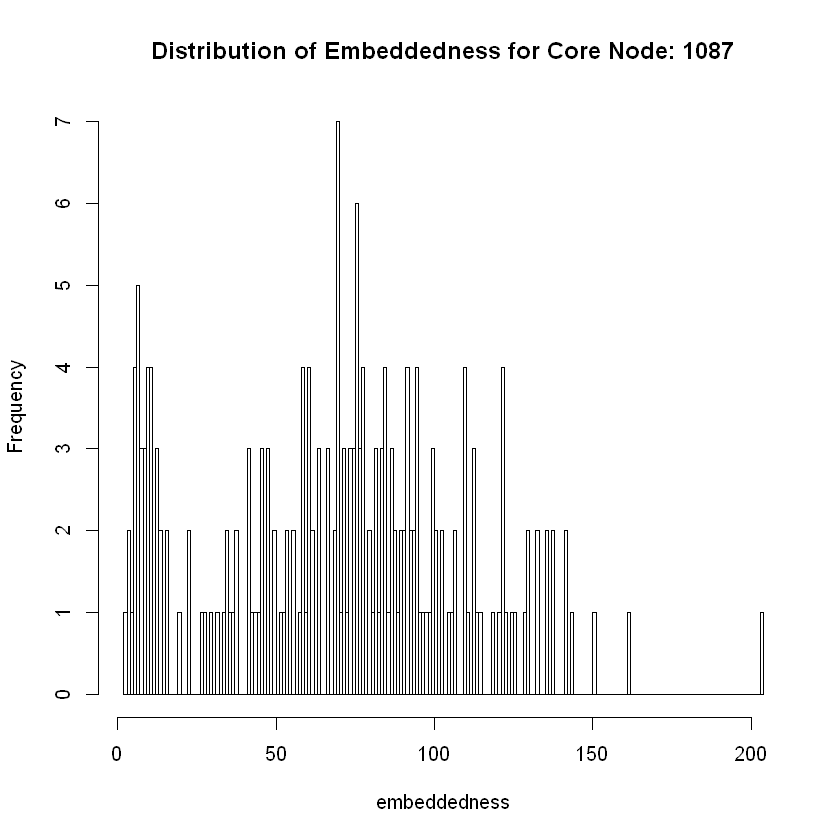

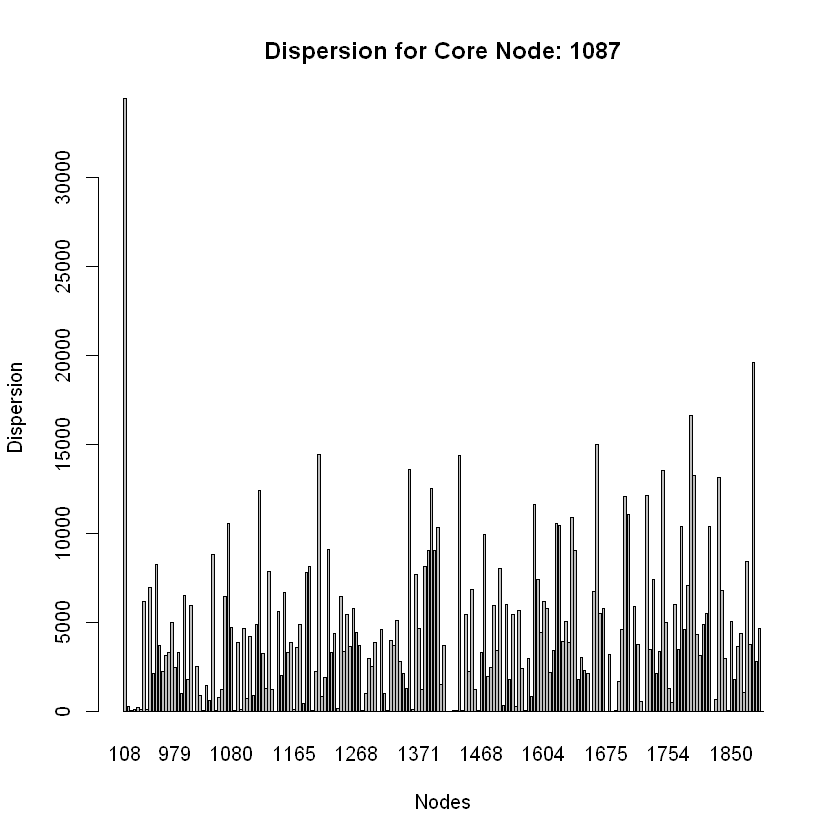

[1] "Fast Greedy for Core Node:  1087"
Community sizes
  1   2 
 81 125 
[1] "Modularity:"
[1] 0.1455315
[1] "Max Embeddedness Node wrt Personalized Graph: 1"
[1] "Max Embeddedness Node wrt Facebook Graph: 108"
[1] "Degree of Max Embeddedness Node: 1045"


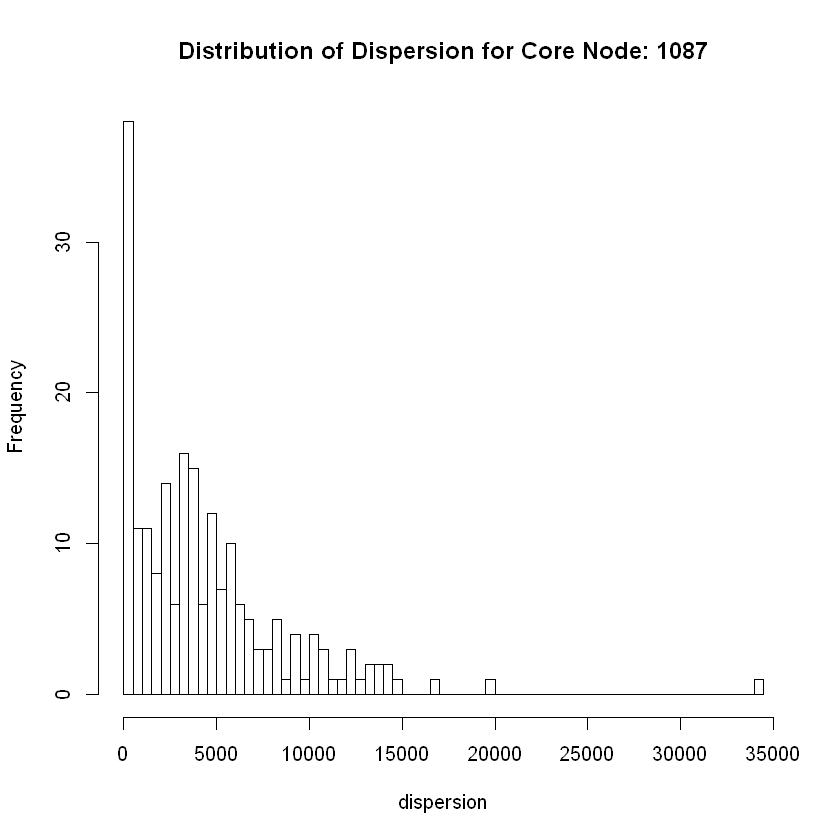

[1] "Max Dispersion Node wrt Personalized Graph: 1"
[1] "Max Dispersion Node wrt Facebook Graph: 108"
[1] "Degree of Max Dispersion Node: 1045"


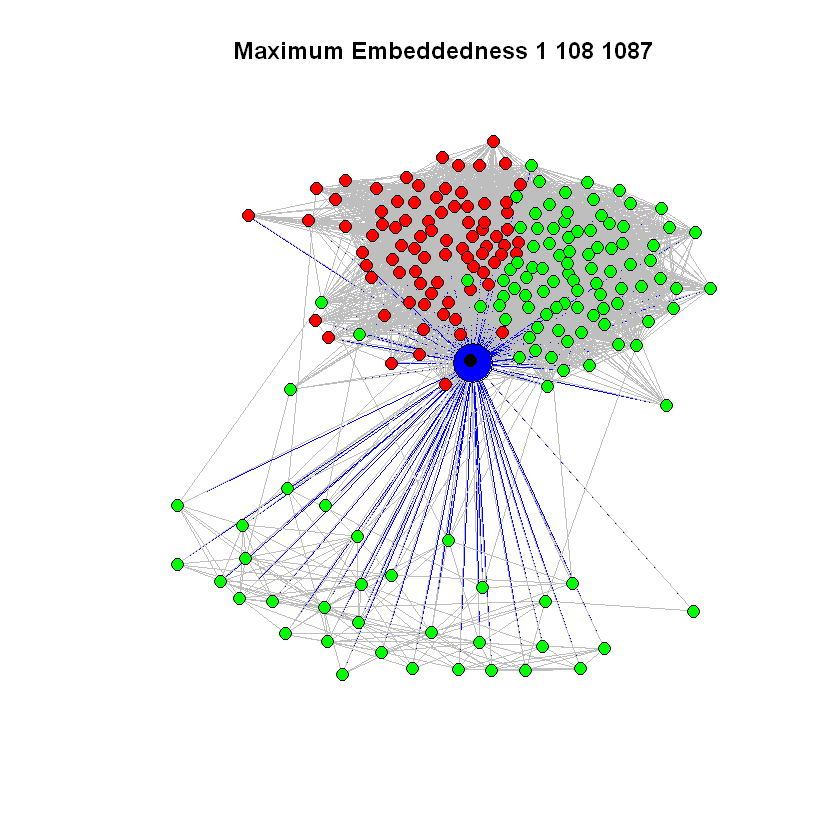

[1] "Max Ratio Node wrt Personalized Graph: 1"
[1] "Max Ratio Node wrt Facebook Graph: 108"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 1045"


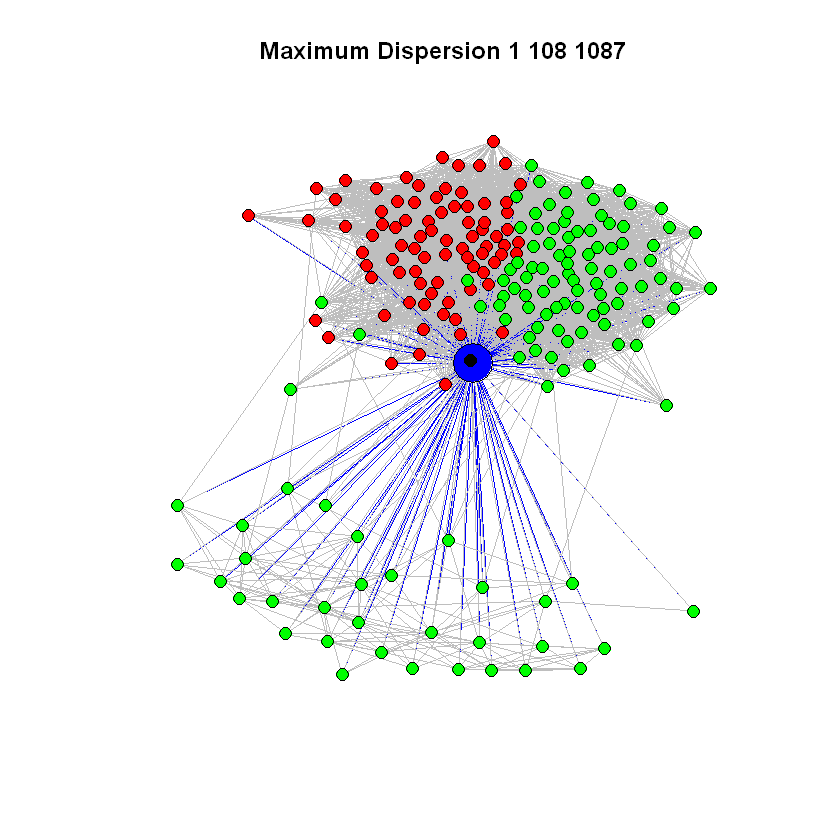

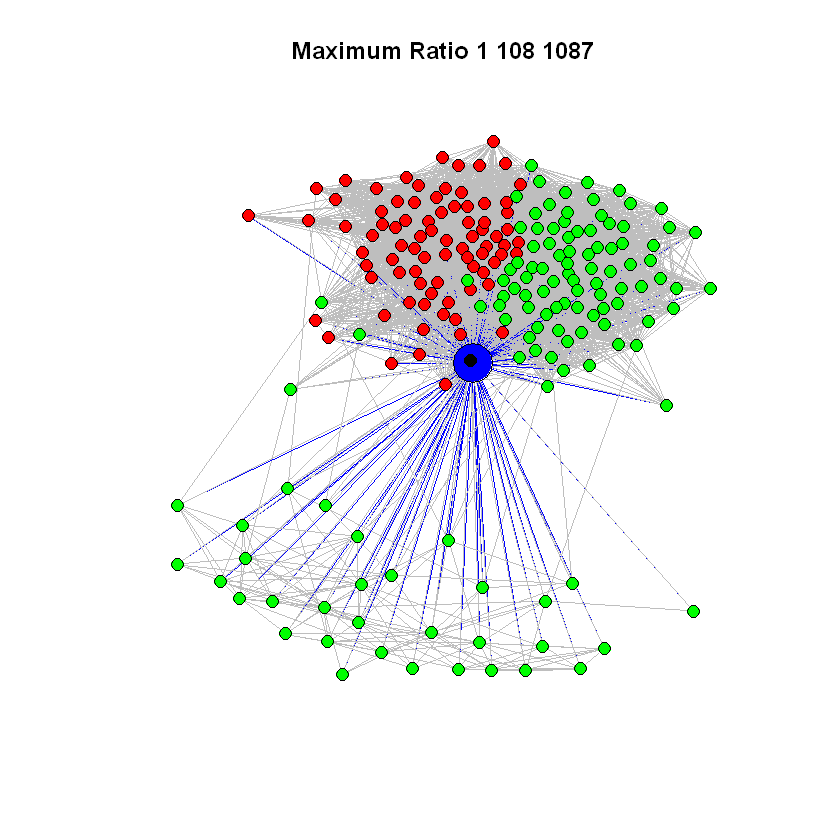

In [44]:
#alternate 12, 13, 14
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1)
for(coreNode in coreNodeList){
    
    coreNodeNeighbors = fbAdList[[coreNode]]
    coreNodeNeighbors = as.list(coreNodeNeighbors)
    
    embeddedness = c()
    dispersion = c()
    maxEmbeddedness = -1
    maxDispersion = -1
    maxRatio = -1
    maxEmbeddednessNode = -1
    maxDispersionNode = -1
    maxRatioNode = -1
    
#     print(coreNodeNeighbors)
    for(neighbor in coreNodeNeighbors){
        eVal = 0
        neighborAdList = fbAdList[[neighbor]]
        neighborAdList = as.list(neighborAdList)
        
#         print(coreNodeNeighbors)
#         print(neighborAdList)
        mutualFriends = intersect(coreNodeNeighbors, neighborAdList)
        #print(mutualFriends)
        mutualFriends = unlist(mutualFriends)
        #print(mutualFriends)
        
        #embeddedness
        eVal = length(mutualFriends)
        embeddedness = c(embeddedness, eVal)
        
        if (eVal > maxEmbeddedness){
            maxEmbeddedness = eVal
            maxEmbeddednessNode = neighbor
#             print(mutualFriends)
#             print(len(coreNodeN))
            #print(paste(neighbor, eVal))
        }
        
        distance = 0
        if(eVal == 0){
            dispersion = c(dispersion, 0)
        }
        else{
            sortedFriends = sort(mutualFriends)
            numSortedFriends = length(mutualFriends)
            for(i in 1:length(sortedFriends)){
                for(j in i:length(sortedFriends)){
                    dist = distMatrix[sortedFriends[i], sortedFriends[j]]
#                     print(i)
#                     print(j)
#                     print(dist)
                    if (is.finite(dist)){
                        distance = distance + dist
                    }else{
                        distance = distance + numSortedFriends + 100
                    }
            }
        }
        
            dispersion = c(dispersion, distance)
        }
        #dispersion
        #print(ul)
        
        
        if(distance > maxDispersion){
            maxDispersion = distance
            maxDispersionNode = neighbor
        }
        
        if(eVal == 0){
            ratio = 0
        }else{
            ratio = distance / eVal
        }
        
        
        if(ratio > maxRatio){
            maxRatio = ratio
            maxRatioNode = neighbor
        }
        
    }
    
    print(paste("Core Node:", coreNode))
    print(paste("Max Embeddedness:", maxEmbeddedness))
    print(paste("Max Dispersion:", maxDispersion))
    print(paste("Max Ratio:", maxRatio))
    print(paste("Min Embeddedness:", min(embeddedness)))
    print(paste("Min Dispersion:", min(dispersion)))
    
    
    barplot(embeddedness, main = paste("Embeddedness for Core Node:", coreNode), ylab = "Embeddedness", xlab = "Nodes", names.arg = coreNodeNeighbors)
    hist(embeddedness, breaks = max(embeddedness) - min(embeddedness), main = paste("Distribution of Embeddedness for Core Node:", coreNode))
    barplot(dispersion, main = paste("Dispersion for Core Node:", coreNode), ylab = "Dispersion", xlab = "Nodes", names.arg = coreNodeNeighbors)
    hist(dispersion, breaks = 100, main = paste("Distribution of Dispersion for Core Node:", coreNode))
    
    #print(typeof(coreNodeNeighbors))
    vertices = c(coreNodeNeighbors, coreNode)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    fgComm = fastgreedy.community(personalizedGraph)
    
    print(paste("Fast Greedy for Core Node: ", coreNode))
    print(sizes(fgComm))
    print("Modularity:")
    print(modularity(fgComm))
    
    colors = rainbow(max(membership(fgComm))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    coreNodeIndex = findIndex(personalizedGraph, coreNode)
    E(personalizedGraph)$color = 'grey'
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    #max embeddedness
    
    emNode = findIndex(personalizedGraph, maxEmbeddednessNode)
    print(paste("Max Embeddedness Node wrt Personalized Graph:", emNode))
    print(paste("Max Embeddedness Node wrt Facebook Graph:", maxEmbeddednessNode))
    print(paste("Degree of Max Embeddedness Node:", length(fbAdList[[maxEmbeddednessNode]])))
    V(personalizedGraph)[emNode]$color = colors[length(colors)] 
    V(personalizedGraph)[emNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)[inc(emNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Embeddedness", emNode, maxEmbeddednessNode, coreNode))
    
    #max dispersion
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    disNode = findIndex(personalizedGraph, maxDispersionNode)
    print(paste("Max Dispersion Node wrt Personalized Graph:", disNode))
    print(paste("Max Dispersion Node wrt Facebook Graph:", maxDispersionNode))
    print(paste("Degree of Max Dispersion Node:", length(fbAdList[[maxDispersionNode]])))
    V(personalizedGraph)[disNode]$color = colors[length(colors)] 
    V(personalizedGraph)[disNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(disNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Dispersion", disNode, maxDispersionNode, coreNode))
    
    #max ratio
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    ratioNode = findIndex(personalizedGraph, maxRatioNode)
    print(paste("Max Ratio Node wrt Personalized Graph:", ratioNode))
    print(paste("Max Ratio Node wrt Facebook Graph:", maxRatioNode))
    print(paste("Degree of Max Ratio Node wrt Personalized Graph:", length(fbAdList[[maxRatioNode]])))
    V(personalizedGraph)[ratioNode]$color = colors[length(colors)] 
    V(personalizedGraph)[ratioNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(ratioNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Ratio", ratioNode, maxRatioNode, coreNode))
    
}

[1] "Core Node: 1"
[1] "Max Embeddedness: 77"
[1] "Max Dispersion: 4882"
[1] "Max Ratio: 63.4025974025974"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


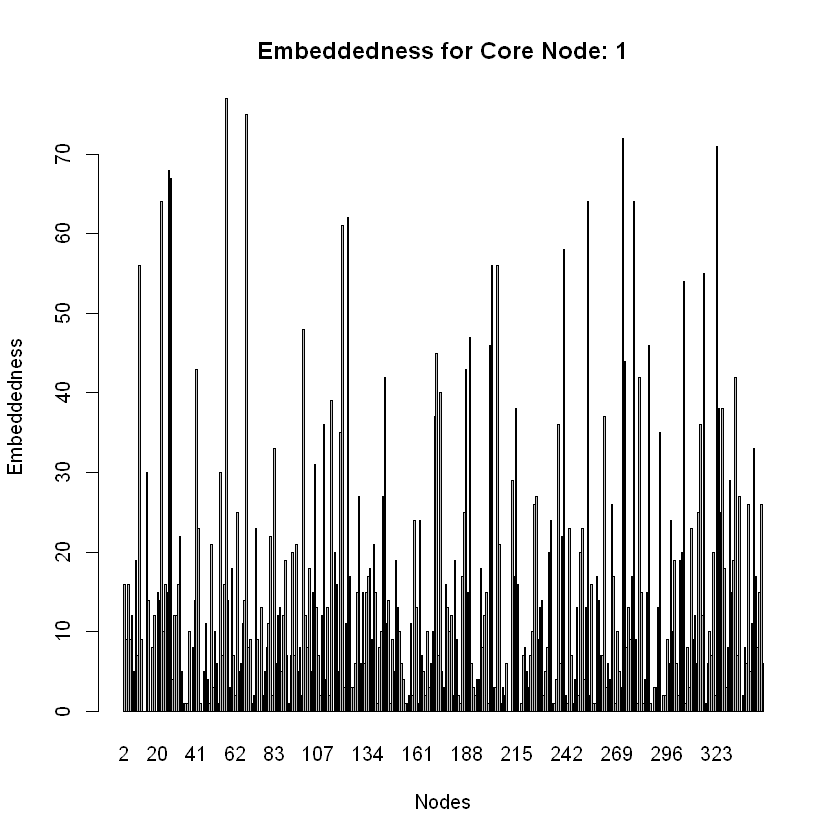

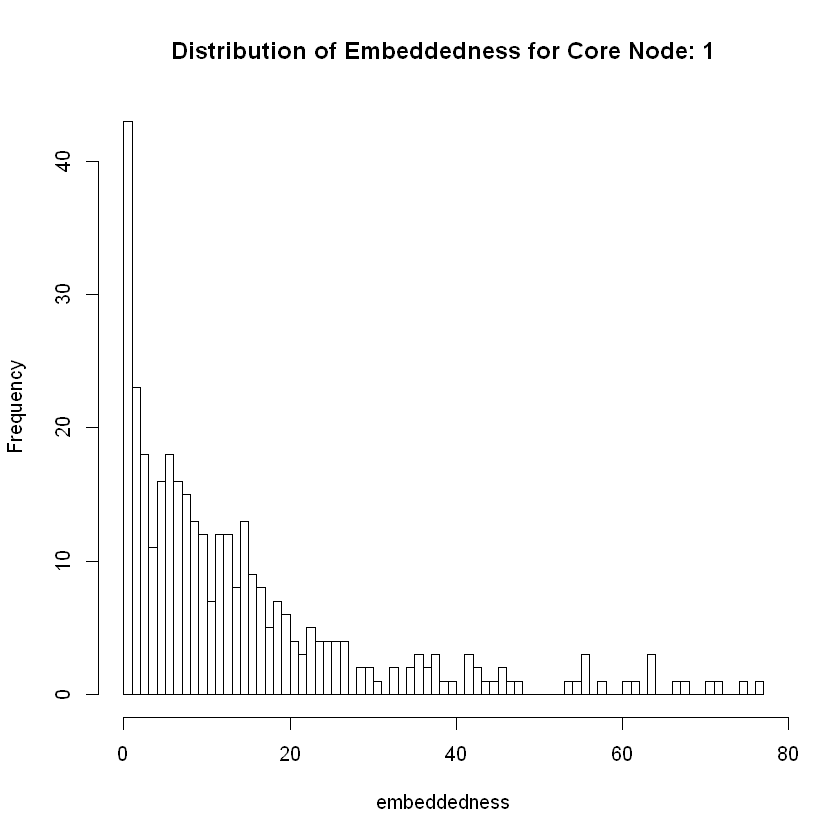

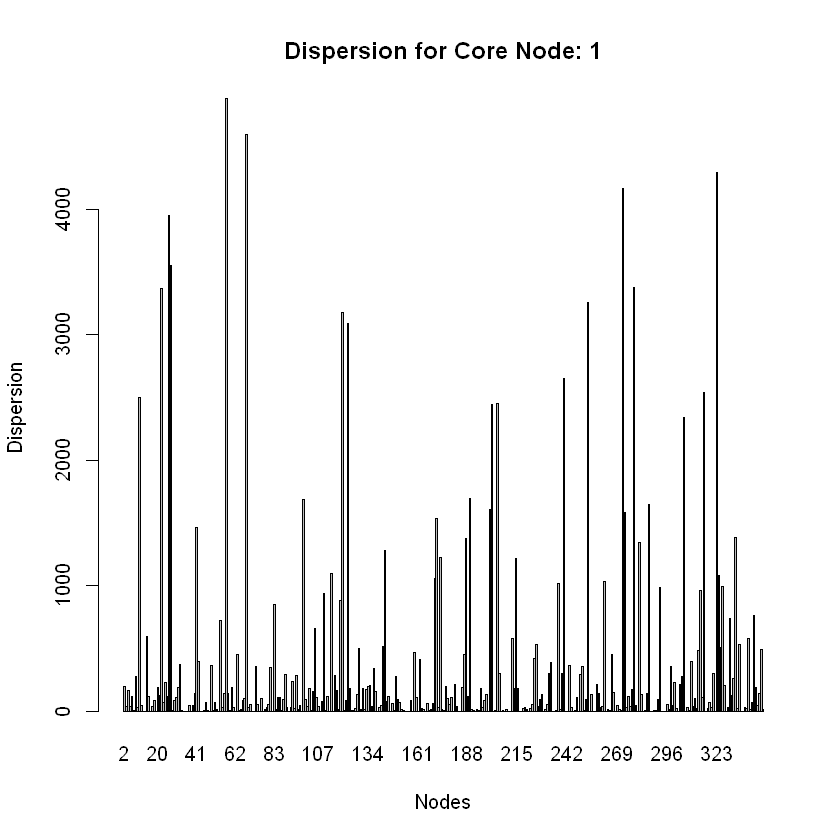

[1] "Fast Greedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 
[1] "Modularity:"
[1] 0.4131014
  [1]   4  10  11  14  17  22  26  27  30  40  41  46  51  56  57  60  61  63
 [19]  64  66  67  68  70  73  76  77  80  83  86  97  99 104 105 106 110 114
 [37] 119 122 123 124 129 133 134 135 142 143 149 157 159 162 166 170 171 173
 [55] 177 186 187 189 200 201 204 208 212 213 222 223 224 225 232 233 237 239
 [73] 240 249 251 253 258 259 262 266 269 271 272 273 275 277 278 281 286 289
 [91] 291 292 296 298 299 304 305 312 314 315 316 319 323 324 326 332 333 335
[109] 342 343 345 346
[1] "Max Embeddedness Node wrt Personalized Graph: 57"
[1] "Max Embeddedness Node wrt Facebook Graph: 57"
[1] "Degree of Max Embeddedness Node: 78"


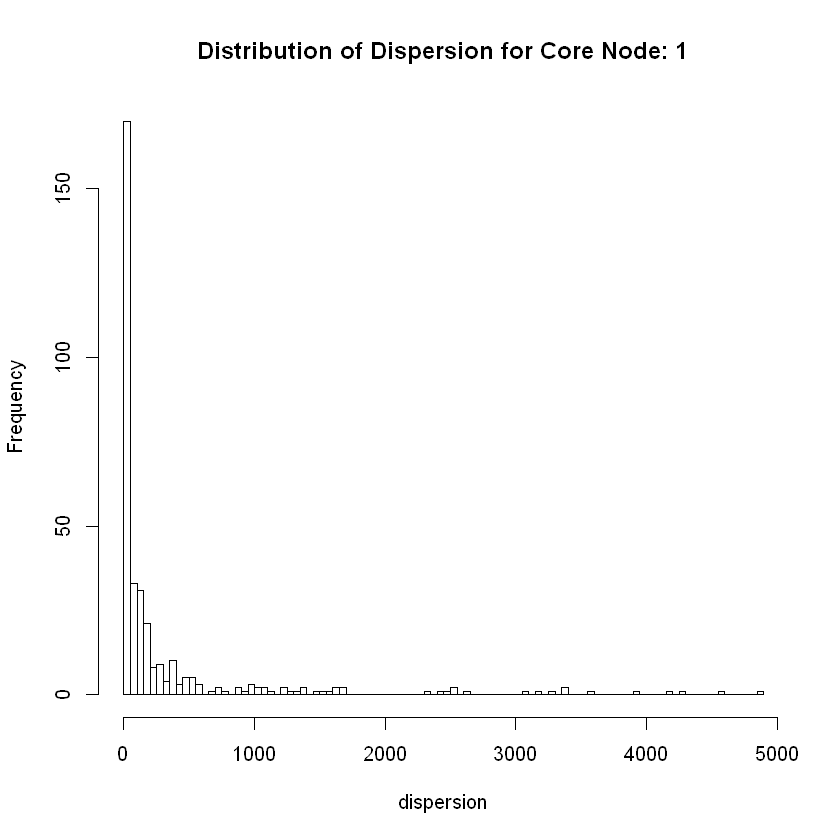

[1] "Max Dispersion Node wrt Personalized Graph: 57"
[1] "Max Dispersion Node wrt Facebook Graph: 57"
[1] "Degree of Max Dispersion Node: 78"


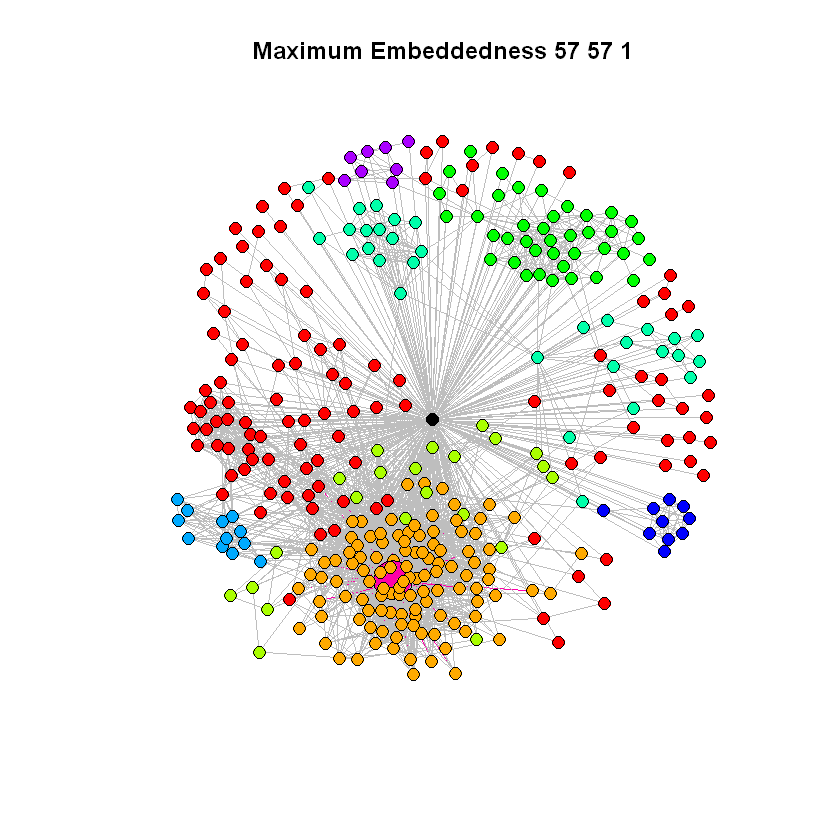

[1] "Max Ratio Node wrt Personalized Graph: 57"
[1] "Max Ratio Node wrt Facebook Graph: 57"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 78"


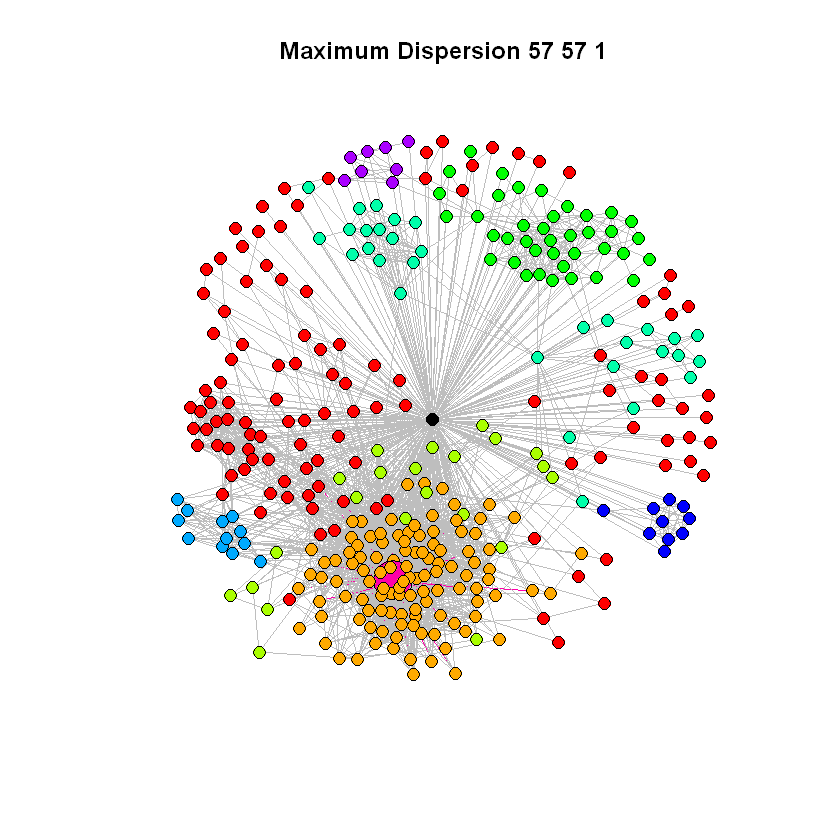

[1] "Core Node: 108"
[1] "Max Embeddedness: 253"
[1] "Max Dispersion: 51167"
[1] "Max Ratio: 202.241106719368"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


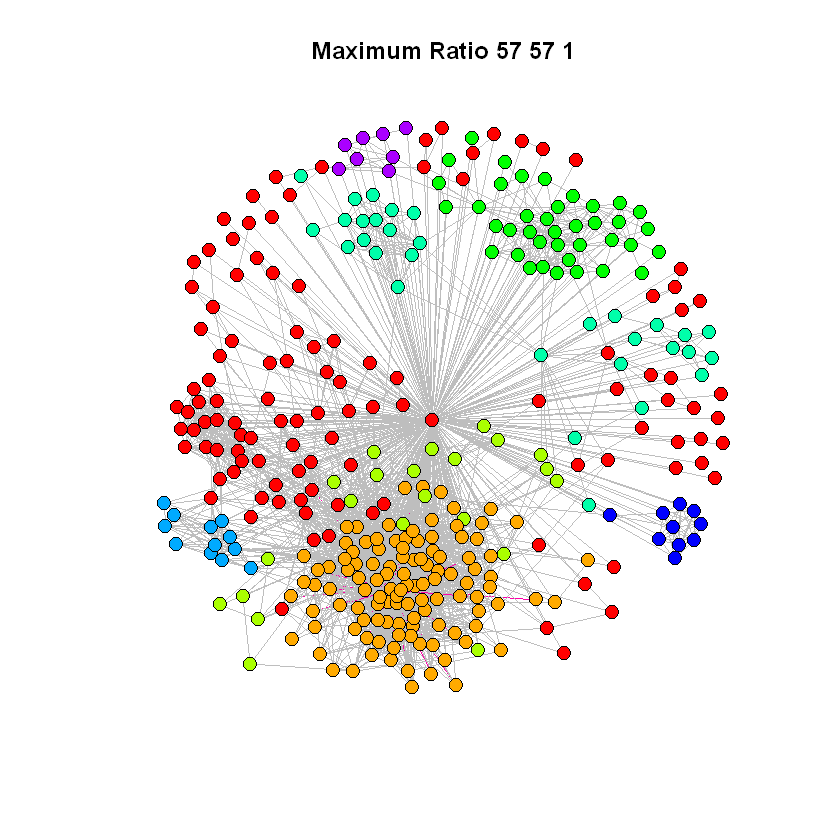

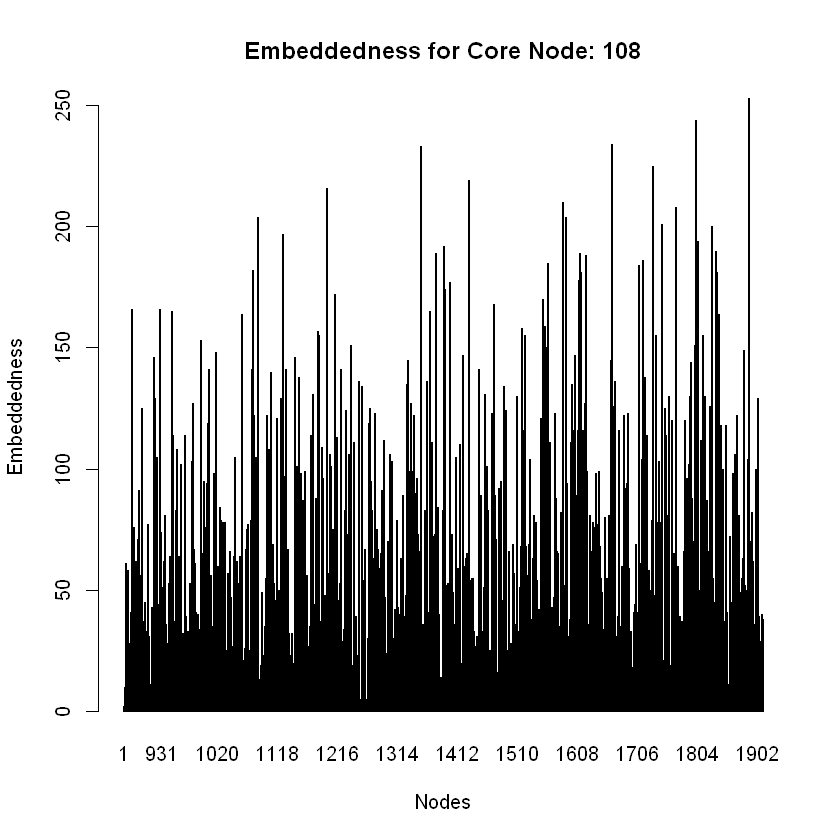

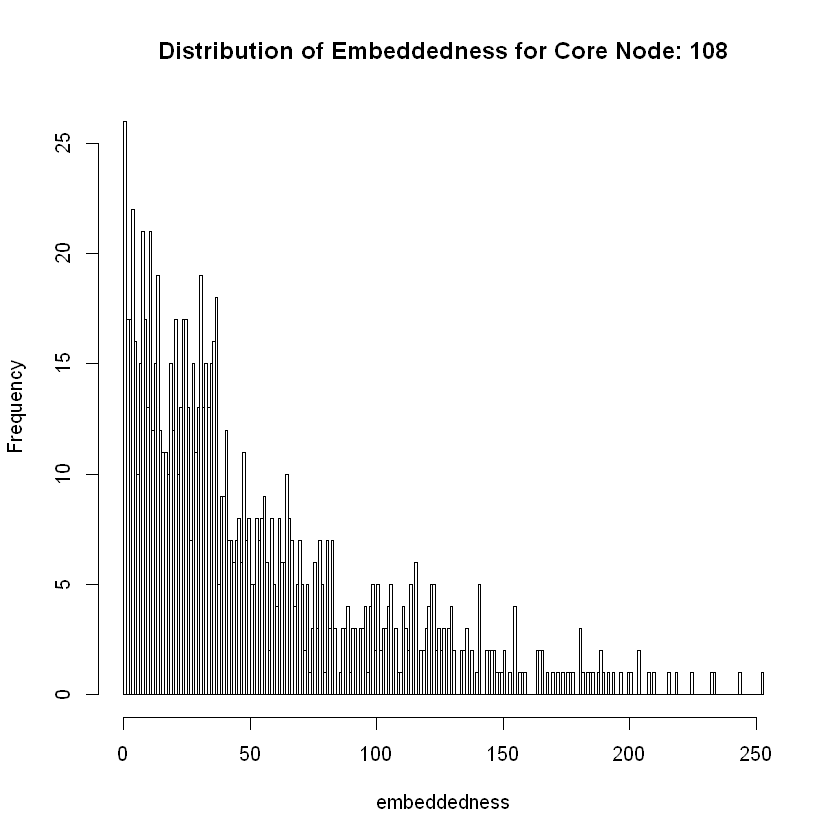

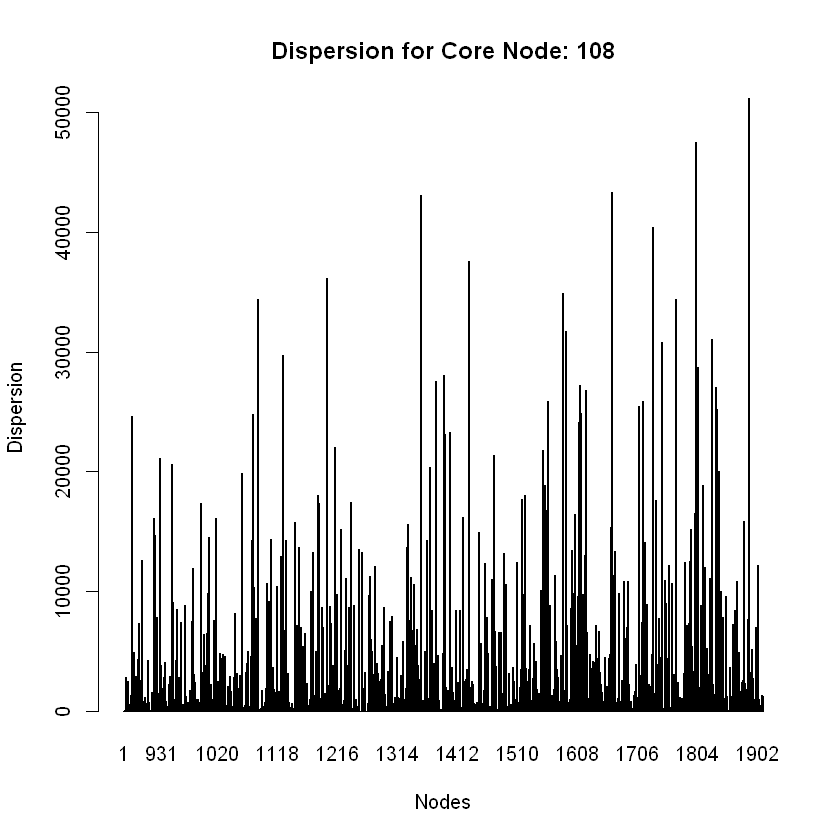

[1] "Fast Greedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 
[1] "Modularity:"
[1] 0.4359294
  [1]    1    2    3    4   32   35   39   41   42   43   46   51   53   55   56
 [16]   57   58   60   61   62   63   64   67   69   81   82   85   86   87   88
 [31]   94   95   96  101  102  105  107  108  113  115  117  118  125  126  128
 [46]  130  131  132  133  134  138  139  141  143  152  158  159  161  163  164
 [61]  166  168  169  173  174  175  182  183  184  189  191  193  194  196  198
 [76]  203  204  208  209  210  211  212  213  214  218  219  220  221  222  223
 [91]  226  227  231  233  236  242  245  247  251  252  254  258  259  260  261
[106]  263  265  267  270  271  275  279  280  281  284  285  286  288  291  292
[121]  295  296  298  299  300  306  307  308  309  310  313  315  316  317  319
[136]  320  322  326  328  330  331  333  334  336  338  340  341  342  344  346
[151]  349  354  355  357  359

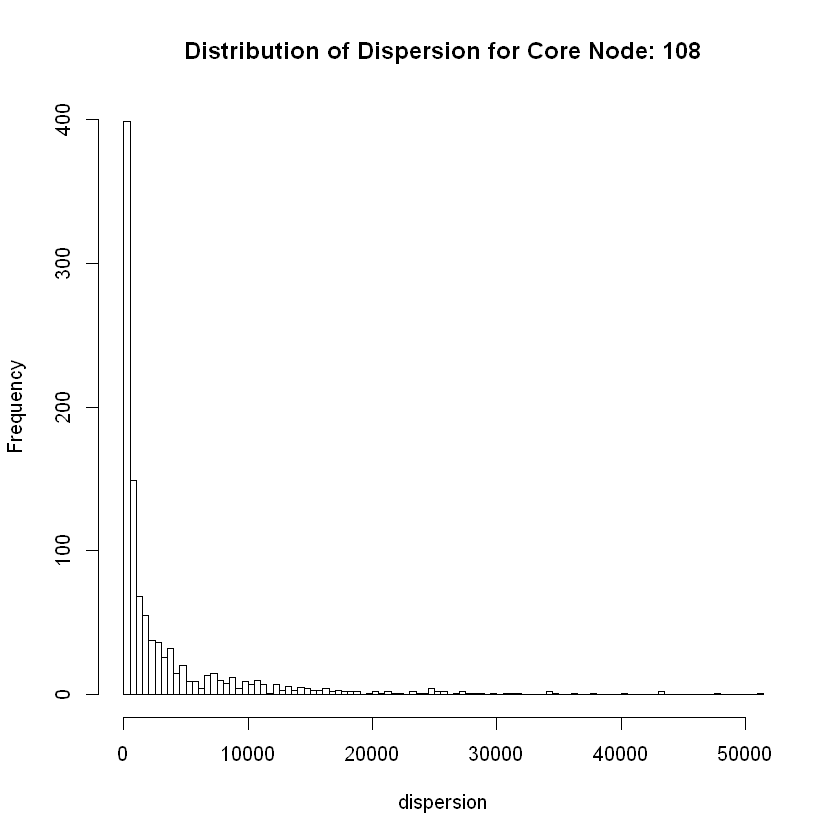

[1] "Max Dispersion Node wrt Personalized Graph: 1023"
[1] "Max Dispersion Node wrt Facebook Graph: 1889"
[1] "Degree of Max Dispersion Node: 254"


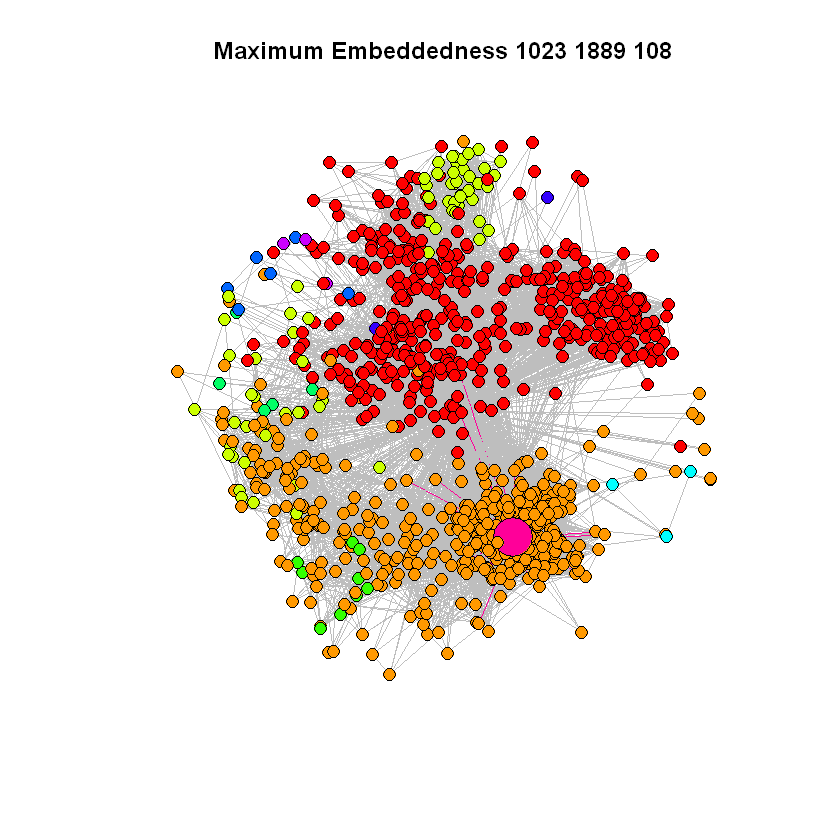

[1] "Max Ratio Node wrt Personalized Graph: 1023"
[1] "Max Ratio Node wrt Facebook Graph: 1889"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 254"


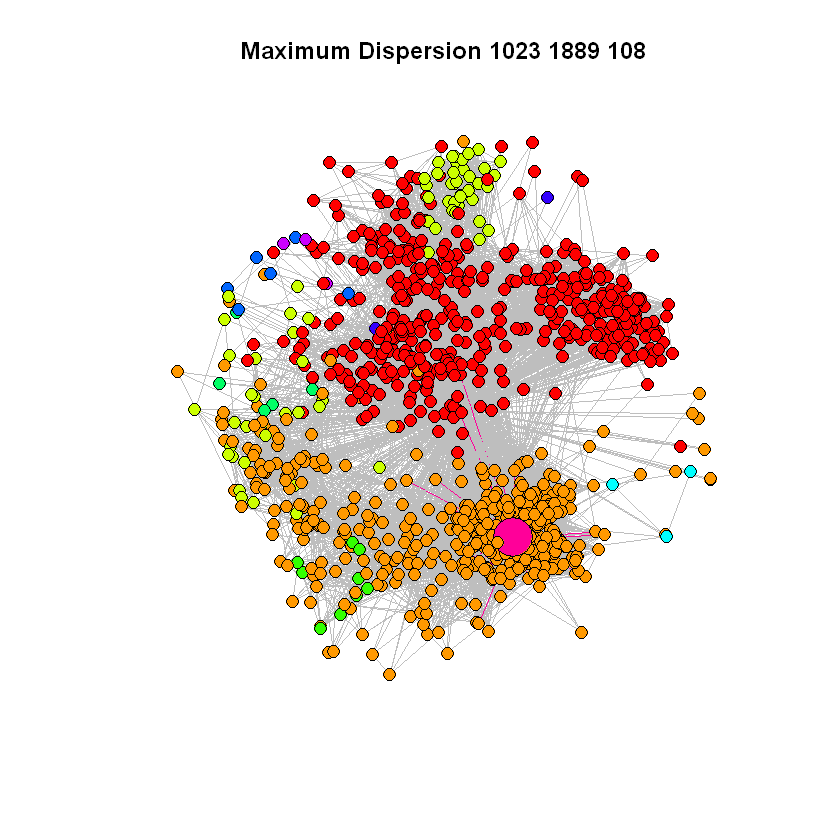

[1] "Core Node: 349"
[1] "Max Embeddedness: 100"
[1] "Max Dispersion: 8174"
[1] "Max Ratio: 81.74"
[1] "Min Embeddedness: 0"
[1] "Min Dispersion: 0"


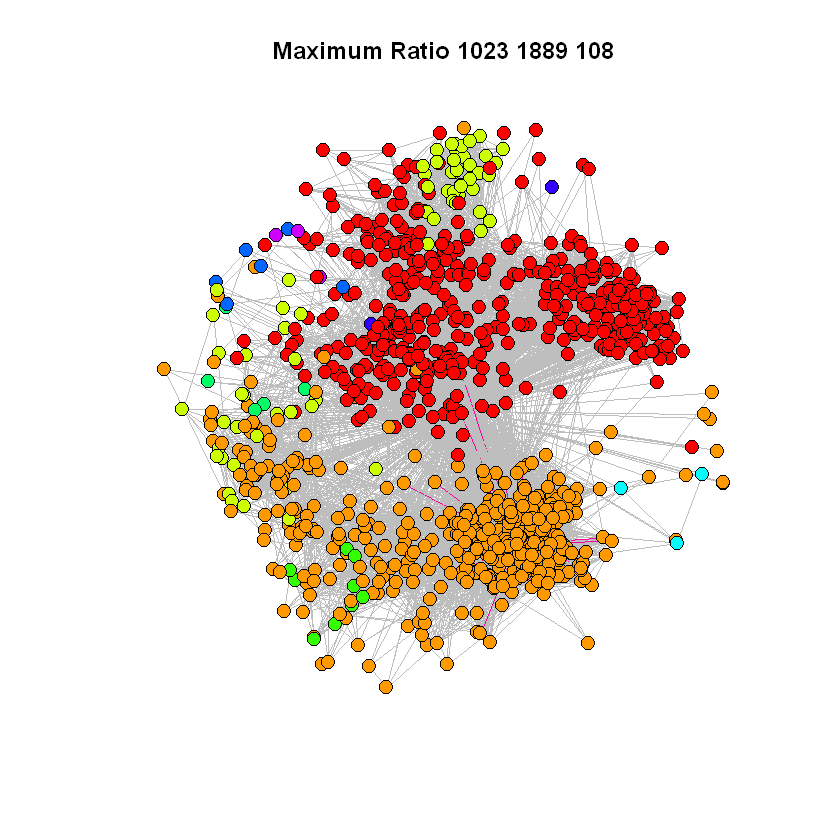

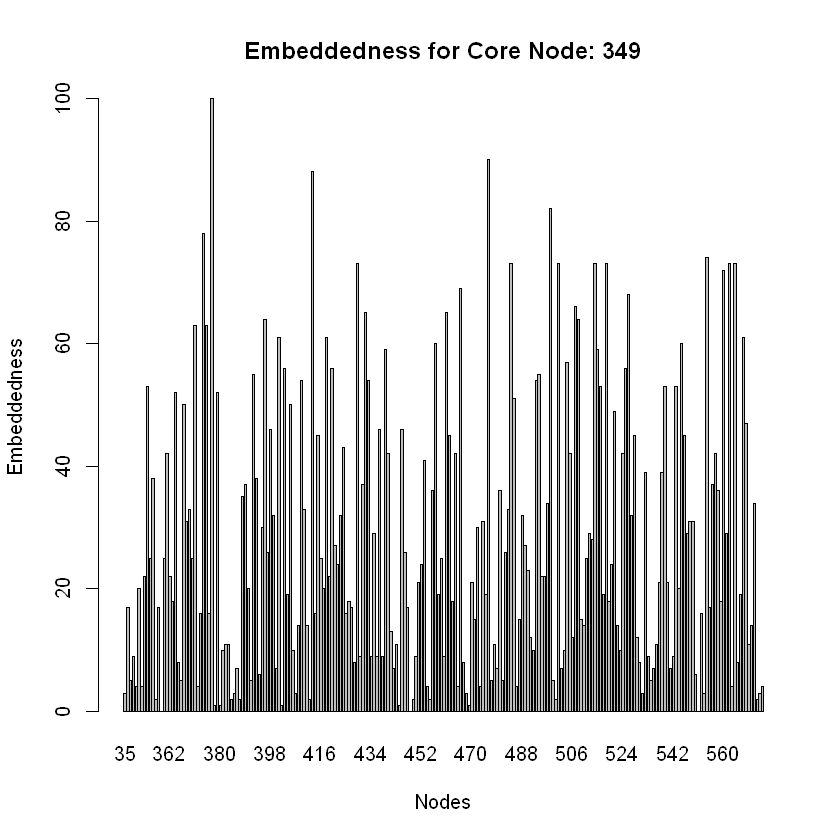

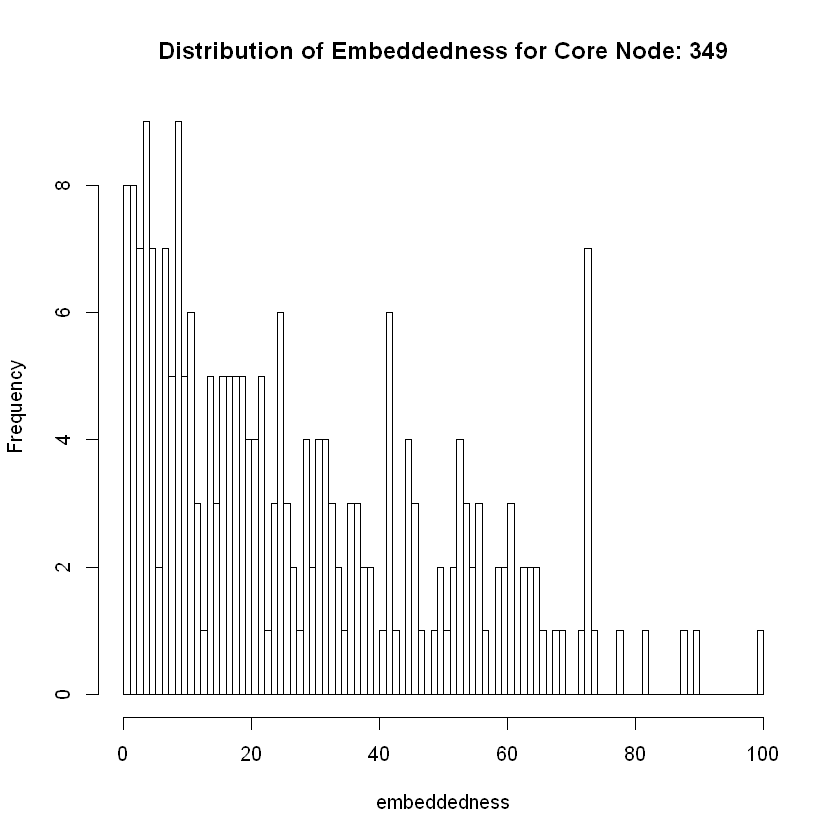

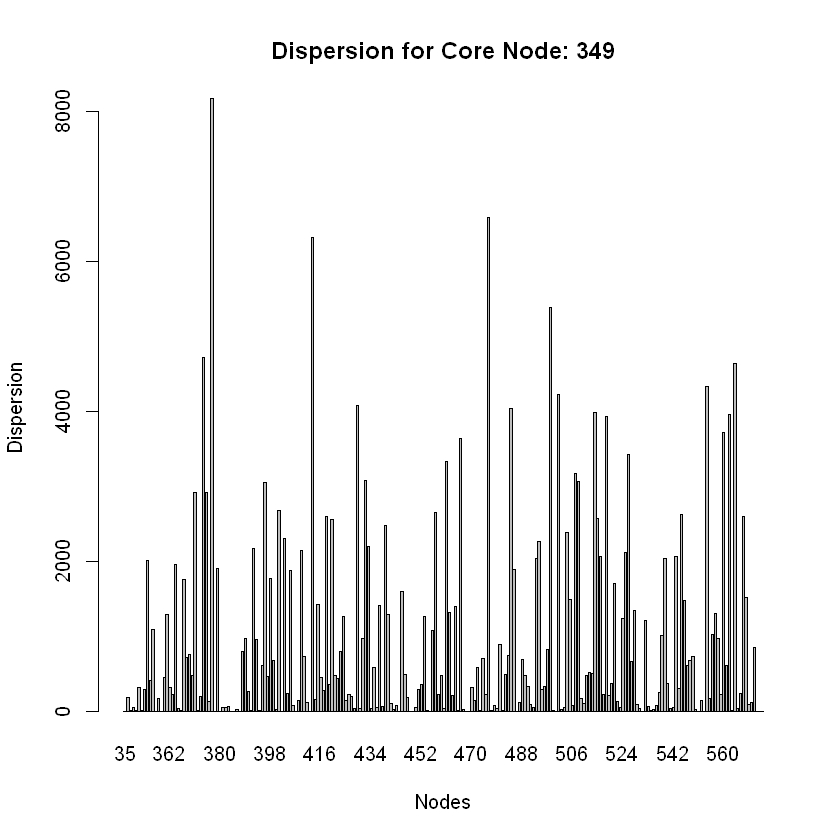

[1] "Fast Greedy for Core Node:  349"
Community sizes
  1   2   3   4   5 
107  11  98   4  10 
[1] "Modularity:"
[1] 0.2517149
 [1]  19  28  70  72 102 105 130 192 197 215 217
[1] "Max Embeddedness Node wrt Personalized Graph: 33"
[1] "Max Embeddedness Node wrt Facebook Graph: 377"
[1] "Degree of Max Embeddedness Node: 133"


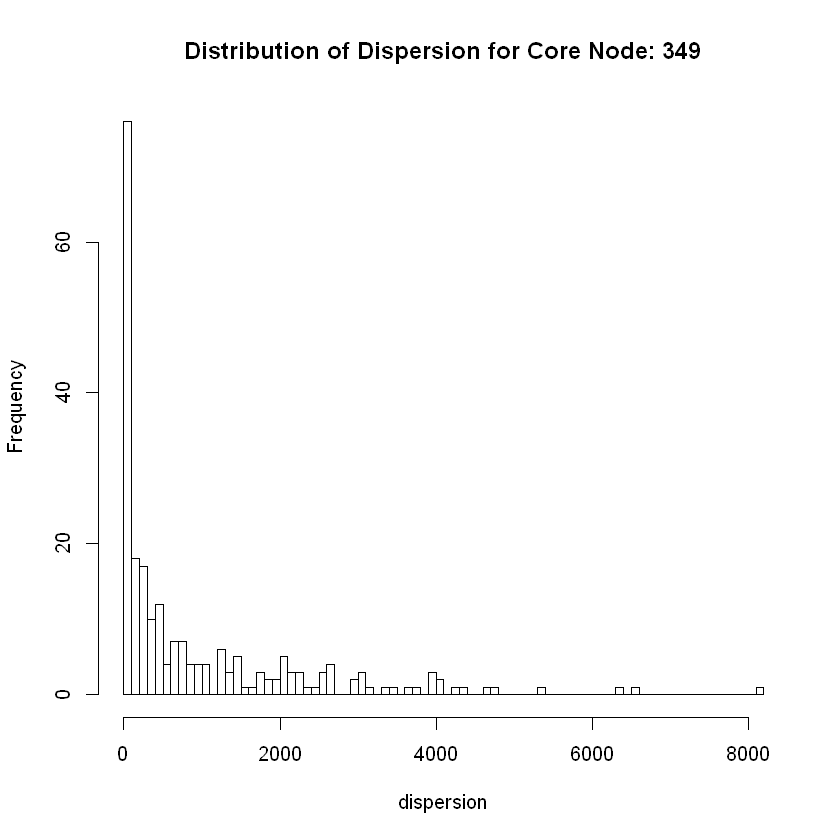

[1] "Max Dispersion Node wrt Personalized Graph: 33"
[1] "Max Dispersion Node wrt Facebook Graph: 377"
[1] "Degree of Max Dispersion Node: 133"


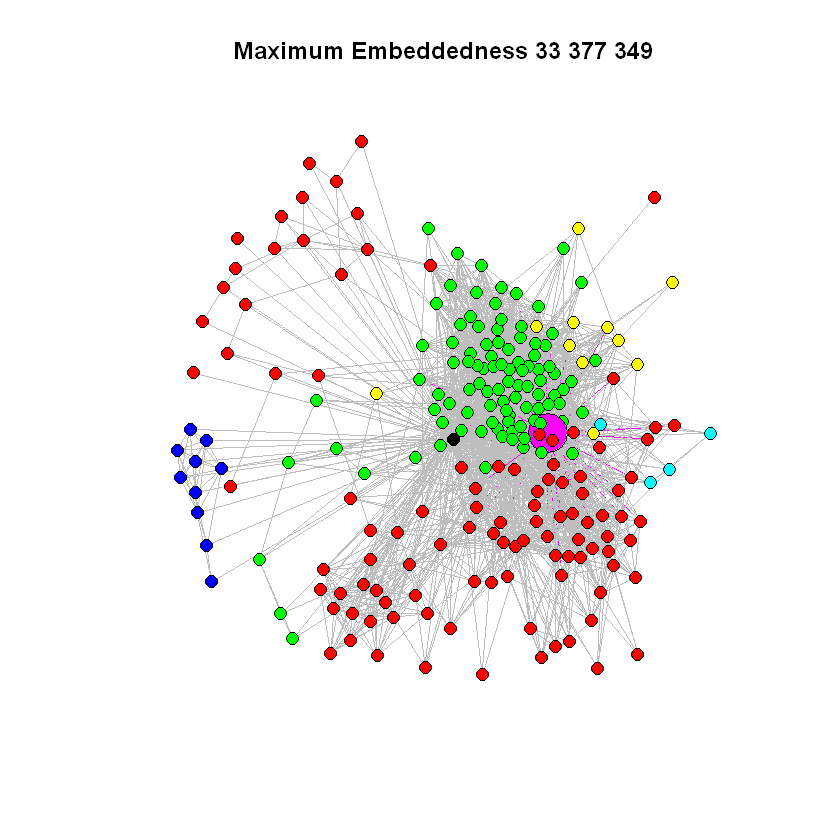

[1] "Max Ratio Node wrt Personalized Graph: 33"
[1] "Max Ratio Node wrt Facebook Graph: 377"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 133"


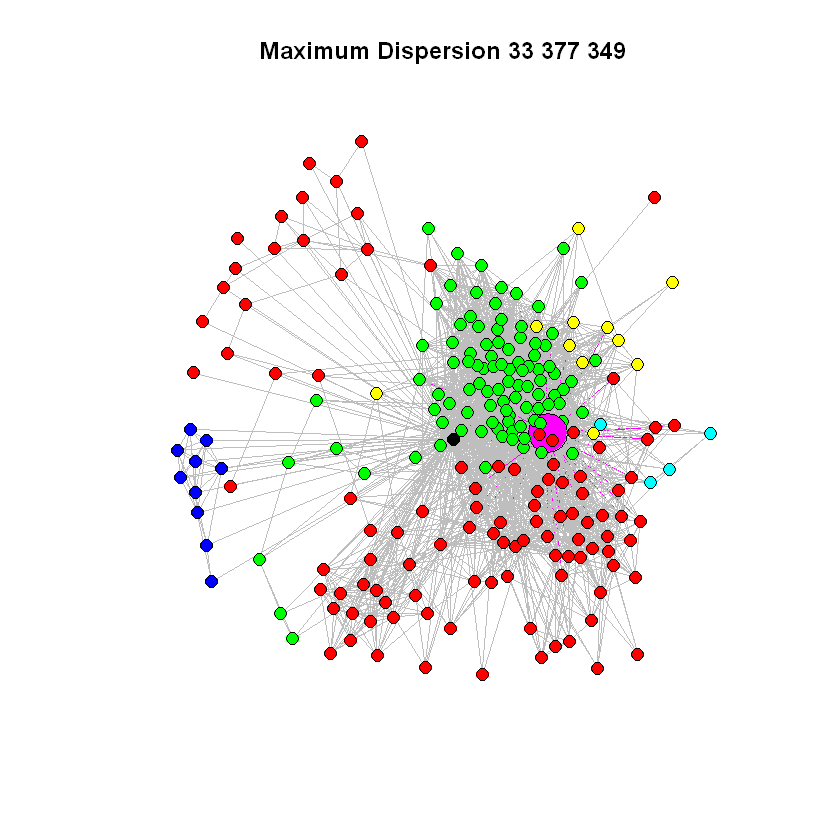

[1] "Core Node: 484"
[1] "Max Embeddedness: 166"
[1] "Max Dispersion: 24644"
[1] "Max Ratio: 148.457831325301"
[1] "Min Embeddedness: 3"
[1] "Min Dispersion: 3"


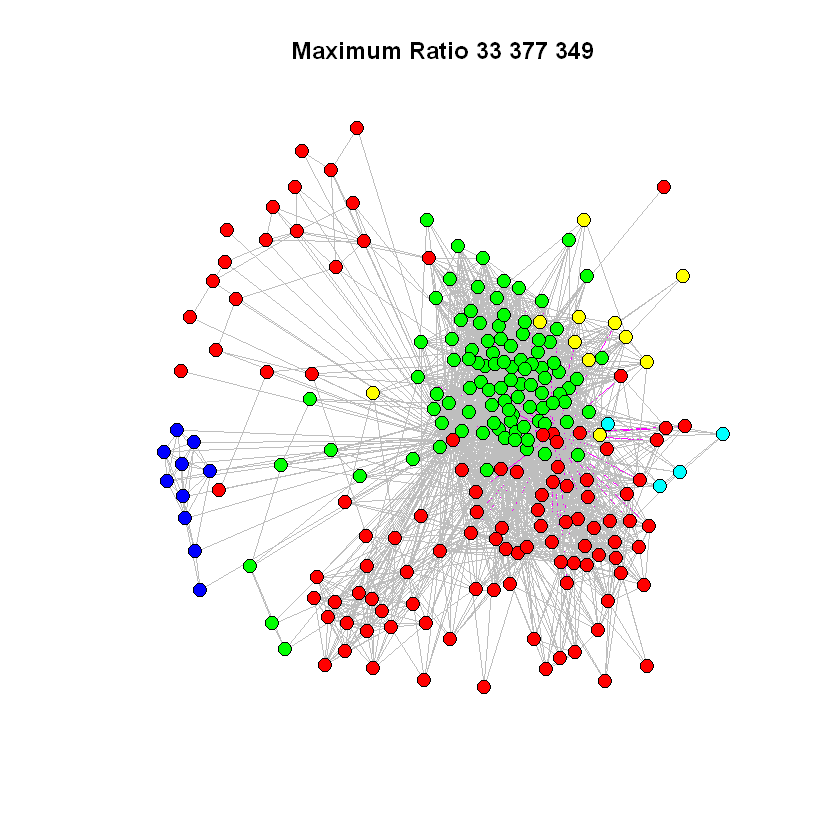

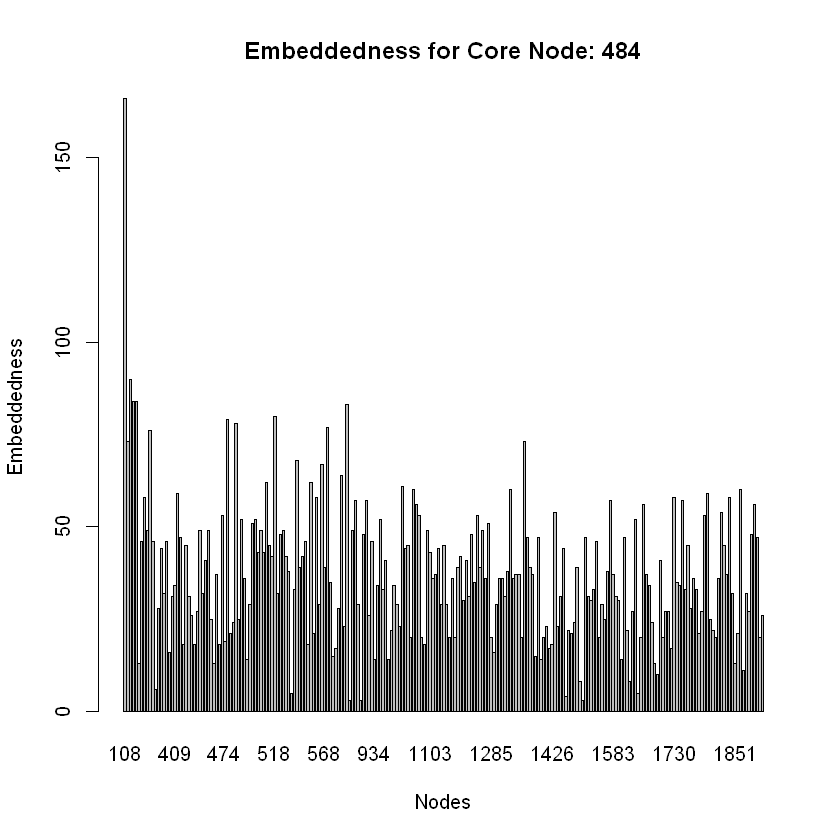

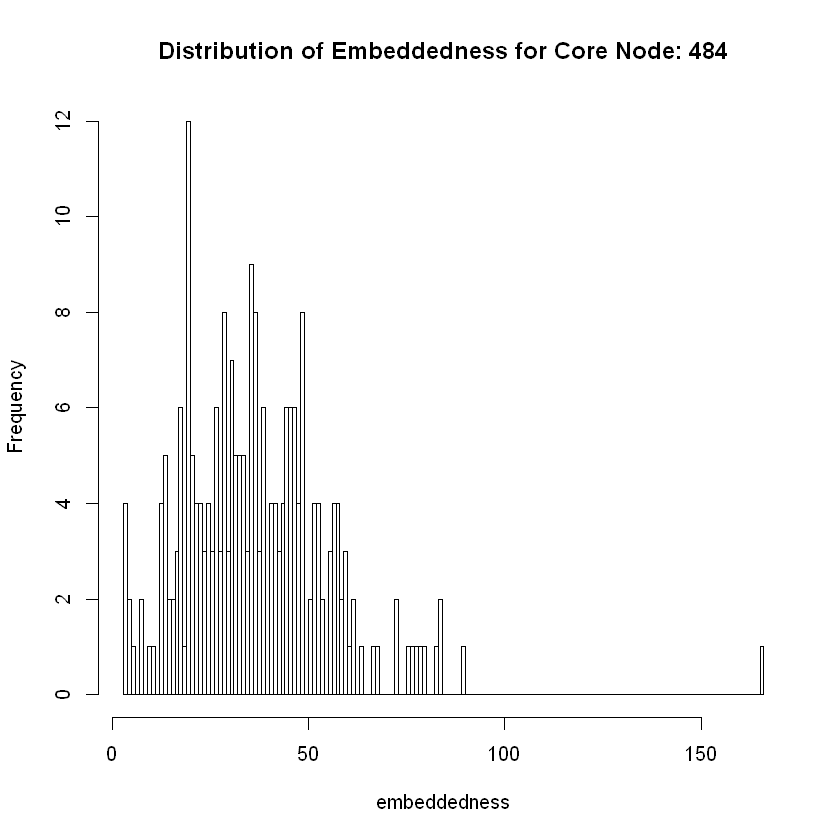

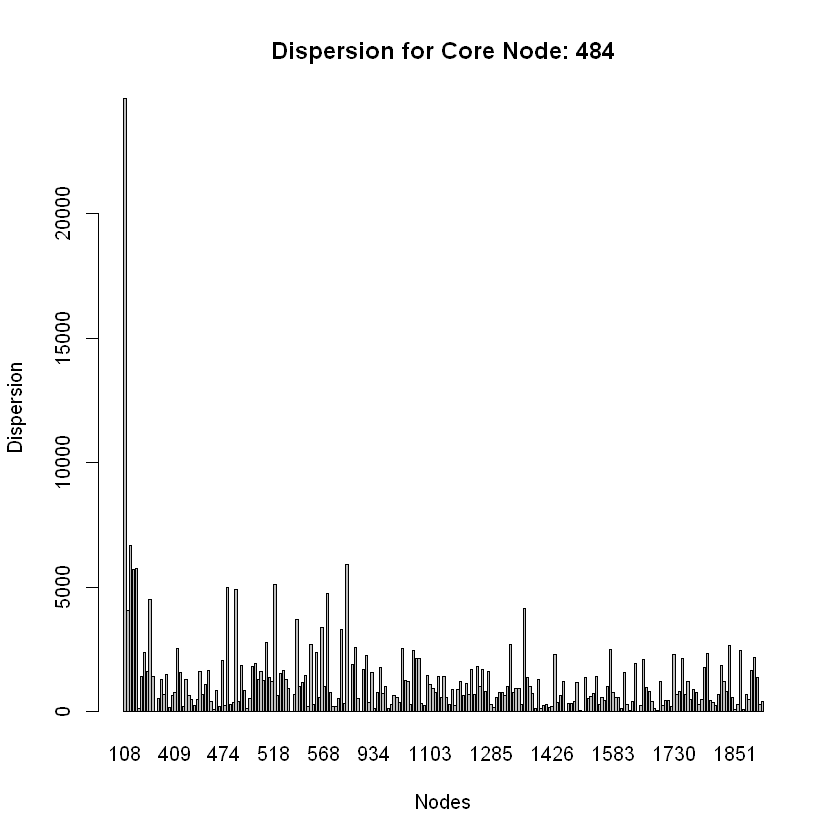

[1] "Fast Greedy for Core Node:  484"
Community sizes
 1  2  3 
71 72 89 
[1] "Modularity:"
[1] 0.5070016
 [1]  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
[26] 30 31 32 33 34 35 36 37 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55 57
[51] 58 59 61 62 63 65 66 67 68 69 70 71 72 73 74 76 77 79 81 83 86 87
[1] "Max Embeddedness Node wrt Personalized Graph: 1"
[1] "Max Embeddedness Node wrt Facebook Graph: 108"
[1] "Degree of Max Embeddedness Node: 1045"


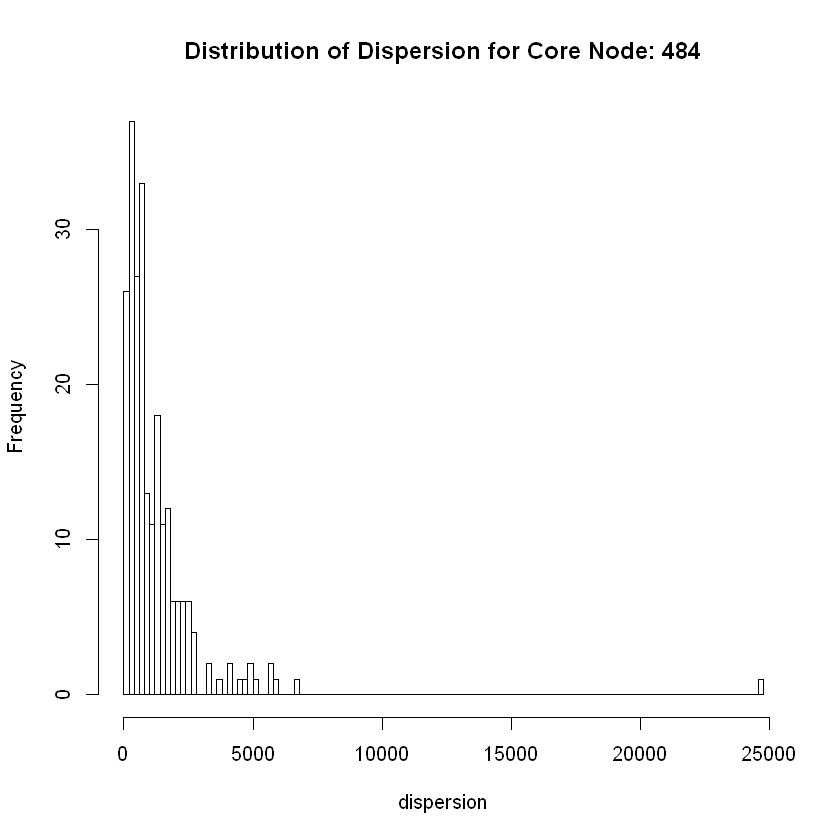

[1] "Max Dispersion Node wrt Personalized Graph: 1"
[1] "Max Dispersion Node wrt Facebook Graph: 108"
[1] "Degree of Max Dispersion Node: 1045"


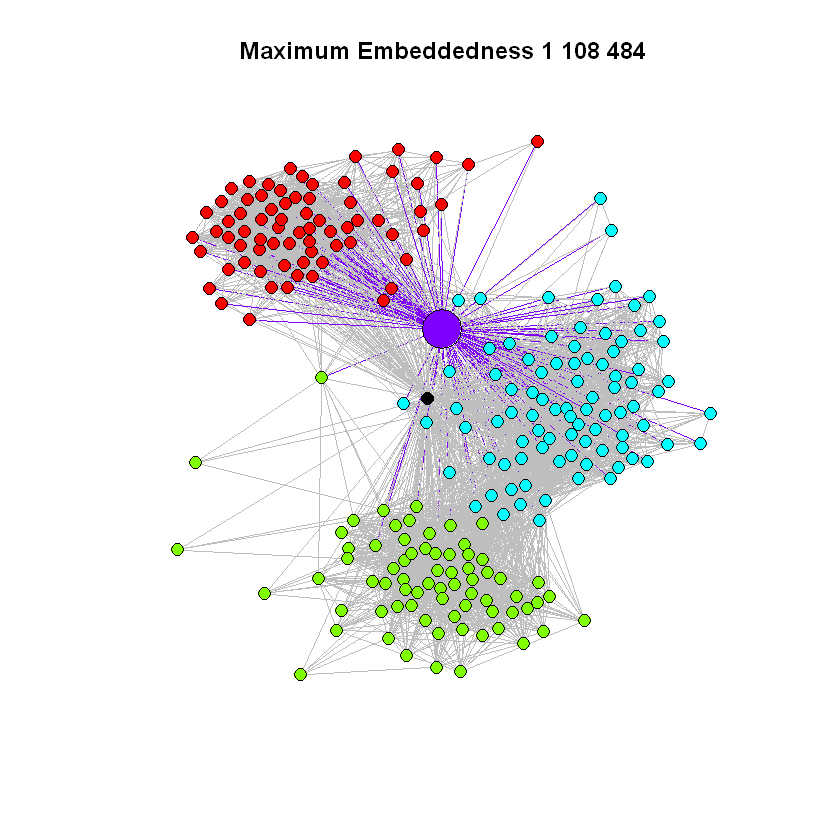

[1] "Max Ratio Node wrt Personalized Graph: 1"
[1] "Max Ratio Node wrt Facebook Graph: 108"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 1045"


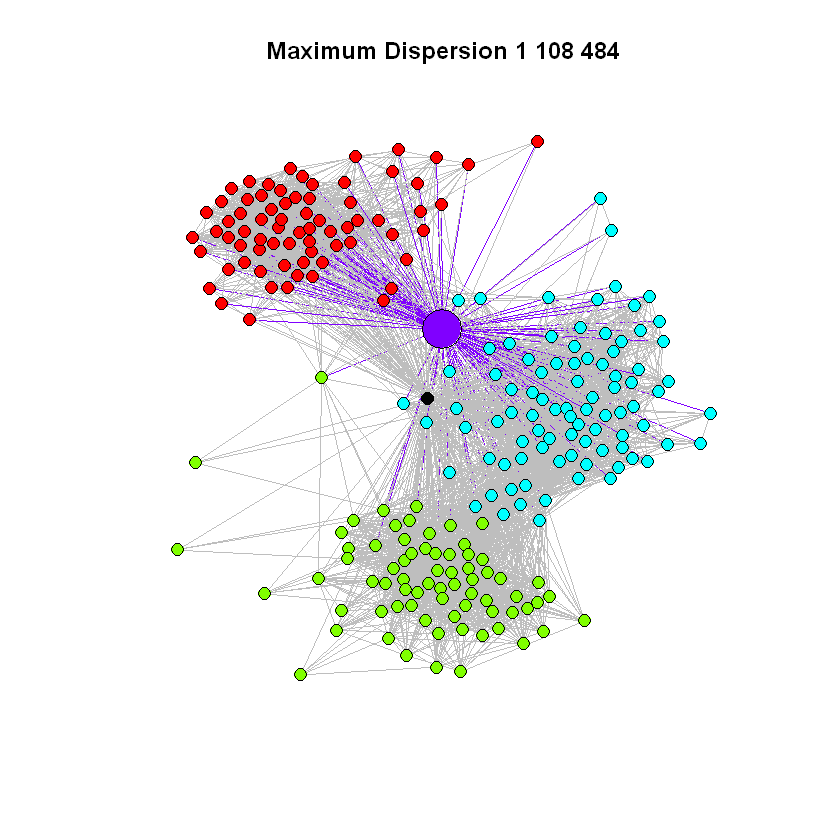

[1] "Core Node: 1087"
[1] "Max Embeddedness: 204"
[1] "Max Dispersion: 34412"
[1] "Max Ratio: 168.686274509804"
[1] "Min Embeddedness: 2"
[1] "Min Dispersion: 1"


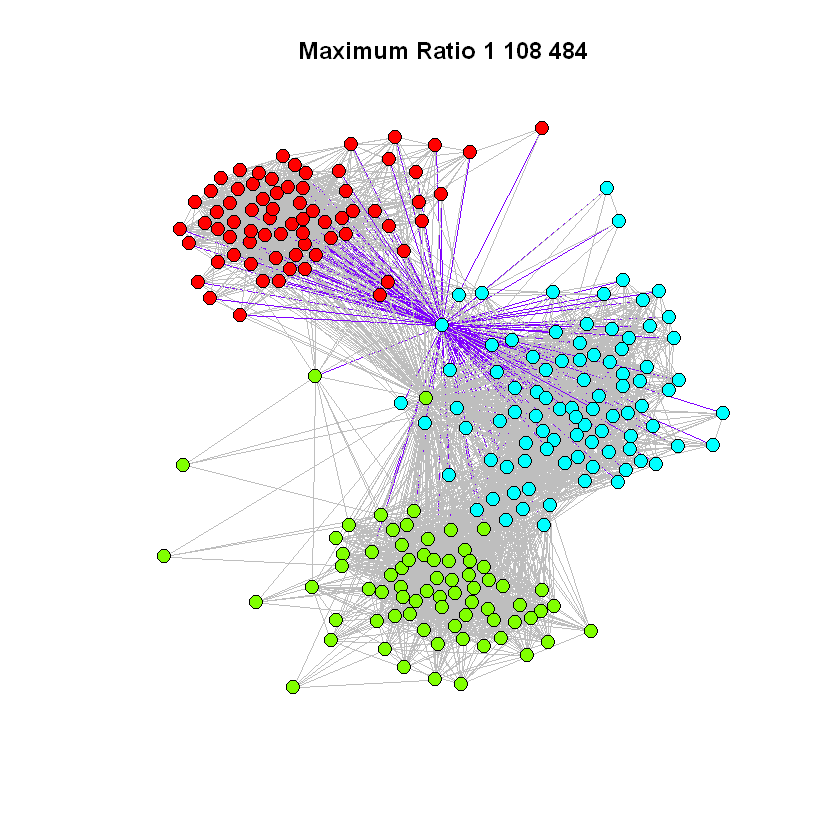

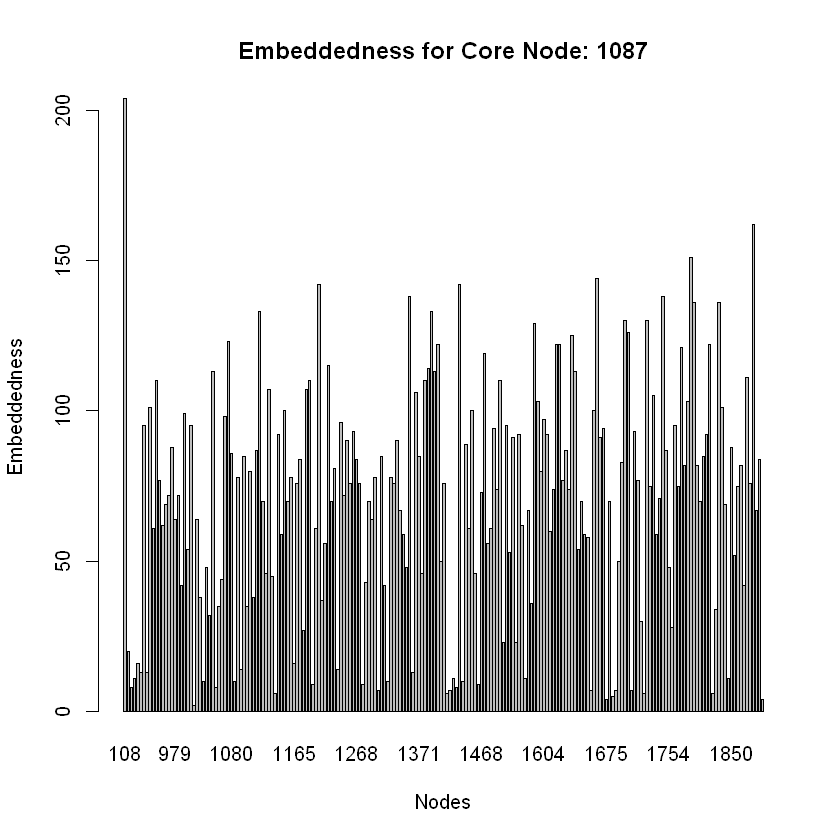

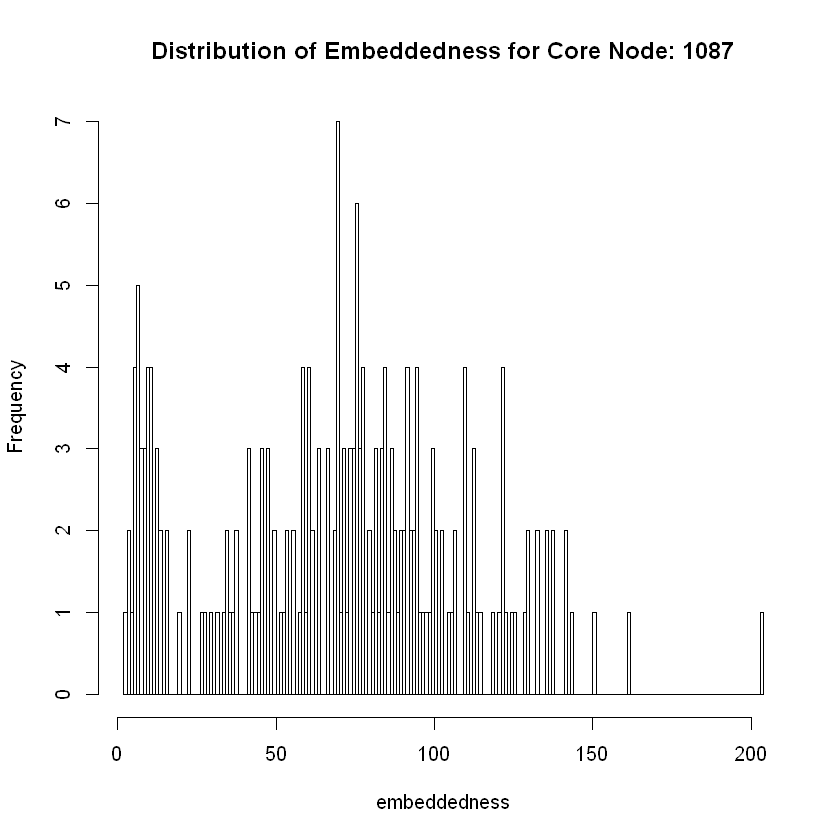

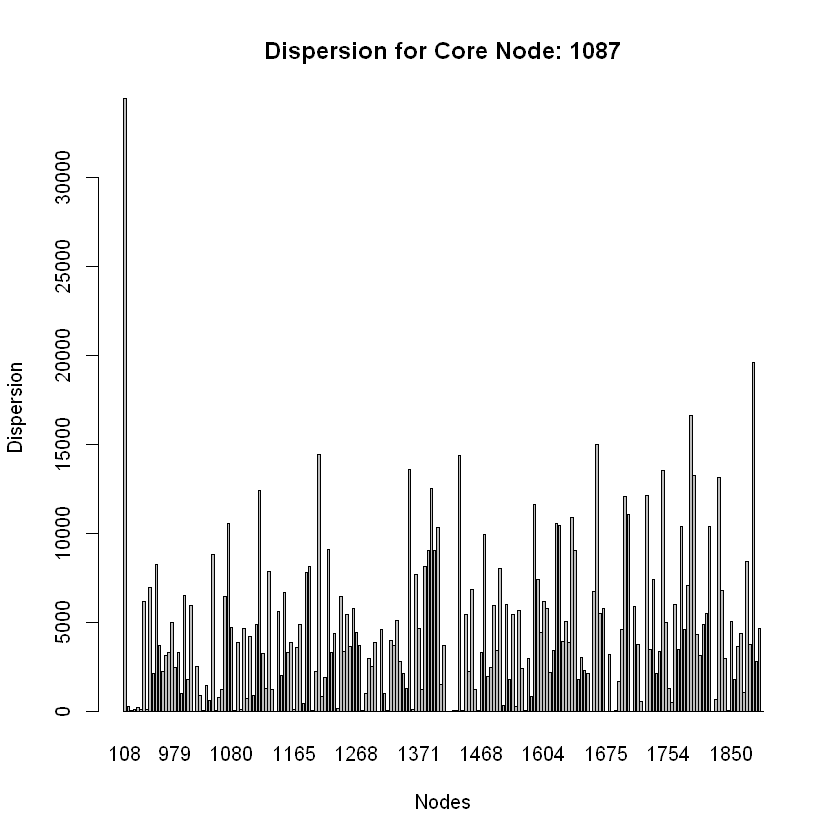

[1] "Fast Greedy for Core Node:  1087"
Community sizes
  1   2 
 81 125 
[1] "Modularity:"
[1] 0.1455315
  [1]   1   2   3   4   5   6   8   9  10  11  12  13  17  18  20  21  23  26
 [19]  27  28  29  30  31  32  33  35  36  38  41  46  49  50  51  52  56  60
 [37]  61  62  63  70  72  73  74  76  78  82  83  85  86  87  90  91  93  94
 [55]  95  97  98  99 100 101 104 105 106 107 108 110 115 116 121 122 124 125
 [73] 128 129 130 131 132 133 135 136 139 141 142 144 145 146 147 148 149 150
 [91] 151 153 156 157 158 159 160 161 164 165 166 168 169 170 172 174 175 176
[109] 177 179 180 181 182 183 186 187 188 189 190 193 195 197 198 200 206
[1] "Max Embeddedness Node wrt Personalized Graph: 1"
[1] "Max Embeddedness Node wrt Facebook Graph: 108"
[1] "Degree of Max Embeddedness Node: 1045"


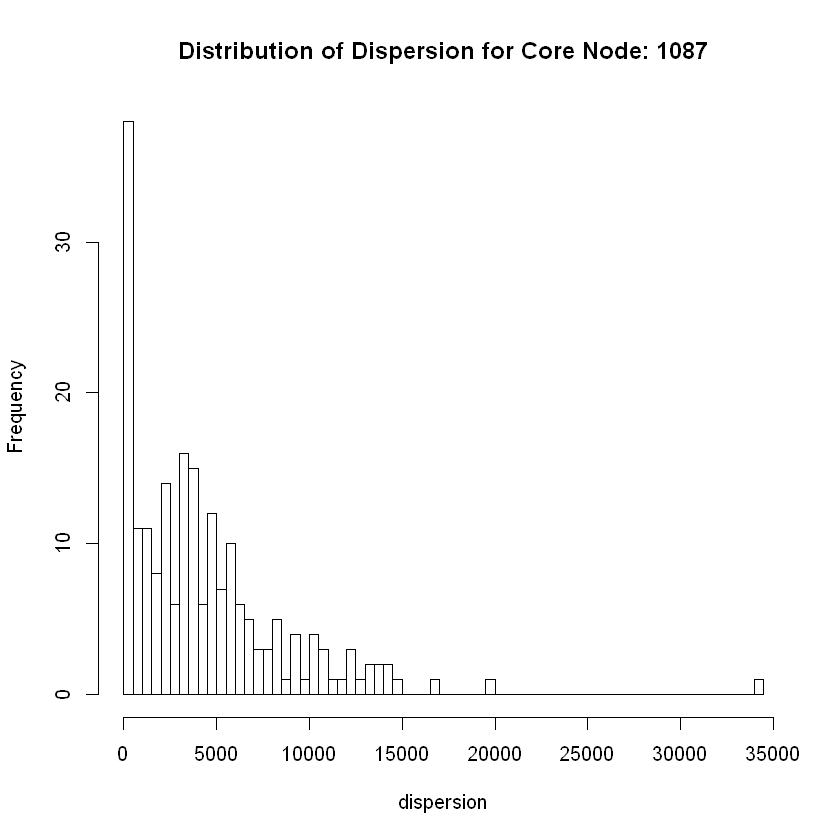

[1] "Max Dispersion Node wrt Personalized Graph: 1"
[1] "Max Dispersion Node wrt Facebook Graph: 108"
[1] "Degree of Max Dispersion Node: 1045"


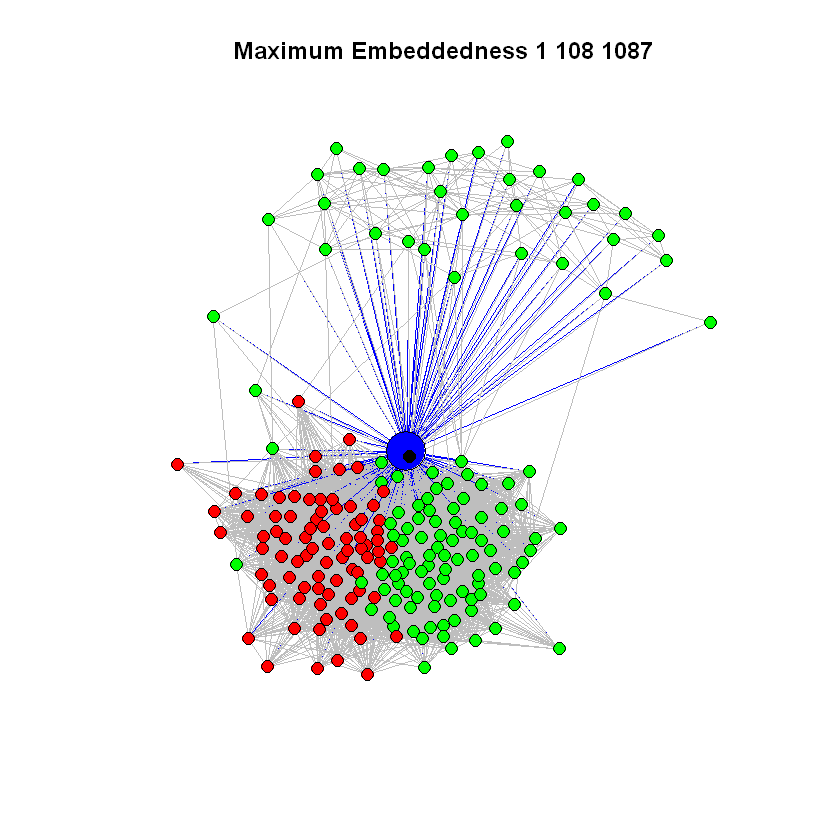

[1] "Max Ratio Node wrt Personalized Graph: 1"
[1] "Max Ratio Node wrt Facebook Graph: 108"
[1] "Degree of Max Ratio Node wrt Personalized Graph: 1045"


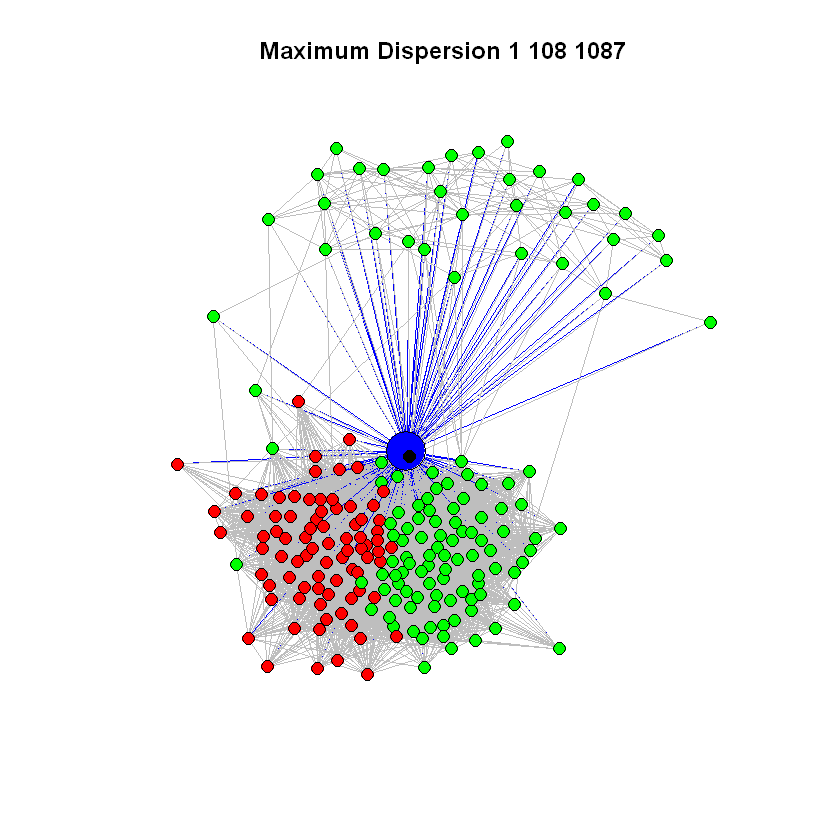

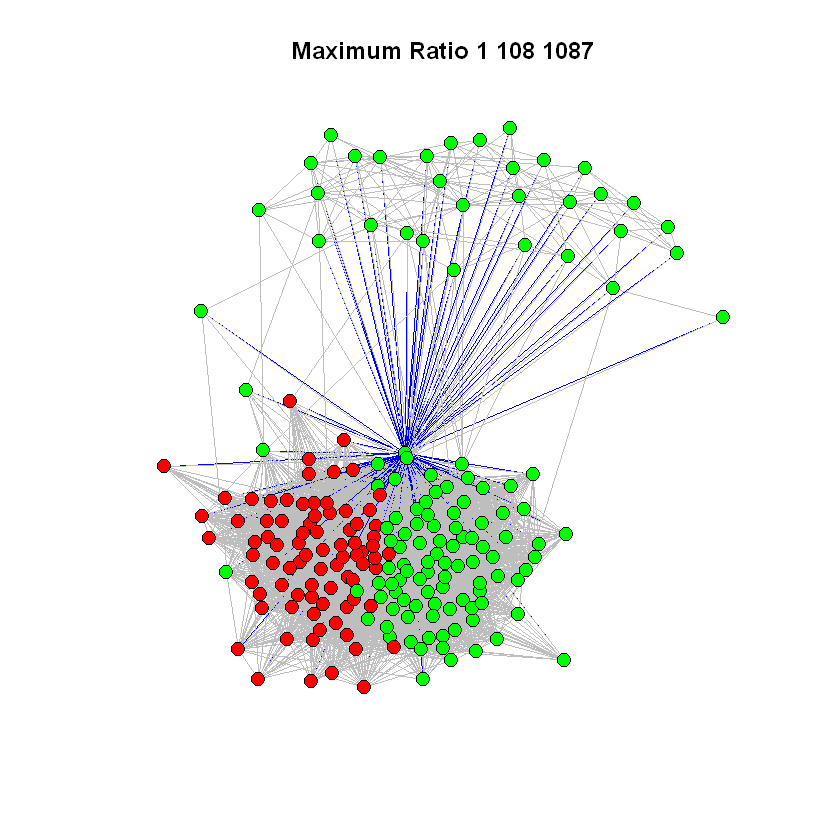

In [47]:
#alternate 12, 13, 14
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1)
for(coreNode in coreNodeList){
    
    coreNodeNeighbors = fbAdList[[coreNode]]
    coreNodeNeighbors = as.list(coreNodeNeighbors)
    
    embeddedness = c()
    dispersion = c()
    maxEmbeddedness = -1
    maxDispersion = -1
    maxRatio = -1
    maxEmbeddednessNode = -1
    maxDispersionNode = -1
    maxRatioNode = -1
    
#     print(coreNodeNeighbors)
    for(neighbor in coreNodeNeighbors){
        eVal = 0
        neighborAdList = fbAdList[[neighbor]]
        neighborAdList = as.list(neighborAdList)
        
#         print(coreNodeNeighbors)
#         print(neighborAdList)
        mutualFriends = intersect(coreNodeNeighbors, neighborAdList)
        #print(mutualFriends)
        mutualFriends = unlist(mutualFriends)
        #print(mutualFriends)
        
        #embeddedness
        eVal = length(mutualFriends)
        embeddedness = c(embeddedness, eVal)
        
        if (eVal > maxEmbeddedness){
            maxEmbeddedness = eVal
            maxEmbeddednessNode = neighbor
#             print(mutualFriends)
#             print(len(coreNodeN))
            #print(paste(neighbor, eVal))
        }
        
        distance = 0
        if(eVal == 0){
            dispersion = c(dispersion, 0)
        }
        else{
            sortedFriends = sort(mutualFriends)
            numSortedFriends = length(mutualFriends)
            for(i in 1:length(sortedFriends)){
                for(j in i:length(sortedFriends)){
                    dist = distMatrix[sortedFriends[i], sortedFriends[j]]
#                     print(i)
#                     print(j)
#                     print(dist)
                    if (is.finite(dist)){
                        distance = distance + dist
                    }else{
                        distance = distance + numSortedFriends + 100
                    }
            }
        }
        
            dispersion = c(dispersion, distance)
        }
        #dispersion
        #print(ul)
        
        
        if(distance > maxDispersion){
            maxDispersion = distance
            maxDispersionNode = neighbor
        }
        
        if(eVal == 0){
            ratio = 0
        }else{
            ratio = distance / eVal
        }
        
        
        if(ratio > maxRatio){
            maxRatio = ratio
            maxRatioNode = neighbor
        }
        
    }
    
    print(paste("Core Node:", coreNode))
    print(paste("Max Embeddedness:", maxEmbeddedness))
    print(paste("Max Dispersion:", maxDispersion))
    print(paste("Max Ratio:", maxRatio))
    print(paste("Min Embeddedness:", min(embeddedness)))
    print(paste("Min Dispersion:", min(dispersion)))
    
    
    barplot(embeddedness, main = paste("Embeddedness for Core Node:", coreNode), ylab = "Embeddedness", xlab = "Nodes", names.arg = coreNodeNeighbors)
    hist(embeddedness, breaks = max(embeddedness) - min(embeddedness), main = paste("Distribution of Embeddedness for Core Node:", coreNode))
    barplot(dispersion, main = paste("Dispersion for Core Node:", coreNode), ylab = "Dispersion", xlab = "Nodes", names.arg = coreNodeNeighbors)
    hist(dispersion, breaks = 100, main = paste("Distribution of Dispersion for Core Node:", coreNode))
    
    #print(typeof(coreNodeNeighbors))
    vertices = c(coreNodeNeighbors, coreNode)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    fgComm = fastgreedy.community(personalizedGraph)
    
    print(paste("Fast Greedy for Core Node: ", coreNode))
    print(sizes(fgComm))
    print("Modularity:")
    print(modularity(fgComm))
    print(fgComm[[2]])
    
    colors = rainbow(max(membership(fgComm))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    coreNodeIndex = findIndex(personalizedGraph, coreNode)
    E(personalizedGraph)$color = 'grey'
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    #max embeddedness
    
    emNode = findIndex(personalizedGraph, maxEmbeddednessNode)
    print(paste("Max Embeddedness Node wrt Personalized Graph:", emNode))
    print(paste("Max Embeddedness Node wrt Facebook Graph:", maxEmbeddednessNode))
    print(paste("Degree of Max Embeddedness Node:", length(fbAdList[[maxEmbeddednessNode]])))
    V(personalizedGraph)[emNode]$color = colors[length(colors)] 
    V(personalizedGraph)[emNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)[inc(emNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Embeddedness", emNode, maxEmbeddednessNode, coreNode))
    
    #max dispersion
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    disNode = findIndex(personalizedGraph, maxDispersionNode)
    print(paste("Max Dispersion Node wrt Personalized Graph:", disNode))
    print(paste("Max Dispersion Node wrt Facebook Graph:", maxDispersionNode))
    print(paste("Degree of Max Dispersion Node:", length(fbAdList[[maxDispersionNode]])))
    V(personalizedGraph)[disNode]$color = colors[length(colors)] 
    V(personalizedGraph)[disNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(disNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Dispersion", disNode, maxDispersionNode, coreNode))
    
    #max ratio
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    ratioNode = findIndex(personalizedGraph, maxRatioNode)
    print(paste("Max Ratio Node wrt Personalized Graph:", ratioNode))
    print(paste("Max Ratio Node wrt Facebook Graph:", maxRatioNode))
    print(paste("Degree of Max Ratio Node wrt Personalized Graph:", length(fbAdList[[maxRatioNode]])))
#     V(personalizedGraph)[ratioNode]$color = colors[length(colors)] 
#     V(personalizedGraph)[ratioNode]$size = 15
#     V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(ratioNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Ratio", ratioNode, maxRatioNode, coreNode))
    
}

In [72]:
#15
#theoretical

In [73]:
#16


In [ ]:
#17


In [4]:
path = "C:\\Users\\anoos\\Documents\\GitHub\\ECE-232E\\Project2\\gplus\\"
file.names = dir(path, pattern = ".circle")

In [5]:
personalNetworkNodes = list()
keys = c()
values = c()
for(i in 1:length(file.names)){
    numLines = countLines(paste(path,file.names[i], sep = ""))
    
    if(numLines > 2){
        nodeID = substr(file.names[i], 1, 21)
#         print(nodeID)
#         print(numLines[1])
        personalNetworkNodes[[nodeID]] = numLines[1]
        keys = c(keys, nodeID)
        values = c(values, numLines[1])
    }
}

In [6]:
personalNetworkNodes

$`100535338638690515335`
[1] 4

$`100962871525684315897`
[1] 3

$`101130571432010257170`
[1] 4

$`101185748996927059931`
[1] 3

$`101263615503715477581`
[1] 4

$`101373961279443806744`
[1] 3

$`101541879642294398860`
[1] 5

$`101626577406833098387`
[1] 6

$`102170431816592344972`
[1] 3

$`102615863344410467759`
[1] 4

$`102778563580121606331`
[1] 4

$`103236949470535942612`
[1] 14

$`103892332449873403244`
[1] 6

$`104105354262797387583`
[1] 10

$`104607825525972194062`
[1] 3

$`104672614700283598130`
[1] 6

$`104987932455782713675`
[1] 3

$`106186407539128840569`
[1] 4

$`106228758905254036967`
[1] 4

$`106382433884876652170`
[1] 10

$`106837574755355833243`
[1] 5

$`107040353898400532534`
[1] 5

$`107203023379915799071`
[1] 4

$`107223200089245371832`
[1] 24

$`107459220492917008623`
[1] 4

$`107489144252174167638`
[1] 3

$`108883879052307976051`
[1] 3

$`109327480479767108490`
[1] 3

$`109596373340495798827`
[1] 6

$`110538600381916983600`
[1] 3

$`110614416163543421878`
[1] 3

$`110701307803962595019`
[1] 5

$`110809308822849680310`
[1] 3

$`110971010308065250763`
[1] 5

$`111048918866742956374`
[1] 5

$`111091089527727420853`
[1] 15

$`112317819390625199896`
[1] 3

$`112724573277710080670`
[1] 3

$`113112256846010263985`
[1] 8

$`113356364521839061717`
[1] 3

$`113881433443048137993`
[1] 7

$`114147483140782280818`
[1] 3

$`115121555137256496805`
[1] 7

$`115360471097759949621`
[1] 6

$`115455024457484679647`
[1] 3

$`115625564993990145546`
[1] 31

$`116247667398036716276`
[1] 3

$`116315897040732668413`
[1] 3

$`116807883656585676940`
[1] 3

$`116825083494890429556`
[1] 3

$`116931379084245069738`
[1] 4

$`117412175333096244275`
[1] 4

$`117503822947457399073`
[1] 3

$`117668392750579292609`
[1] 8

$`117734260411963901771`
[1] 5

$`118107045405823607895`
[1] 5

$`118379821279745746467`
[1] 12

In [7]:
values

[1]  4  3  4  3  4  3  5  6  3  4  4 14  6 10  3  6  3  4  4 10  5  5  4 24  4
[26]  3  3  3  6  3  3  5  3  5  5 15  3  3  8  3  7  3  7  6  3 31  3  3  3  3
[51]  4  4  3  8  5  5 12

In [8]:
#18
length(personalNetworkNodes)

[1] 57

In [9]:
max(values)
min(values)
mean(values)

[1] 31

[1] 3

[1] 5.719298

In [10]:
length(values)

[1] 57

In [11]:
sortedValues = sort(values, index.return = TRUE)
sortedValues

$x
 [1]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
[26]  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  6  6  6  6  6  7  7  8  8
[51] 10 10 12 14 15 24 31

$ix
 [1]  2  4  6  9 15 17 26 27 28 30 31 33 37 38 40 42 45 47 48 49 50 53  1  3  5
[26] 10 11 18 19 23 25 51 52  7 21 22 32 34 35 55 56  8 13 16 29 44 41 43 39 54
[51] 14 20 57 12 36 24 46

In [12]:
keys[46]

[1] "115625564993990145546"

In [13]:
keys[which(values == 3)]

[1] "100962871525684315897" "101185748996927059931" "101373961279443806744"
 [4] "102170431816592344972" "104607825525972194062" "104987932455782713675"
 [7] "107489144252174167638" "108883879052307976051" "109327480479767108490"
[10] "110538600381916983600" "110614416163543421878" "110809308822849680310"
[13] "112317819390625199896" "112724573277710080670" "113356364521839061717"
[16] "114147483140782280818" "115455024457484679647" "116247667398036716276"
[19] "116315897040732668413" "116807883656585676940" "116825083494890429556"
[22] "117503822947457399073"

In [14]:
values[53]

[1] 3

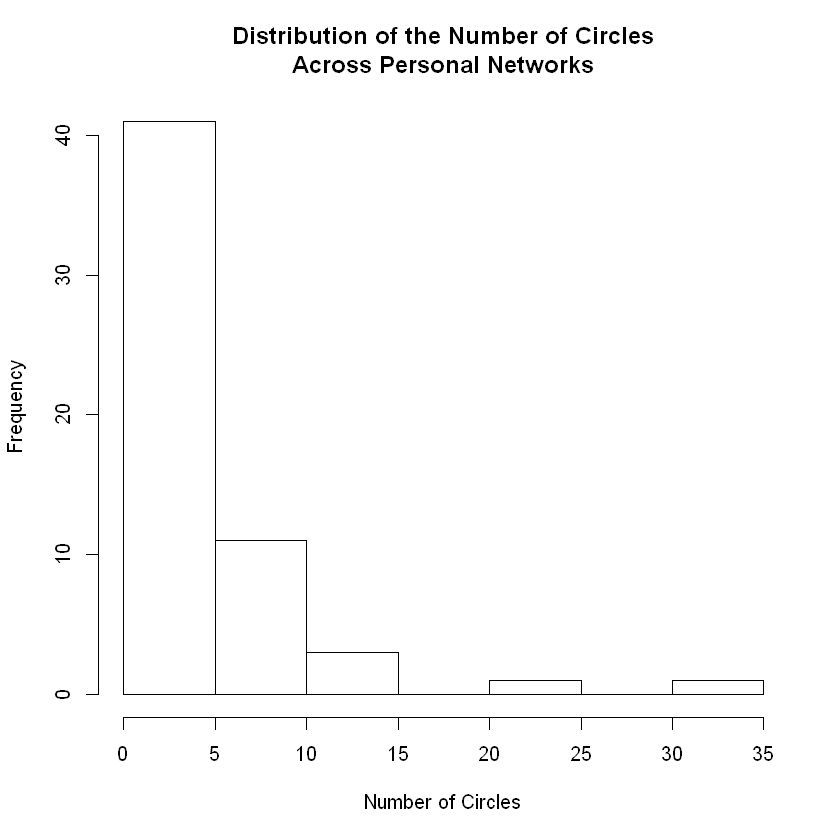

In [15]:
res = hist(values, main = "Distribution of the Number of Circles\nAcross Personal Networks", xlab = "Number of Circles")

In [16]:
res

$breaks
[1]  0  5 10 15 20 25 30 35

$counts
[1] 41 11  3  0  1  0  1

$density
[1] 0.143859649 0.038596491 0.010526316 0.000000000 0.003508772 0.000000000
[7] 0.003508772

$mids
[1]  2.5  7.5 12.5 17.5 22.5 27.5 32.5

$xname
[1] "values"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

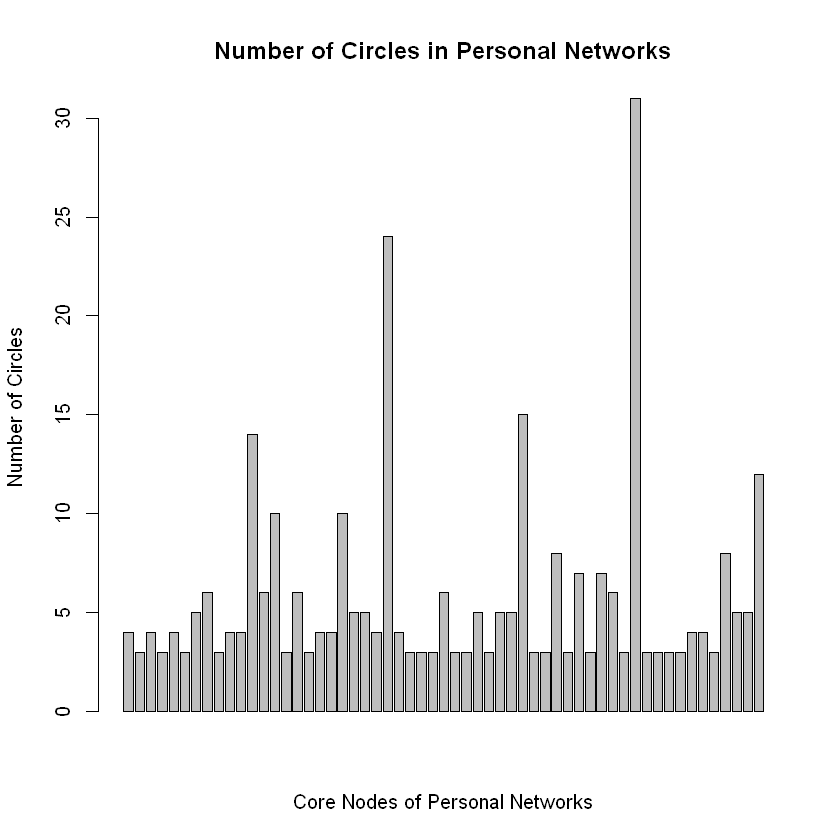

In [17]:
barplot(values, main = "Number of Circles in Personal Networks", ylab = "Number of Circles", xlab = "Core Nodes of Personal Networks")

In [18]:
getVertices = function(nodeID){
    featFile = readLines(paste(path, nodeID, ".feat", sep=""))
    vertices = c()
    for(line in featFile){
        
        split = strsplit(line, " ")
        split = split[[1]]
        vertices = c(vertices, split[1])
    }
    return(vertices)
}

[1] "NODE ID: 109327480479767108490"
[1] "Number of Vertices in .edges File: 773"
[1] "Total Number of Vertices from .feats File: 773"
[1] "Set Difference: 0"
[1] "Number of Vertices in Graph: 774"
[1] "Number of Edges in Graph: 10884"
[1] "Number of Vertices: 774"
[1] "Number of Edges: 10884"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 774"
[1] "Diameter: 5"
[1] "Average of degrees: 28.1240310077519"
[1] "Variance of degrees: 5345.40244893047"
[1] "Community Sizes"
Community sizes
  1   2   3   4 
288 397  76  13 
[1] "Modularity: 0.252765387296677"


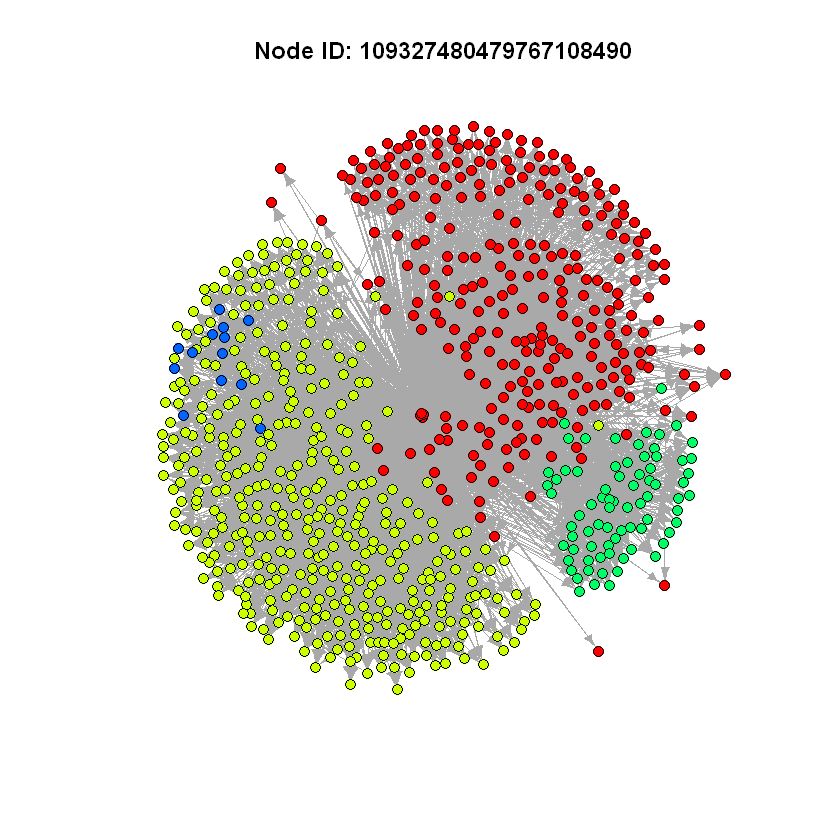

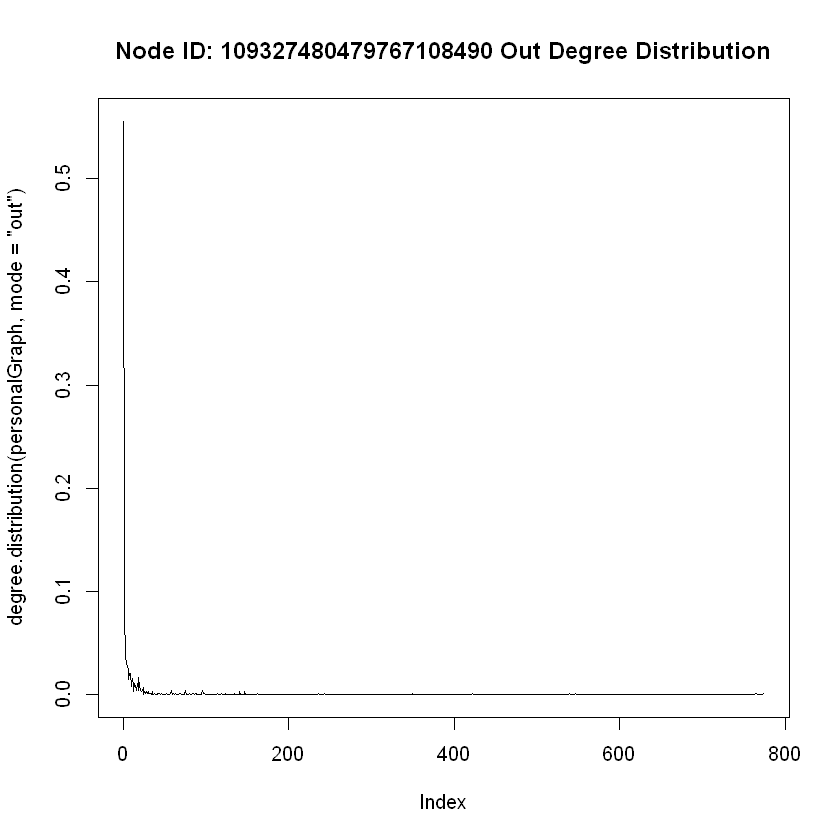

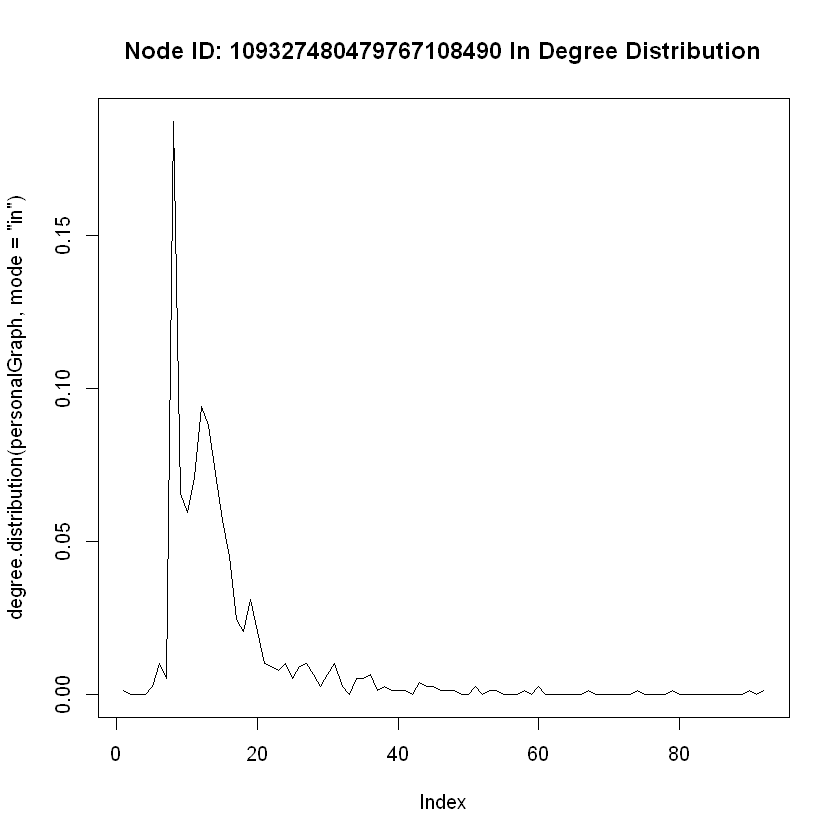

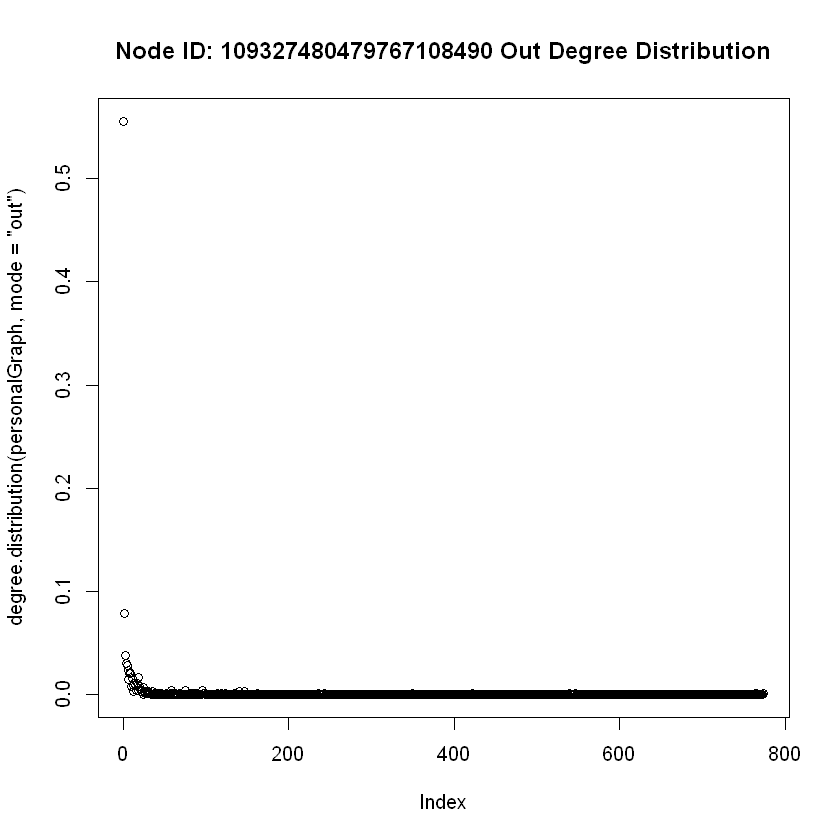

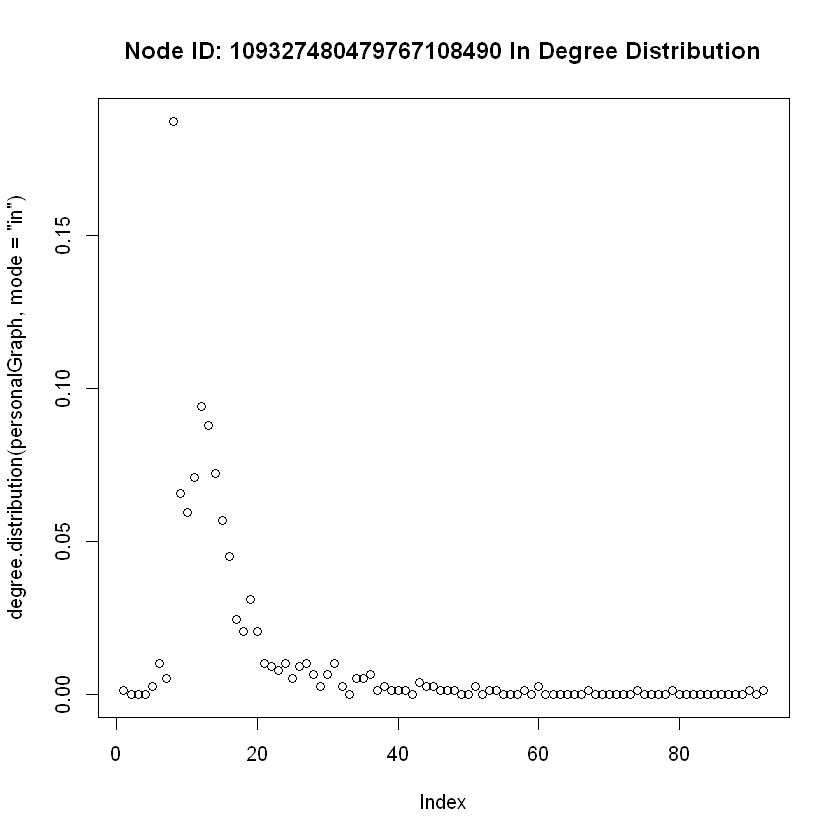

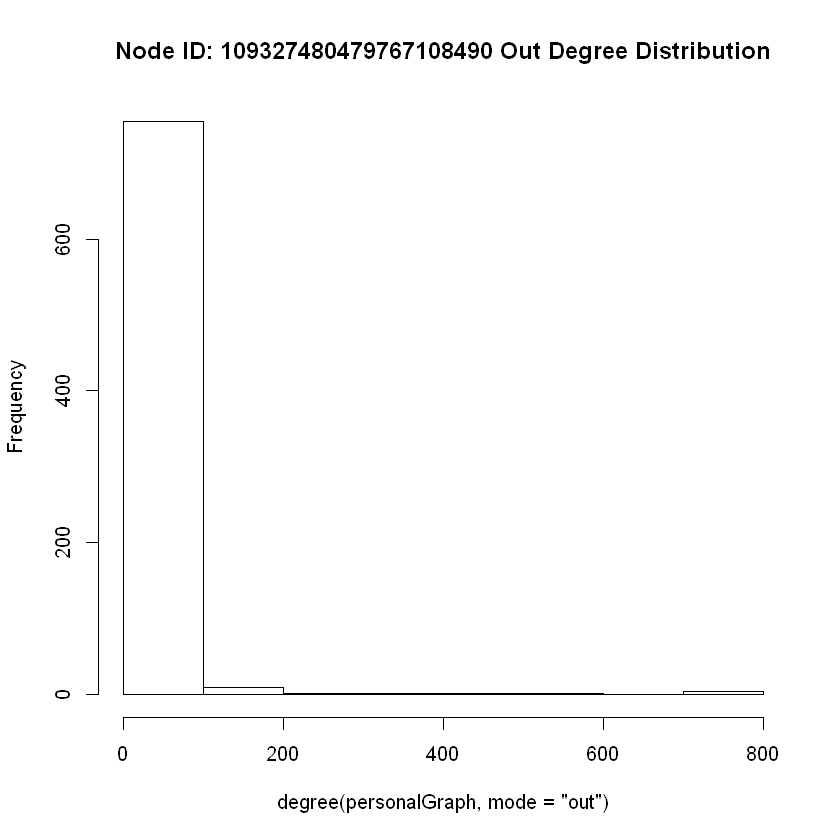

[1] "NODE ID: 115625564993990145546"
[1] "Number of Vertices in .edges File: 923"
[1] "Total Number of Vertices from .feats File: 947"
[1] "Set Difference: 24"
[1] "Number of Vertices in Graph: 948"
[1] "Number of Edges in Graph: 40347"
[1] "Number of Vertices: 948"
[1] "Number of Edges: 40347"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 948"
[1] "Diameter: 7"
[1] "Average of degrees: 85.120253164557"
[1] "Variance of degrees: 11911.8566960288"
[1] "Community Sizes"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 37  46   2 263 232 338   3   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity: 0.312876313924789"


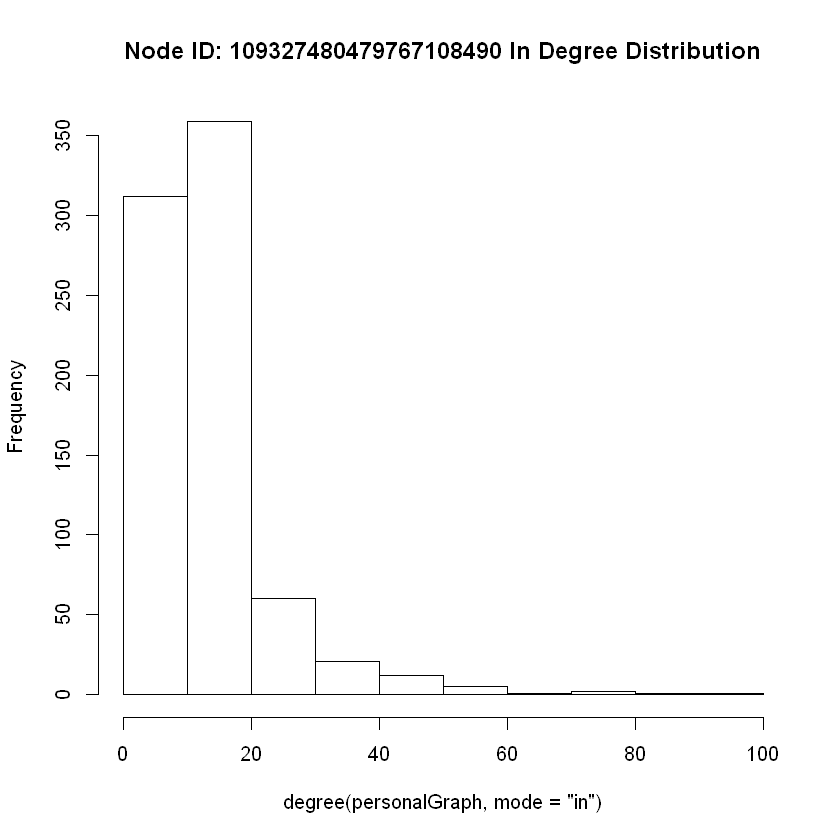

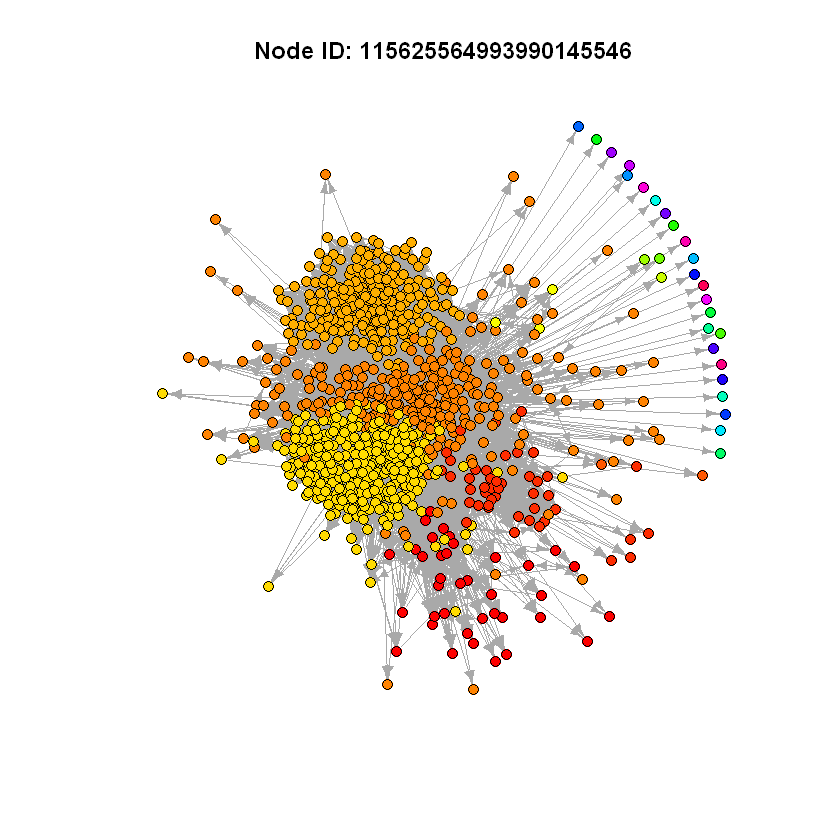

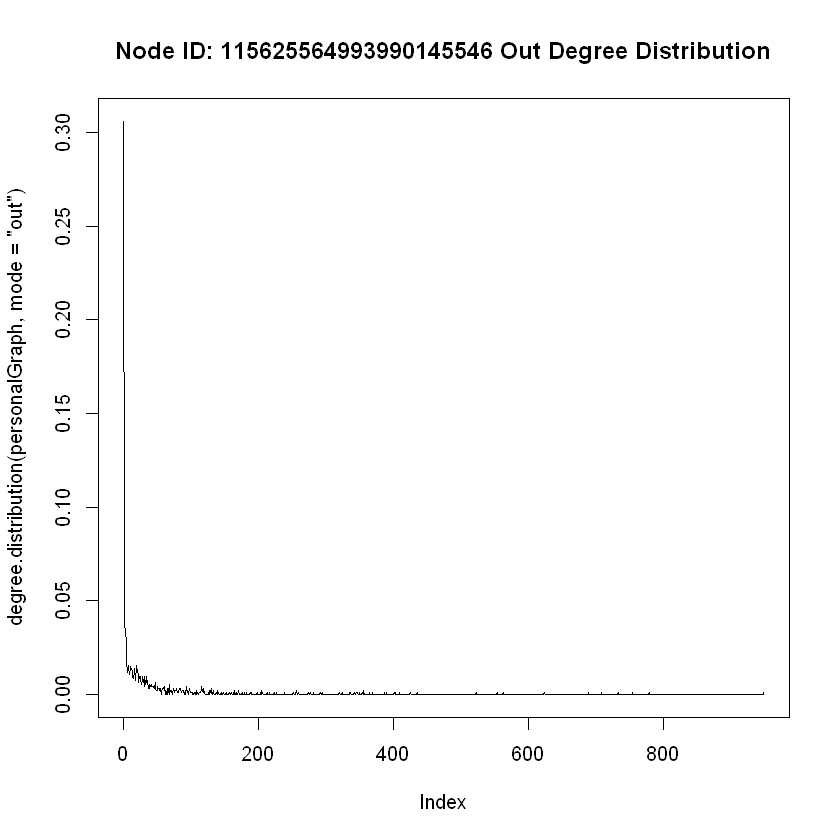

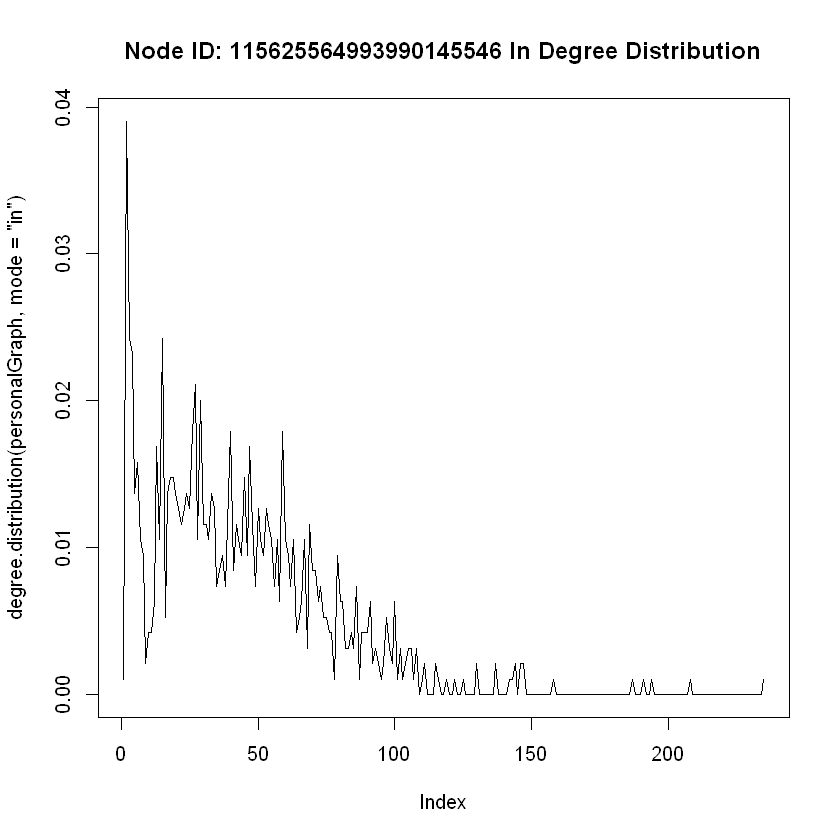

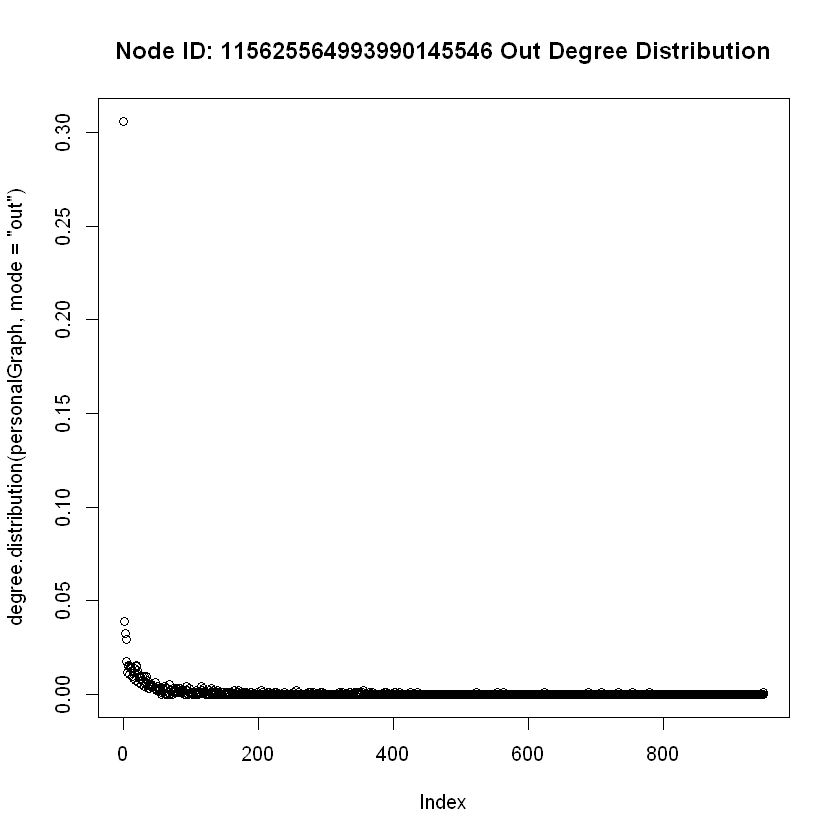

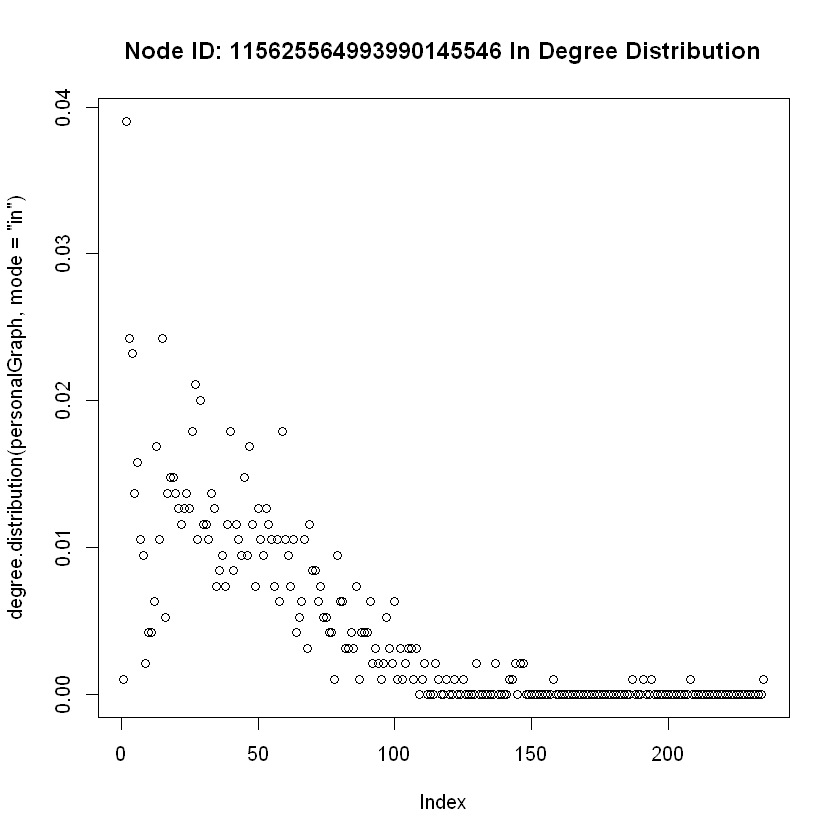

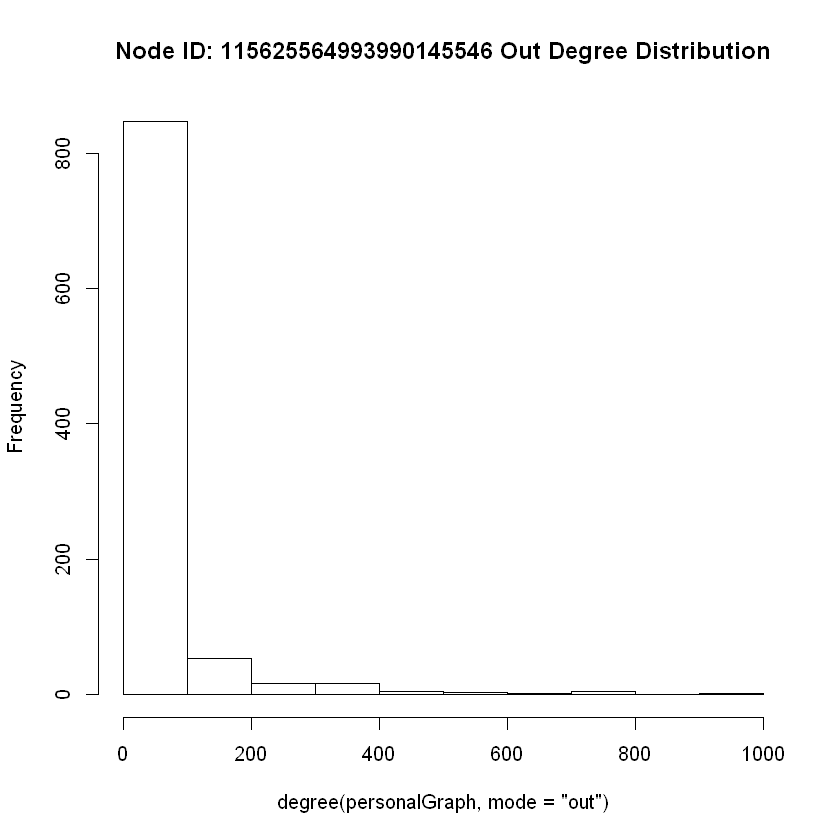

[1] "NODE ID: 101373961279443806744"
[1] "Number of Vertices in .edges File: 3814"
[1] "Total Number of Vertices from .feats File: 3831"
[1] "Set Difference: 17"
[1] "Number of Vertices in Graph: 3832"
[1] "Number of Edges in Graph: 1137338"
[1] "Number of Vertices: 3832"
[1] "Number of Edges: 1137338"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 3832"
[1] "Diameter: 5"
[1] "Average of degrees: 593.600208768267"
[1] "Variance of degrees: 327685.922088184"
[1] "Community Sizes"
Community sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1052  345   49 1811  531    1    1    1    1    1    1    1    1    1    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
  49 
   1 

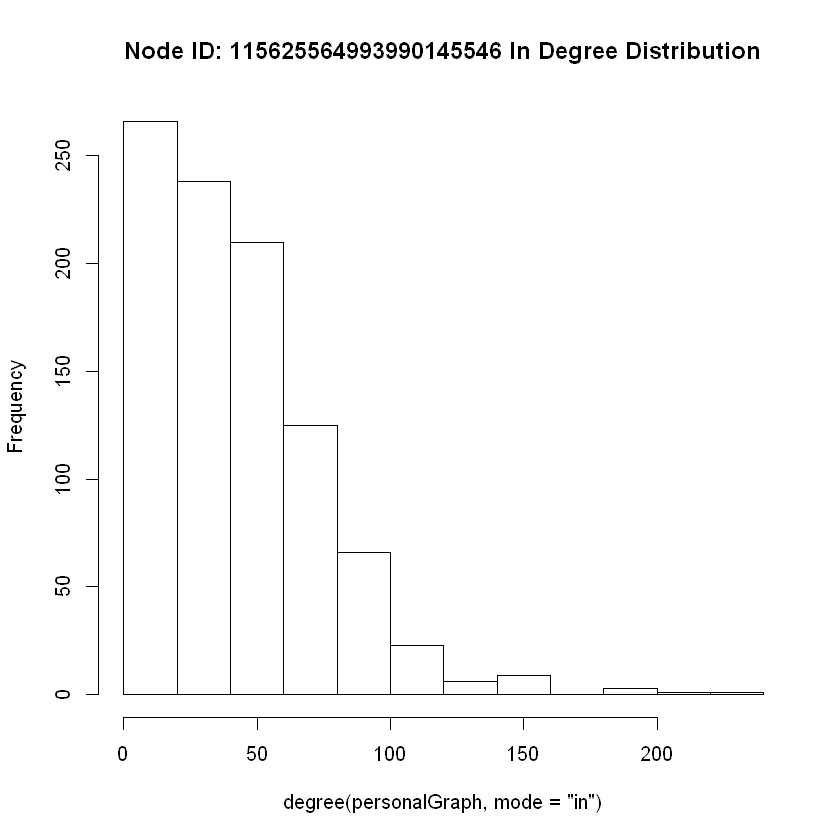

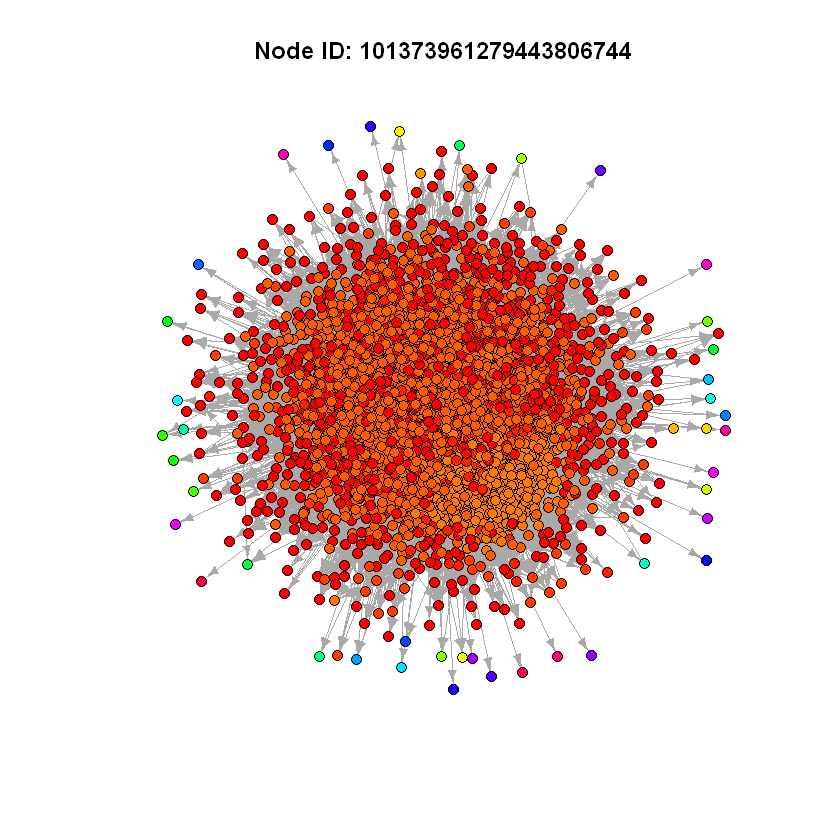

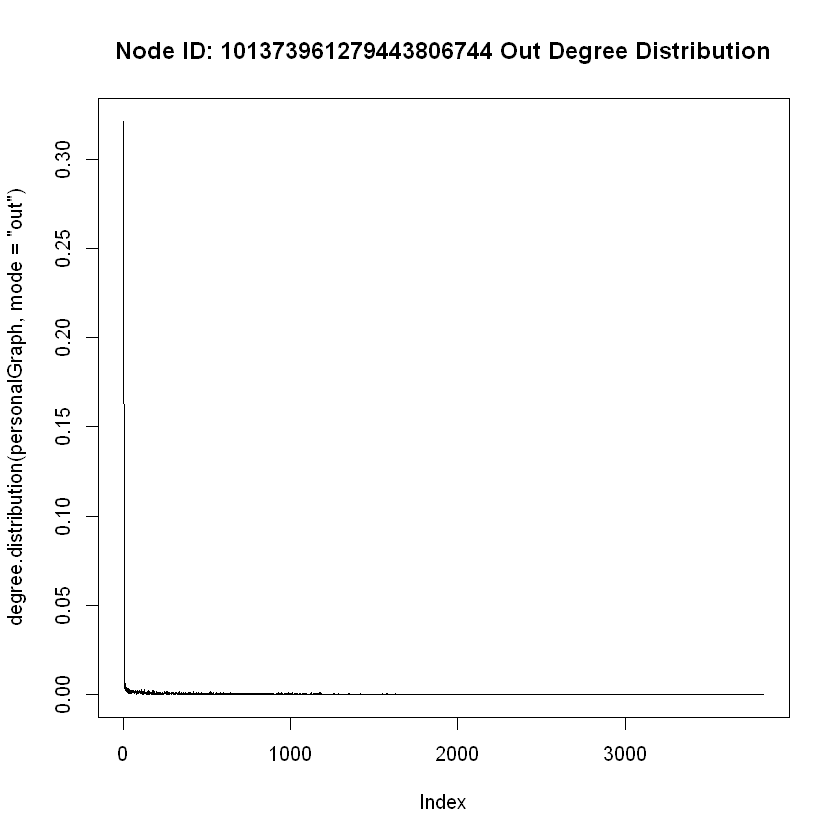

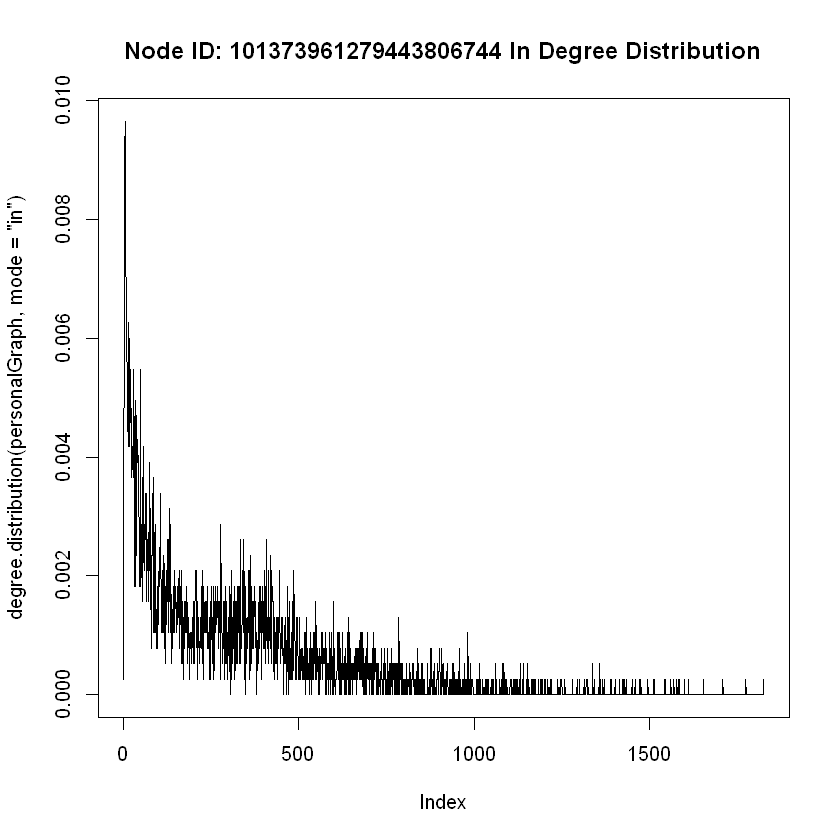

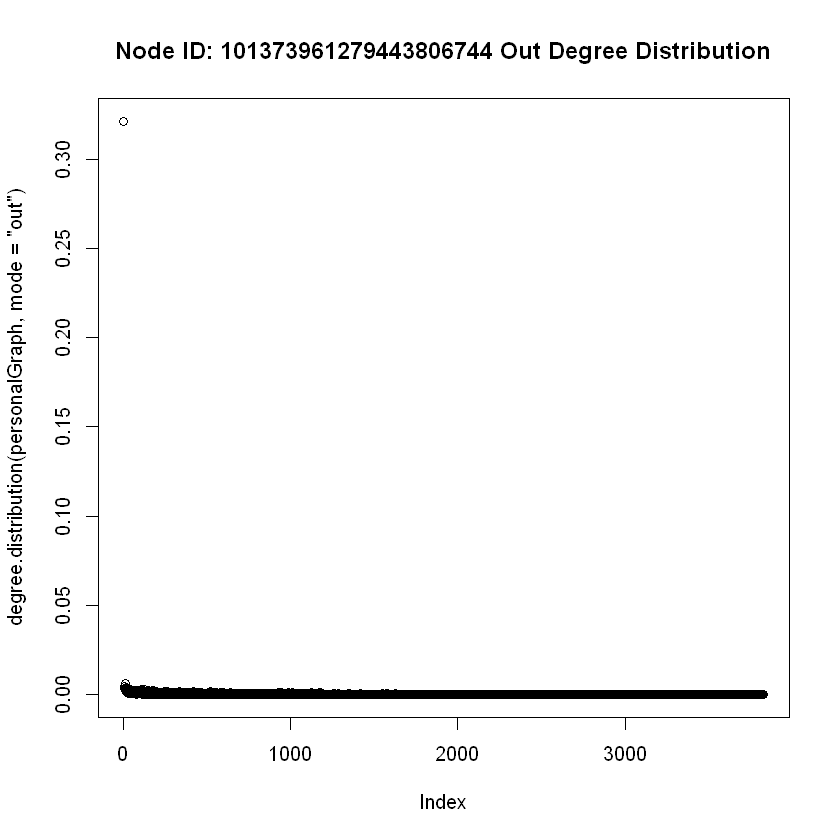

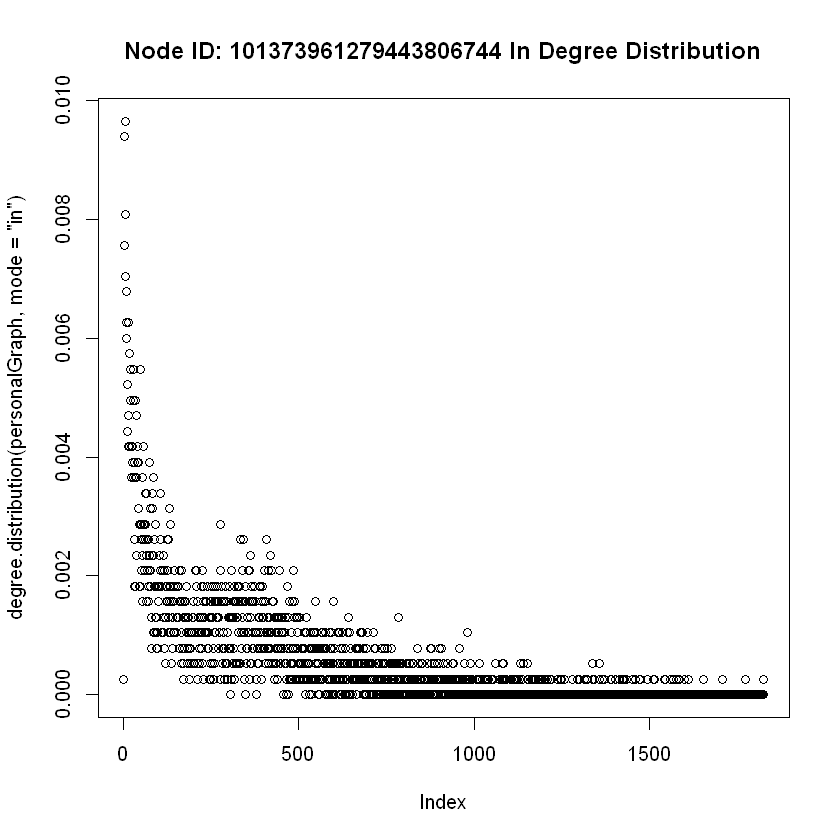

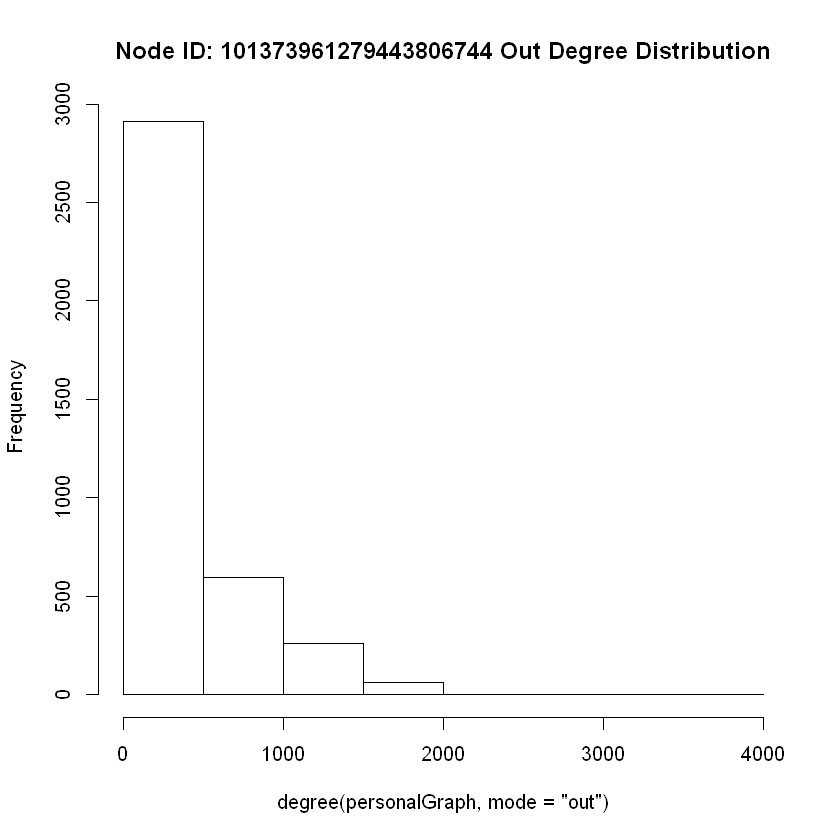

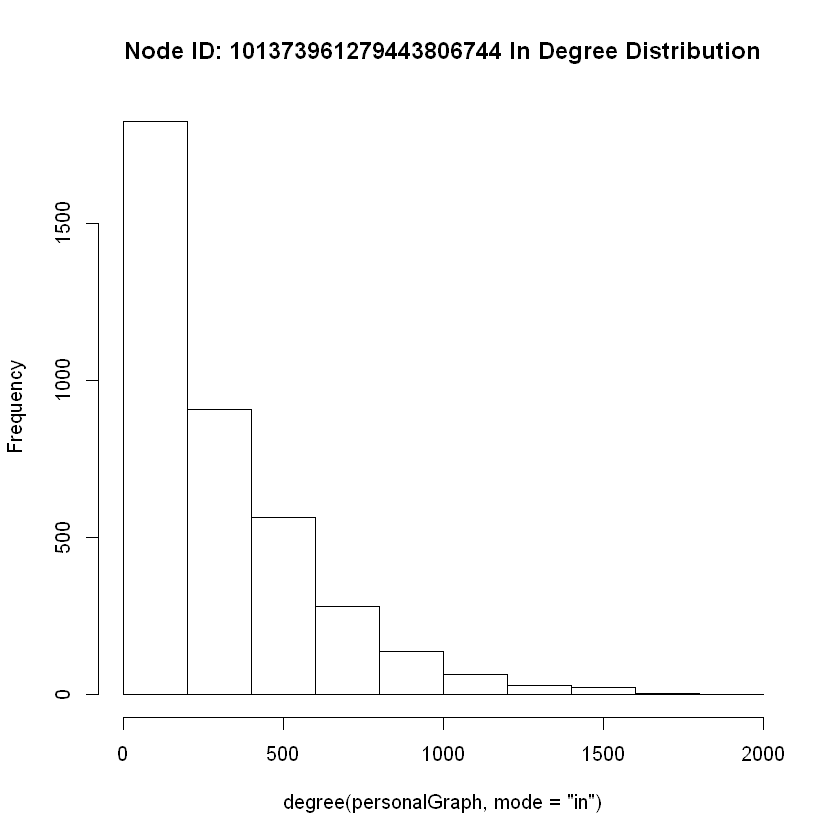

In [20]:
#19, 20
nodes = c('109327480479767108490', '115625564993990145546', '101373961279443806744')
nodes1 = c('109327480479767108490')
for(node in nodes){
    
    personalGraph = read.graph(paste(path, node, ".edges", sep=""), format = 'ncol', directed = TRUE)
    verticesOld = V(personalGraph)$name
    
    vertices = getVertices(node)
    
    extraEdges = c()
    coreNode = factor(node)
    for(vertex in vertices){
        extraEdges = c(extraEdges, node)
        extraEdges = c(extraEdges, vertex)
    }
    
    newVertices = setdiff(vertices, verticesOld)
    
    personalGraph = add_vertices(personalGraph, c(1), name = node)
    if (length(newVertices) > 0){
        personalGraph = add_vertices(personalGraph, c(length(newVertices)), name = newVertices)
#         print(vcount(personalGraph))
    }
    personalGraph = add_edges(personalGraph, extraEdges)
    
    print(paste("NODE ID:",node))
    print(paste("Number of Vertices in .edges File:", length(verticesOld)))
    print(paste("Total Number of Vertices from .feats File:",length(vertices)))
    print(paste("Set Difference:",length(newVertices)))
    print(paste("Number of Vertices in Graph:",vcount(personalGraph)))
    print(paste("Number of Edges in Graph:",ecount(personalGraph)))
    getGraphInfo(personalGraph)
    commGraph = walktrap.community(personalGraph)
    print("Community Sizes")
    print(sizes(commGraph))
    print(paste("Modularity:",modularity(commGraph)))
    
    colors = rainbow(max(membership(commGraph))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalGraph)$color = nodes_colors[membership(commGraph)] 
    V(personalGraph)$size= 4
    
#     layout = layout.fruchterman.reingold(personalGraph)
    
    plot(personalGraph, vertex.label = NA, edge.arrow.size = 0.5, edge.width = 0.2, main=paste("Node ID:",node))
#     plot(personalGraph, layout = layout, vertex.label = NA, edge.arrow.size = 0.5, edge.width = 0.2, main=paste("Node ID:",node))
    plot(degree.distribution(personalGraph, mode="out"), main=paste("Node ID:",node, "Out Degree Distribution"), type='l')
    plot(degree.distribution(personalGraph, mode="in"), main=paste("Node ID:",node, "In Degree Distribution"), type='l')
    plot(degree.distribution(personalGraph, mode="out"), main=paste("Node ID:",node, "Out Degree Distribution"))
    plot(degree.distribution(personalGraph, mode="in"), main=paste("Node ID:",node, "In Degree Distribution"))
    hist(degree(personalGraph, mode = "out"), main=paste("Node ID:",node, "Out Degree Distribution"))
    hist(degree(personalGraph, mode = "in"), main=paste("Node ID:",node, "In Degree Distribution"))
    
}

[1] "NODE ID: 116247667398036716276"
[1] "Number of Vertices in .edges File: 1175"
[1] "Total Number of Vertices from .feats File: 1256"
[1] "Set Difference: 81"
[1] "Number of Vertices in Graph: 1257"
[1] "Number of Edges in Graph: 75458"
[1] "Number of Vertices: 1257"
[1] "Number of Edges: 75458"
[1] "Is the Graph Connected: TRUE"
[1] "GCC Size: 1257"
[1] "Diameter: 5"
[1] "Average of degrees: 120.06046141607"
[1] "Variance of degrees: 25263.2399720799"
[1] "Community Sizes"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
784 133  64  49   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64 

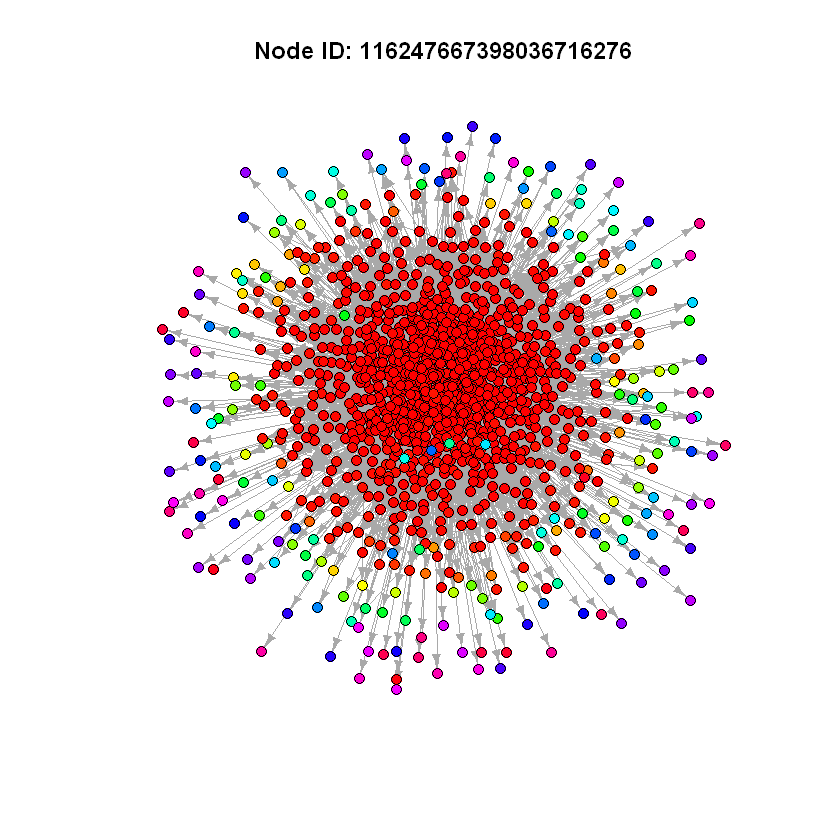

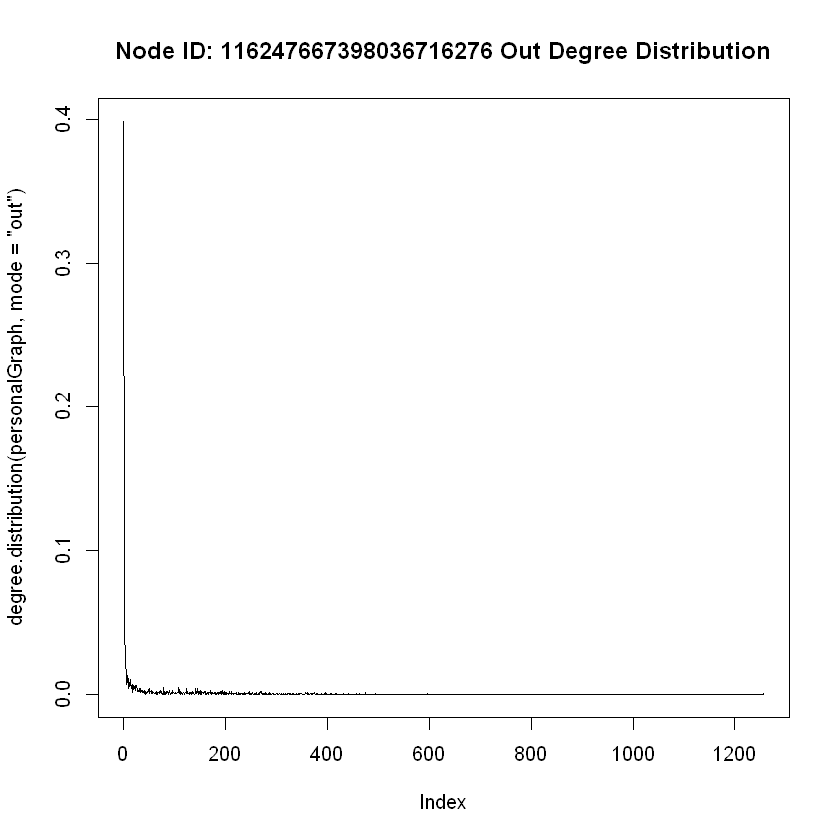

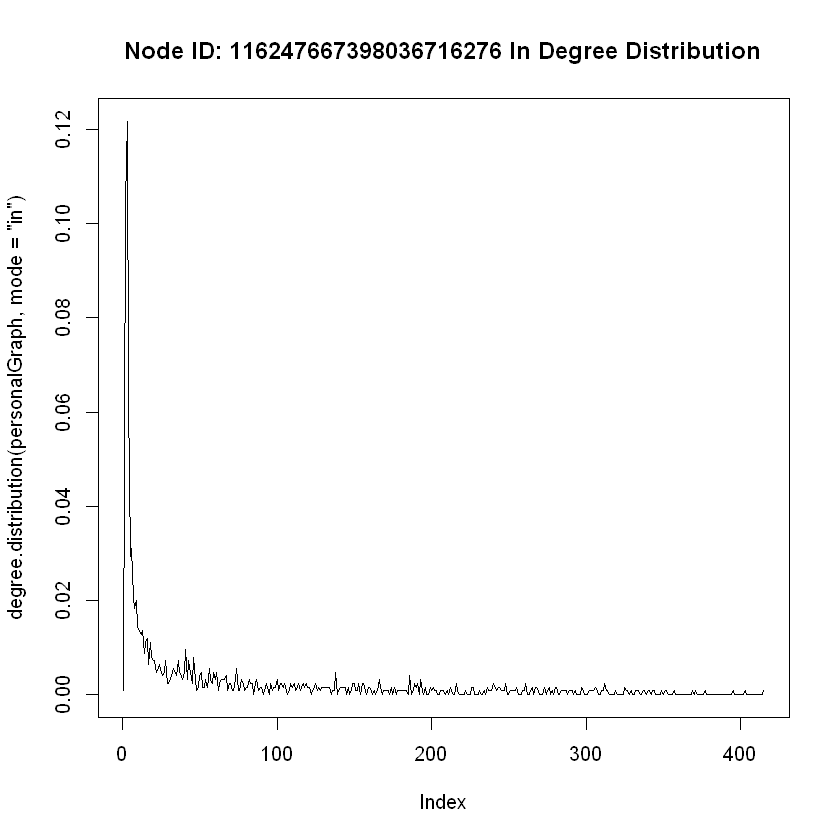

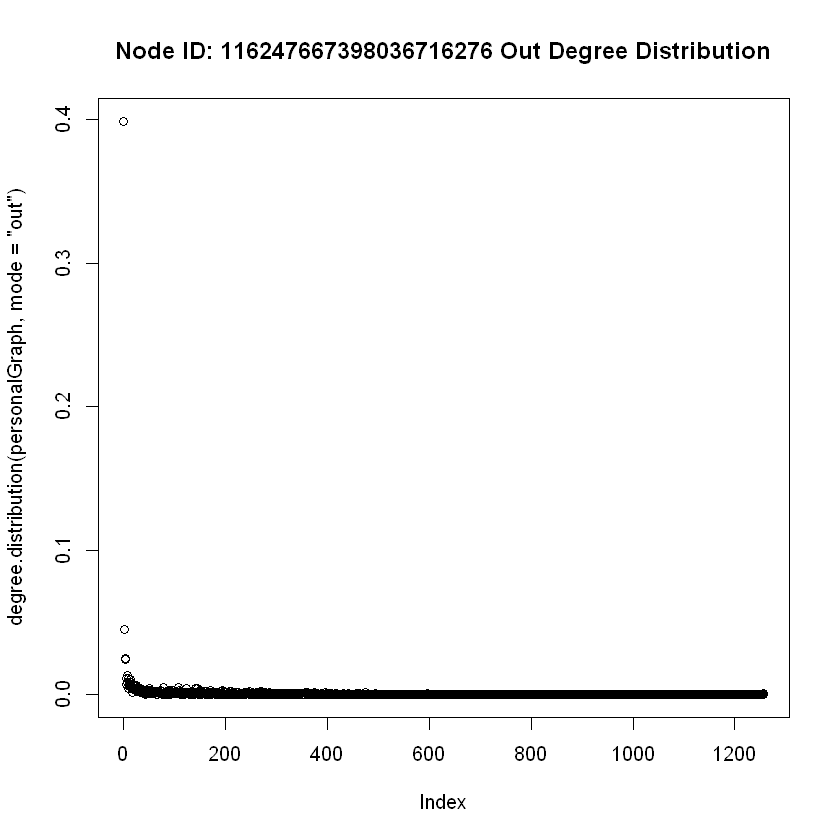

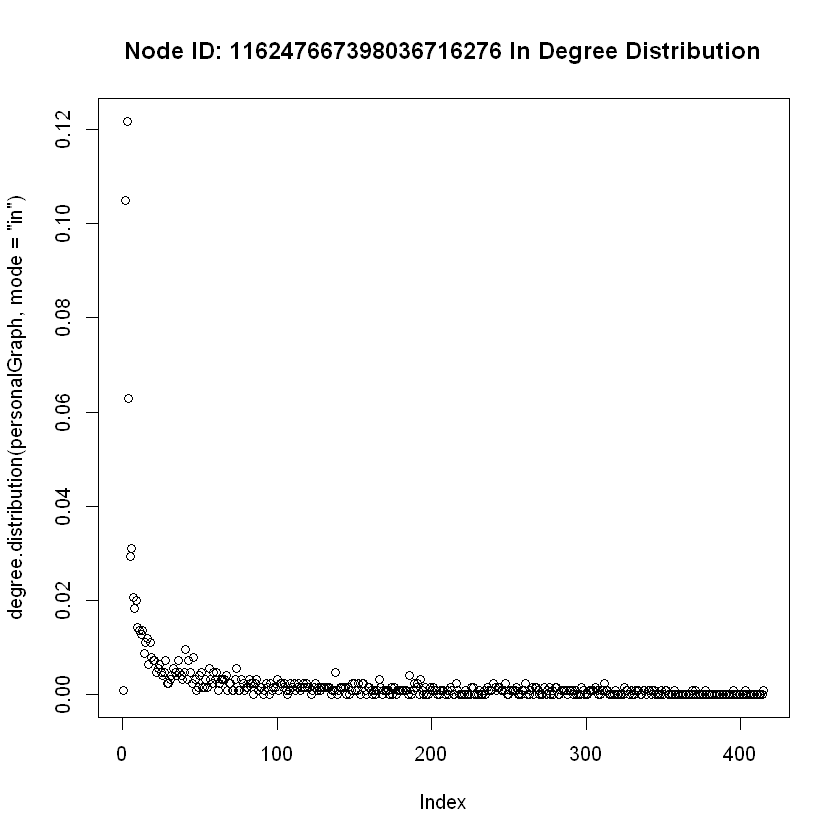

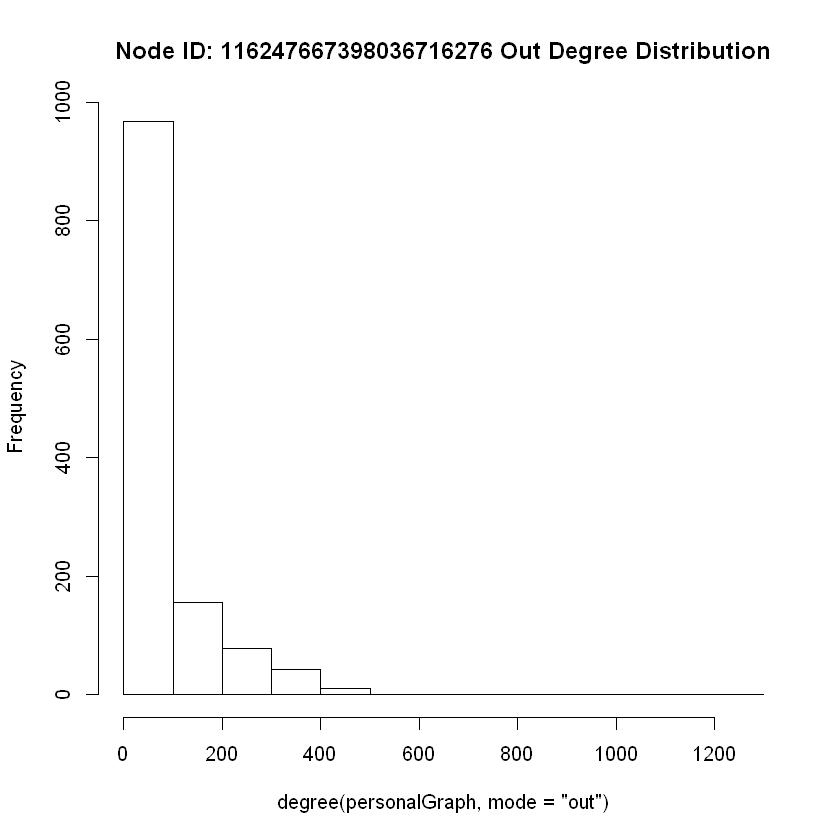

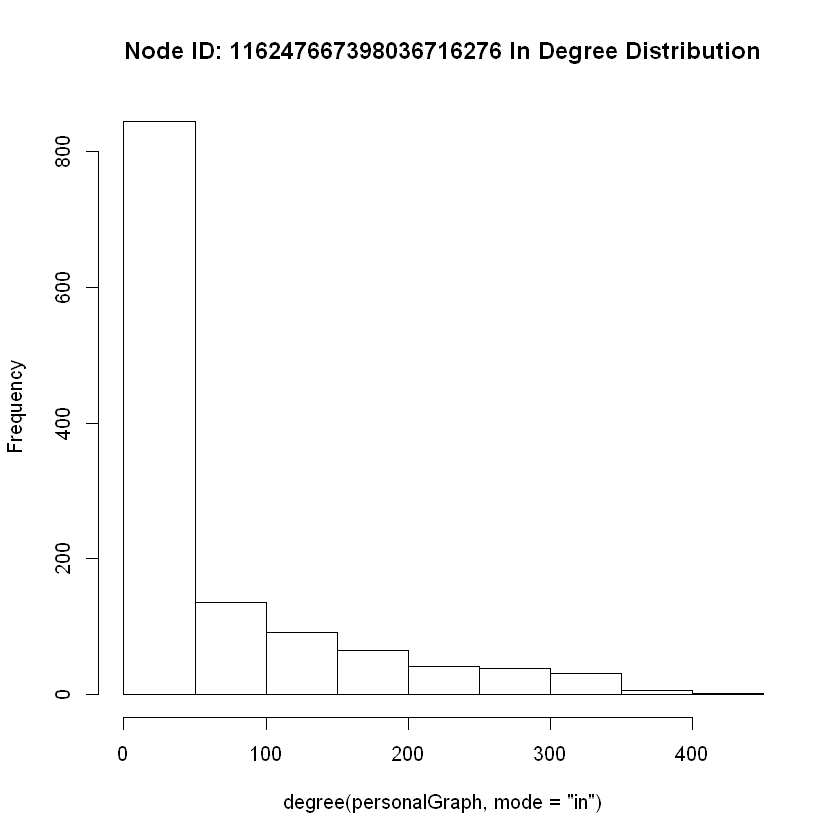

In [19]:
#19, 20
nodes = c('109327480479767108490', '115625564993990145546', '101373961279443806744')
nodes1 = c('116247667398036716276')
for(node in nodes1){
    
    personalGraph = read.graph(paste(path, node, ".edges", sep=""), format = 'ncol', directed = TRUE)
    verticesOld = V(personalGraph)$name
    
    vertices = getVertices(node)
    
    extraEdges = c()
    coreNode = factor(node)
    for(vertex in vertices){
        extraEdges = c(extraEdges, node)
        extraEdges = c(extraEdges, vertex)
    }
    
    newVertices = setdiff(vertices, verticesOld)
    
    personalGraph = add_vertices(personalGraph, c(1), name = node)
    if (length(newVertices) > 0){
        personalGraph = add_vertices(personalGraph, c(length(newVertices)), name = newVertices)
#         print(vcount(personalGraph))
    }
    personalGraph = add_edges(personalGraph, extraEdges)
    
    print(paste("NODE ID:",node))
    print(paste("Number of Vertices in .edges File:", length(verticesOld)))
    print(paste("Total Number of Vertices from .feats File:",length(vertices)))
    print(paste("Set Difference:",length(newVertices)))
    print(paste("Number of Vertices in Graph:",vcount(personalGraph)))
    print(paste("Number of Edges in Graph:",ecount(personalGraph)))
    getGraphInfo(personalGraph)
    commGraph = walktrap.community(personalGraph)
    print("Community Sizes")
    print(sizes(commGraph))
    print(paste("Modularity:",modularity(commGraph)))
    
    colors = rainbow(max(membership(commGraph))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalGraph)$color = nodes_colors[membership(commGraph)] 
    V(personalGraph)$size= 4
    
#     layout = layout.fruchterman.reingold(personalGraph)
    
    plot(personalGraph, vertex.label = NA, edge.arrow.size = 0.5, edge.width = 0.2, main=paste("Node ID:",node))
#     plot(personalGraph, layout = layout, vertex.label = NA, edge.arrow.size = 0.5, edge.width = 0.2, main=paste("Node ID:",node))
    plot(degree.distribution(personalGraph, mode="out"), main=paste("Node ID:",node, "Out Degree Distribution"), type='l')
    plot(degree.distribution(personalGraph, mode="in"), main=paste("Node ID:",node, "In Degree Distribution"), type='l')
    plot(degree.distribution(personalGraph, mode="out"), main=paste("Node ID:",node, "Out Degree Distribution"))
    plot(degree.distribution(personalGraph, mode="in"), main=paste("Node ID:",node, "In Degree Distribution"))
    hist(degree(personalGraph, mode = "out"), main=paste("Node ID:",node, "Out Degree Distribution"))
    hist(degree(personalGraph, mode = "in"), main=paste("Node ID:",node, "In Degree Distribution"))
    
}

In [21]:
# verticesOld
# vertices
x = setdiff(vertices, verticesOld)
length(x)

[1] 17

In [22]:
#21
#theoretical

In [23]:
#22
node = '101373961279443806744'
featFile = readLines(paste(path, node, ".feat", sep=""))
circleFile = readLines(paste(path, node, ".circles", sep=""))
egoFeatFile = readLines(paste(path, node, ".egofeat", sep=""))

In [59]:
getCircles = function(node){
    circleFile = readLines(paste(path, node, ".circles", sep=""))
    C = c()
    A = c()
    unionSet = c()
    
    i = 1
    for(circle in circleFile){
        members = strsplit(circle, "\t")
        members = members[[1]]
    #     print(length(members))
#     print(members)
        members = members[-1]
    #     print(members)
    #     print(length(members))
        A = c(A, length(members))
        C[[i]] = members
        unionSet = union(unionSet, members)
        i = i + 1
    }
    N = length(unionSet)
    N = N + 1
    
    solution = list("C" = C, "A" = A, "N" = N, "UnionSet" = unionSet)
    return(solution)
}

In [25]:
createGraph = function(node){
    personalGraph = read.graph(paste(path, node, ".edges", sep=""), format = 'ncol', directed = TRUE)
    verticesOld = V(personalGraph)$name
    
    vertices = getVertices(node)
    
    extraEdges = c()
    coreNode = factor(node)
    for(vertex in vertices){
        extraEdges = c(extraEdges, node)
        extraEdges = c(extraEdges, vertex)
    }
    
    newVertices = setdiff(vertices, verticesOld)
    
    personalGraph = add_vertices(personalGraph, c(1), name = node)
    if (length(newVertices) > 0){
        personalGraph = add_vertices(personalGraph, c(length(newVertices)), name = newVertices)
#         print(vcount(personalGraph))
    }
    personalGraph = add_edges(personalGraph, extraEdges)
    
    return(personalGraph)
}

In [61]:
getCommunities = function(graph, unionSet, node){
    
    K = walktrap.community(graph)
    print(K)
    print(sizes(K))
    print(paste("Modularity:",modularity(K)))
    
    colors = rainbow(max(membership(K))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(graph)$color = nodes_colors[membership(K)] 
    V(graph)$size= 10
    
#     layout = layout.fruchterman.reingold(personalGraph)
    
#     plot(graph, edge.arrow.size = 0.5, edge.width = 0.2, main=paste("Node ID:",node))
    
    B = c()

    for (i in 1: length(sizes(K))){
        b = 0
        for(vertex in K[[i]]){
            if(vertex == node){
                b = b + 1
            }
            if (vertex %in% unionSet){
                b = b + 1
            }
        }
        B = c(B, b)
    }
    
    solution = list("K" = K, "B" = B)
    
}

In [27]:
getCJI = function(K, C){
    cji = matrix(nrow=length(sizes(K)), ncol = length(C))
    for(j in 1:length(sizes(K))){
    for(i in 1:length(C)){
        community = K[[j]]
        circle = C[[i]]
#         print(community)
#         print(circle)
        cji[j, i] = length(intersect(community, circle))
        }
    }
    return(cji)
}

In [28]:
getEntropies = function(C, K, A, B, N, cji){
    h_c = 0
    h_k = 0
    h_ck = 0
    h_kc = 0

    for(i in 1:length(C)){

        if(is.finite(log(A[i]))){
            h_c = h_c + (A[i] / N) * log(A[i] / N)
        }
        else{
            h_c = h_c + 0
        }

    }
    h_c = (-1) * h_c

    for(i in 1:length(sizes(K))){
        if(is.finite(log(B[i]))){
            h_k = h_k + (B[i] / N) * log(B[i] / N)
        }
        else{
            h_k = h_k + 0
        }

    }
    h_k = (-1) * h_k

    for(j in 1:length(sizes(K))){
        for(i in 1:length(C)){
            if (is.finite(log(cji[j, i] / B[j]))) {
                h_ck = h_ck + (cji[j, i] / N) * log(cji[j, i] / B[j])
            }else{
                h_ck = h_ck + 0
            }

        }
    }
    h_ck = (-1) * h_ck

    for(i in 1:length(C)){
        for(j in 1:length(sizes(K))){
            if (is.finite(log(cji[j, i] / A[i]))) {
                h_kc = h_kc + (cji[j, i] / N) * log(cji[j, i] / A[i])
            } else{
                h_kc = h_kc + 0
            }

        }
    }
    h_kc = (-1) * h_kc
    
    solution = list("h_c" = h_c, "h_k" = h_k, "h_ck" = h_ck, "h_kc" = h_kc)
    
    return(solution)
}

In [29]:
#22
nodes = c('109327480479767108490', '115625564993990145546', '101373961279443806744')

nodes1 = c('109327480479767108490')
for(node in nodes){
    
    print(paste("Node ID:", node))
    vertices = getVertices(node)
    
    circleInfo = getCircles(node)
    C = circleInfo$C
    A = circleInfo$A
    N = circleInfo$N
    unionSet = circleInfo$UnionSet
    
    graph = createGraph(node)
    
    communityInfo = getCommunities(graph, unionSet, node)
    K = communityInfo$K
    B = communityInfo$B
    
    cji = getCJI(K, C)
    
    entropies = getEntropies(C, K, A, B, N, cji)
    h_c = entropies$h_c
    h_k =  entropies$h_k
    h_ck = entropies$h_ck
    h_kc = entropies$h_kc
    
    h = 1 - (h_ck / h_c)
    c = 1 - (h_kc / h_k)
    
    print("A")
    print(A)
    print("B")
    print(B)
    print("N")
    print(N)
    print(paste("H(C):", h_c))
    print(paste("H(K):", h_k))
    print(paste("H(C|K):", h_ck))
    print(paste("H(K|C):", h_kc))
    print(paste("Homogeneity:", h))
    print(paste("Completeness:", c))   
    
}

[1] "Node ID: 109327480479767108490"
Community sizes
  1   2   3   4 
288 397  76  13 
[1] "Modularity: 0.252765387296677"
[1] "A"
[1] 330 346 419
[1] "B"
[1] 280 397  75  13
[1] "N"
[1] 765
[1] "H(C): 1.05127807902057"
[1] "H(K): 1.00520950378415"
[1] "H(C|K): 0.157916044866551"
[1] "H(K|C): 0.672735680256669"
[1] "Homogeneity: 0.849786609254066"
[1] "Completeness: 0.330750776107735"
[1] "Node ID: 115625564993990145546"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 37  46   2 263 232 338   3   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity: 0.312876313924789"
[1] "A"
 [1]   6   9 169 276 325  93  73 338  46  62 338 255 485   7 260 363 188 327 314
[20]  48 489 276  79 373  67  10 354  73 300 362 102
[1] "B"
 [1]   1   6   0 166 231 323   1   0   0   0   0   0   0   0   0   0   0   0   0
[20]   0   0   0

In [77]:
for(i in 1: length(C)){
    
    print(i)
    intersection = c()
    print(paste("Number of members of Circle:",length(C[[i]])))
    for(j in 1: length(C)){
        
        intersection = c(intersection, length(intersect(C[[i]], C[[j]])))
    }
    
    print(intersection)
}

[1] 1
[1] "Number of members of Circle: 6"
 [1] 6 6 6 5 3 6 3 3 2 1 5 0 5 2 0 5 2 3 3 2 5 2 4 5 4 1 3 3 2 5 5
[1] 2
[1] "Number of members of Circle: 9"
 [1] 6 9 9 8 4 7 3 4 3 1 6 0 7 2 1 7 3 4 4 3 7 3 5 7 5 1 4 3 3 7 6
[1] 3
[1] "Number of members of Circle: 169"
 [1]   6   9 169 168 145  93   8  10   9   4  96   2 153   5   4 149  79 146 144
[20]  10 118 142  37 151  28   3 147  73 140 150  47
[1] 4
[1] "Number of members of Circle: 276"
 [1]   5   8 168 276 253  92   9  12  11   6 151   3 260   5   6 256 136 254 252
[20]  12 190 247  45 258  34   3 255  73 247 257  56
[1] 5
[1] "Number of members of Circle: 325"
 [1]   3   4 145 253 325  76  17  24  17  10 170   7 321   3  10 319 170 320 314
[20]  18 231 276  49 319  39   6 320  62 300 320  59
[1] 6
[1] "Number of members of Circle: 93"
 [1]  6  7 93 92 76 93  5  6  5  1 60  0 81  5  2 79 37 77 76  6 64 74 30 81 26
[26]  1 77 73 71 80 38
[1] 7
[1] "Number of members of Circle: 73"
 [1]  3  3  8  9 17  5 73 73 12 62 34  7 72  2  7 19

In [79]:
for(i in 1: length(C)){
    
    print(i)
    intersection = c()
    print(paste("Number of members of Circle:",length(C[[i]])))
    for(j in 1: length(C)){
        
        intersection = c(intersection, length(intersect(C[[i]], C[[j]])))
    }
    
    print(intersection)
}

[1] 1
[1] "Number of members of Circle: 330"
[1] 330 330   1
[1] 2
[1] "Number of members of Circle: 346"
[1] 330 346   1
[1] 3
[1] "Number of members of Circle: 419"
[1]   1   1 419


In [74]:
for(i in 1: length(C)){
    
    print(i)
    intersection = c()
    print(paste("Number of members of Circle:",length(C[[i]])))
    for(j in 1: length(C)){
        
        intersection = c(intersection, length(intersect(C[[i]], C[[j]])))
    }
    
    print(intersection)
}

[1] 1
[1] "Number of members of Circle: 471"
[1] 471 406 417
[1] 2
[1] "Number of members of Circle: 445"
[1] 406 445 362
[1] 3
[1] "Number of members of Circle: 430"
[1] 417 362 430


## END OF NOTEBOOK